In [8]:
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Convolution
from scipy.ndimage import convolve, generate_binary_structure

# Geometry
h = np.zeros([80, 440])
lhead = 105
rhead = 80

# Left head
h[0,0:200]= lhead
# Right head
h[0,241:439]= rhead

# Error and tolerance
tolerance = 1.E-9
error = 1.0
step = 0

# Residual
residual = np.zeros([80, 440])

(nrows, ncols) = h.shape


while error > tolerance:
    step = step + 1
    # Copy the FDM grid to residual
    residual = h.copy()
    
    for i in range(0, nrows):
        for j in range(0, ncols):
            # Top left side of dam boundary assign head
            if i == 0 and j < 202:
                h[i,j] = lhead
            
            # Top boundary beneath the dam
            elif i == 0 and j > 201 and j < 241:
                h[i,j] = (h[i,j-1]+h[i,j+1]+2*h[i+1,j])/4;
            
            # Top right side of dam boundary assign head
            elif i == 0 and j > 240:
                h[i,j]= rhead
                
            # Left boundary
            elif j == 0 and i > 0 and i < (nrows -1):
                h[i,j]=(h[i-1,j]+h[i+1,j]+2*h[i,j+1])/4

            # Right boundary
            elif j == (ncols -1) and i > 0 and i < (nrows - 1):
                h[i,j]=(2*h[i,j-1]+h[i-1,j]+h[i+1,j])/4
            
            # Left bottom corner
            elif i == (nrows -1) and j == 0:
                h[i,j]=(h[i-1,j]+h[i,j+1])/2
            
            # Bottom boundary
            elif i == (nrows -1) and j > 0 and j < (ncols - 1):
                h[i,j]=(h[i,j-1]+h[i,j+1]+2*h[i-1,j])/4
            
            # Right bottom corner
            elif i == (nrows -1) and  j == (ncols -1):
                h[i,j]=(h[i,j-1]+h[i-1,j])/2
            
            # Domain
            else:
                h[i,j]=(h[i-1,j]+h[i+1,j]+h[i,j-1]+h[i,j+1])/4
    
    # Error
    error = n.maximum(np.square(np.subtract(h, residual)))
    print(step, error)


1 466669.17209270486
2 121644.0526415461
3 56227.53855638404
4 33581.41429331586
5 22941.139544434456
6 16969.660928871075
7 13223.660382229218
8 10689.612370090217
9 8879.677380836923
10 7532.835228492208
11 6497.969490389418
12 5682.090145163697
13 5025.125717573846
14 4486.700145104798
15 4038.7650696719015
16 3661.284965166472
17 3339.602099109999
18 3062.7688646545375
19 2822.459317536936
20 2612.239401307419
21 2427.0659496077005
22 2262.9354537904155
23 2116.6331674554494
24 1985.5508398932225
25 1867.552274590119
26 1760.8727830430378
27 1664.043033383375
28 1575.8307044748954
29 1495.1953045097835
30 1421.2528389284173
31 1353.2479285327604
32 1290.5316205691663
33 1232.5435912680832
34 1178.797765795785
35 1128.870619554034
36 1082.391599542017
37 1039.0352341262749
38 998.5145966014538
39 960.5758611977576
40 924.9937459715679
41 891.567679809208
42 860.1185638437415
43 830.486023316344
44 802.52606606724
45 776.1090797235314
46 751.118112241419
47 727.4473904969401
48 705.0

375 34.2005695943783
376 34.06881061426599
377 33.937910007530085
378 33.807859897781476
379 33.67865250205052
380 33.55028012943674
381 33.42273517978254
382 33.29601014236808
383 33.17009759462914
384 33.044990200896386
385 32.92068071115603
386 32.797161959831826
387 32.674426864585826
388 32.55246842514133
389 32.43127972212423
390 32.31085391592385
391 32.19118424557315
392 32.072264027646256
393 31.954086655176233
394 31.836645596588596
395 31.719934394654114
396 31.603946665456437
397 31.48867609738044
398 31.37411645011293
399 31.260261553661813
400 31.14710530739135
401 31.0346416790719
402 30.9228647039462
403 30.811768483809047
404 30.701347186104396
405 30.591595043033358
406 30.482506350680396
407 30.37407546815012
408 30.26629681671976
409 30.159164879004347
410 30.052674198135378
411 29.94681937695215
412 29.841595077206506
413 29.736996018778765
414 29.633016978907683
415 29.5296527914309
416 29.4268983460383
417 29.324748587535918
418 29.22319851512271
419 29.122243181

739 12.89250481534449
740 12.86813713734963
741 12.843855206103294
742 12.819658635534342
743 12.79554704179674
744 12.771520043251975
745 12.747577260453633
746 12.723718316130375
747 12.699942835170907
748 12.676250444606666
749 12.652640773597563
750 12.62911345341513
751 12.605668117427525
752 12.58230440108448
753 12.559021941901394
754 12.535820379444658
755 12.512699355316695
756 12.489658513141062
757 12.466697498547859
758 12.44381595915871
759 12.421013544573208
760 12.398289906353817
761 12.375644698011943
762 12.353077574993977
763 12.330588194667367
764 12.308176216306562
765 12.28584130107966
766 12.263583112034508
767 12.241401314085751
768 12.219295574000647
769 12.197265560386898
770 12.175310943678573
771 12.153431396123848
772 12.131626591771873
773 12.109896206459593
774 12.088239917799948
775 12.06665740516865
776 12.04514834969198
777 12.023712434234465
778 12.002349343386493
779 11.98105876345257
780 11.959840382438802
781 11.93869389004157
782 11.917618977635076

1106 7.63164195517424
1107 7.62362572987961
1108 7.615630297441999
1109 7.6076555858974935
1110 7.599701523558024
1111 7.591768039010041
1112 7.583855061113566
1113 7.5759625190005915
1114 7.5680903420742895
1115 7.560238460007608
1116 7.552406802742056
1117 7.544595300486923
1118 7.53680388371743
1119 7.529032483174187
1120 7.521281029861879
1121 7.513549455047849
1122 7.505837690261352
1123 7.4981456672921345
1124 7.490473318189521
1125 7.482820575261058
1126 7.475187371071681
1127 7.467573638442316
1128 7.459979310448914
1129 7.452404320421503
1130 7.444848601942752
1131 7.437312088847201
1132 7.429794715220184
1133 7.422296415396367
1134 7.414817123958986
1135 7.4073567757389815
1136 7.399915305813458
1137 7.392492649504932
1138 7.385088742380283
1139 7.377703520249643
1140 7.370336919165323
1141 7.362988875420853
1142 7.355659325549932
1143 7.348348206325546
1144 7.341055454758662
1145 7.333781008097335
1146 7.3265248038259285
1147 7.319286779663797
1148 7.3120668735644605
1149 7.

1463 5.690224243283374
1464 5.686547268833562
1465 5.682876766922375
1466 5.679212717679975
1467 5.675555101304971
1468 5.671903898064457
1469 5.668259088293488
1470 5.664620652395087
1471 5.660988570839758
1472 5.657362824165419
1473 5.65374339297714
1474 5.650130257946698
1475 5.646523399812602
1476 5.64292279937985
1477 5.639328437519428
1478 5.6357402951683895
1479 5.632158353329233
1480 5.6285825930701066
1481 5.625012995524266
1482 5.6214495418899215
1483 5.61789221343013
1484 5.614340991472279
1485 5.610795857408133
1486 5.607256792693517
1487 5.6037237788480105
1488 5.600196797454763
1489 5.59667583016034
1490 5.593160858674376
1491 5.589651864769413
1492 5.586148830280655
1493 5.582651737105883
1494 5.579160567204765
1495 5.575675302599377
1496 5.572195925373338
1497 5.568722417671838
1498 5.565254761701501
1499 5.561792939729933
1500 5.558336934085773
1501 5.5548867271582285
1502 5.551442301397024
1503 5.548003639312177
1504 5.544570723473614
1505 5.541143536511158
1506 5.537

1821 4.673364373343391
1822 4.671124515871042
1823 4.668887013381351
1824 4.66665185993098
1825 4.664419049596001
1826 4.662188576471849
1827 4.659960434673376
1828 4.657734618334738
1829 4.6555111216092095
1830 4.653289938669353
1831 4.65107106370672
1832 4.648854490931949
1833 4.646640214574628
1834 4.6444282288831165
1835 4.642218528124804
1836 4.640011106585671
1837 4.637805958570555
1838 4.635603078402689
1839 4.633402460424165
1840 4.631204098995398
1841 4.629007988495306
1842 4.626814123321106
1843 4.624622497888471
1844 4.622433106631246
1845 4.620245944001325
1846 4.618061004469054
1847 4.615878282522586
1848 4.6136977726681705
1849 4.611519469430014
1850 4.609343367350071
1851 4.607169460988349
1852 4.604997744922347
1853 4.602828213747459
1854 4.600660862076684
1855 4.5984956845405565
1856 4.596332675787026
1857 4.594171830481696
1858 4.5920131433074305
1859 4.589856608964471
1860 4.587702222170392
1861 4.585549977659844
1862 4.583399870184689
1863 4.581251894513964
1864 4.5

2179 3.9873940362984435
2180 3.9857293390138078
2181 3.984065731356188
2182 3.982403211411743
2183 3.98074177727248
2184 3.9790814270360952
2185 3.9774221588060197
2186 3.975763970691395
2187 3.9741068608070456
2188 3.9724508272734727
2189 3.9707958682167868
2190 3.969141981768863
2191 3.967489166066973
2192 3.9658374192541035
2193 3.9641867394788624
2194 3.962537124895344
2195 3.960888573663084
2196 3.959241083947325
2197 3.9575946539187252
2198 3.955949281753441
2199 3.954304965632982
2200 3.9526617037444725
2201 3.951019494280314
2202 3.9493783354383907
2203 3.947738225422003
2204 3.9460991624397552
2205 3.944461144705664
2206 3.9428241704389975
2207 3.941188237864426
2208 3.93955334521189
2209 3.937919490716609
2210 3.936286672619004
2211 3.9346548891649387
2212 3.933024138605267
2213 3.93139441919621
2214 3.929765729199066
2215 3.9281380668804915
2216 3.926511430512096
2217 3.9248858183707336
2218 3.923261228738432
2219 3.921637659902185
2220 3.9200151101542513
2221 3.918393577791

2533 3.455127031305835
2534 3.4537607800197616
2535 3.452395193386153
2536 3.451030270691942
2537 3.4496660112260016
2538 3.448302414278862
2539 3.446939479142844
2540 3.445577205112135
2541 3.444215591482552
2542 3.442854637551686
2543 3.4414943426191713
2544 3.4401347059859604
2545 3.4387757269549595
2546 3.437417404830886
2547 3.4360597389200644
2548 3.434702728530647
2549 3.433346372972388
2550 3.4319906715568598
2551 3.4306356235972895
2552 3.429281228408688
2553 3.427927485307655
2554 3.42657439361256
2555 3.4252219526434096
2556 3.423870161722031
2557 3.422519020171724
2558 3.421168527317606
2559 3.4198186824863694
2560 3.418469485006488
2561 3.4171209342079965
2562 3.415773029422665
2563 3.4144257699837204
2564 3.413079155226259
2565 3.4117331844868595
2566 3.410387857103907
2567 3.4090431724171735
2568 3.4076991297682375
2569 3.406355728500169
2570 3.4050129679577736
2571 3.403670847487361
2572 3.402329366436835
2573 3.4009885241557978
2574 3.399648319995314
2575 3.39830875330

2885 3.0110423546889376
2886 3.009875993142317
2887 3.008710124055746
2888 3.0075447470963264
2889 3.0063798619317117
2890 3.0052154682302756
2891 3.0040515656609292
2892 3.002888153893091
2893 3.001725232596927
2894 3.000562801442988
2895 2.9994008601026074
2896 2.9982394082475845
2897 2.997078445550394
2898 2.9959179716839834
2899 2.994757986321847
2900 2.993598489138253
2901 2.9924394798078335
2902 2.991280958005973
2903 2.990122923408494
2904 2.9889653756918264
2905 2.987808314533011
2906 2.9866517396095076
2907 2.9854956505996126
2908 2.984340047181909
2909 2.9831849290356836
2910 2.9820302958408127
2911 2.9808761472776033
2912 2.979722483027032
2913 2.9785693027705684
2914 2.977416606190189
2915 2.976264392968634
2916 2.9751126627888644
2917 2.9739614153347254
2918 2.9728106502904224
2919 2.971660367340673
2920 2.970510566170841
2921 2.9693612464667867
2922 2.9682124079148835
2923 2.9670640502021155
2924 2.965916173015992
2925 2.9647687760444965
2926 2.9636218589761523
2927 2.962

3234 2.631848596962548
3235 2.6308371985475656
3236 2.6298262029774966
3237 2.628815610050994
3238 2.6278054195668195
3239 2.6267956313241605
3240 2.6257862451222307
3241 2.6247772607604984
3242 2.623768678038824
3243 2.622760496757095
3244 2.621752716715484
3245 2.6207453377144714
3246 2.6197383595545984
3247 2.618731782036769
3248 2.6177256049620055
3249 2.616719828131667
3250 2.615714451347185
3251 2.614709474410363
3252 2.613704897123016
3253 2.6127007192874703
3254 2.6116969407059534
3255 2.6106935611811437
3256 2.609690580515837
3257 2.608687998513079
3258 2.6076858149760396
3259 2.606684029708245
3260 2.6056826425133073
3261 2.6046816531951937
3262 2.603681061557787
3263 2.6026808674056494
3264 2.601681070543128
3265 2.600681670775075
3266 2.5996826679062486
3267 2.598684061741901
3268 2.597685852087457
3269 2.596688038748401
3270 2.5956906215304976
3271 2.5946936002397827
3272 2.5936969746823584
3273 2.592700744664703
3274 2.5917049099933647
3275 2.590709470475195
3276 2.589714

3585 2.3002730570836194
3586 2.2993920112597284
3587 2.298511308298588
3588 2.2976309480530226
3589 2.296750930375884
3590 2.295871255120152
3591 2.294991922138967
3592 2.294112931285597
3593 2.2932342824132617
3594 2.2923559753754286
3595 2.291478010025646
3596 2.2906003862174757
3597 2.2897231038046777
3598 2.2888461626410495
3599 2.2879695625805443
3600 2.2870933034771803
3601 2.2862173851850813
3602 2.2853418075585425
3603 2.2844665704519067
3604 2.2835916737195685
3605 2.2827171172160257
3606 2.281842900796022
3607 2.2809690243142313
3608 2.280095487625545
3609 2.2792222905848907
3610 2.2783494330472474
3611 2.27747691486788
3612 2.2766047359019446
3613 2.2757328960048646
3614 2.2748613950319636
3615 2.2739902328388726
3616 2.273119409281244
3617 2.272248924214828
3618 2.2713787774953933
3619 2.270508968978964
3620 2.269639498521506
3621 2.2687703659792717
3622 2.2679015712083253
3623 2.267033114065134
3624 2.2661649944061355
3625 2.2652972120878037
3626 2.264429766966728
3627 2.2

3937 2.010323100771935
3938 2.0095543007524257
3939 2.0087857971288576
3940 2.0080175897820047
3941 2.0072496785928795
3942 2.0064820634423457
3943 2.005714744211321
3944 2.0049477207809145
3945 2.0041809930322843
3946 2.0034145608465197
3947 2.002648424104903
3948 2.0018825826887263
3949 2.0011170364793793
3950 2.0003517853581845
3951 1.999586829206708
3952 1.998822167906482
3953 1.9980578013390742
3954 1.997293729386171
3955 1.9965299519295168
3956 1.9957664688508359
3957 1.9950032800320154
3958 1.9942403853549382
3959 1.9934777847016245
3960 1.9927154779540122
3961 1.9919534649942445
3962 1.991191745704441
3963 1.9904303199668159
3964 1.9896691876636037
3965 1.988908348677183
3966 1.988147802889943
3967 1.9873875501842244
3968 1.98662759044271
3969 1.9858679235477763
3970 1.9851085493821423
3971 1.9843494678285105
3972 1.9835906787695936
3973 1.9828321820881634
3974 1.9820739776671474
3975 1.9813160653894517
3976 1.9805584451379588
3977 1.9798011167958038
3978 1.9790440802461142
397

4286 1.7592083999223866
4287 1.7585361991900963
4288 1.7578642565791198
4289 1.7571925719884487
4290 1.7565211453169869
4291 1.7558499764636806
4292 1.75517906532769
4293 1.7545084118080514
4294 1.75383801580388
4295 1.7531678772144135
4296 1.7524979959388352
4297 1.7518283718764363
4298 1.751159004926526
4299 1.7504898949884586
4300 1.749821041961683
4301 1.7491524457455376
4302 1.7484841062396297
4303 1.7478160233434026
4304 1.7471481969565286
4305 1.7464806269785114
4306 1.7458133133091307
4307 1.745146255848058
4308 1.7444794544950022
4309 1.743812909149782
4310 1.7431466197123264
4311 1.742480586082401
4312 1.7418148081599671
4313 1.741149285845033
4314 1.740484019037577
4315 1.7398190076376747
4316 1.739154251545417
4317 1.7384897506609711
4318 1.7378255048845253
4319 1.7371615141162715
4320 1.7364977782565019
4321 1.7358342972055756
4322 1.735171070863841
4323 1.7345080991317046
4324 1.7338453819095494
4325 1.733182919098025
4326 1.7325207105974747
4327 1.7318587563085988
4328 1

4631 1.5419548037124424
4632 1.5413659403721658
4633 1.5407773027167577
4634 1.5401888906587842
4635 1.5396007041108244
4636 1.5390127429856846
4637 1.538425007195904
4638 1.5378374966543036
4639 1.5372502112736162
4640 1.5366631509666304
4641 1.5360763156461936
4642 1.535489705225287
4643 1.5349033196166126
4644 1.5343171587332756
4645 1.5337312224882396
4646 1.533145510794488
4647 1.5325600235650827
4648 1.5319747607130507
4649 1.5313897221515802
4650 1.5308049077938726
4651 1.5302203175530238
4652 1.5296359513422844
4653 1.5290518090749678
4654 1.5284678906643443
4655 1.5278841960237228
4656 1.5273007250665147
4657 1.5267174777060695
4658 1.5261344538559296
4659 1.5255516534294498
4660 1.5249690763402006
4661 1.5243867225017582
4662 1.523804591827603
4663 1.5232226842314716
4664 1.522640999626952
4665 1.5220595379277035
4666 1.5214782990474602
4667 1.5208972829000842
4668 1.5203164893991772
4669 1.5197359184586925
4670 1.5191555699925074
4671 1.5185754439144847
4672 1.51799554013846

4976 1.351616018113354
4977 1.3511000606525976
4978 1.3505843007168399
4979 1.3500687382298715
4980 1.3495533731156972
4981 1.3490382052982133
4982 1.3485232347013814
4983 1.3480084612491785
4984 1.3474938848656746
4985 1.3469795054749487
4986 1.3464653230010355
4987 1.3459513373680974
4988 1.3454375485002215
4989 1.344923956321663
4990 1.3444105607565908
4991 1.343897361729236
4992 1.3433843591639225
4993 1.3428715529848796
4994 1.3423589431164853
4995 1.3418465294830586
4996 1.341334312008984
4997 1.3408222906187617
4998 1.3403104652367563
4999 1.339798835787439
5000 1.3392874021953856
5001 1.3387761643851095
5002 1.3382651222811635
5003 1.3377542758081022
5004 1.3372436248906598
5005 1.3367331694533495
5006 1.33622290942103
5007 1.3357128447182687
5008 1.3352029752698955
5009 1.3346933010006758
5010 1.3341838218353912
5011 1.3336745376988215
5012 1.333165448515972
5013 1.3326565542116473
5014 1.3321478547108274
5015 1.3316393499383496
5016 1.3311310398192946
5017 1.330622924278645
5

5324 1.183476440367214
5325 1.18302482731217
5326 1.182573387019651
5327 1.182122119423235
5328 1.1816710244565245
5329 1.181220102053191
5330 1.1807693521469138
5331 1.180318774671317
5332 1.179868369560214
5333 1.1794181367473517
5334 1.178968076166348
5335 1.1785181877512396
5336 1.1780684714356715
5337 1.1776189271535835
5338 1.1771695548388332
5339 1.1767203544252838
5340 1.1762713258469217
5341 1.175822469037691
5342 1.175373783931525
5343 1.1749252704624358
5344 1.1744769285645213
5345 1.1740287581717814
5346 1.173580759218311
5347 1.1731329316381869
5348 1.172685275365625
5349 1.172237790334739
5350 1.1717904764796963
5351 1.1713433337347723
5352 1.1708963620340942
5353 1.170449561312028
5354 1.1700029315027842
5355 1.169556472540725
5356 1.169110184360232
5357 1.1686640668955772
5358 1.1682181200811441
5359 1.1677723438514662
5360 1.1673267381408585
5361 1.1668813028838267
5362 1.166436038014931
5363 1.1659909434686058
5364 1.1655460191794274
5365 1.1651012650819916
5366 1.164

5671 1.036694314711528
5672 1.036298836315317
5673 1.0359035091214097
5674 1.0355083330717327
5675 1.0351133081083415
5676 1.0347184341732452
5677 1.034323711208426
5678 1.033929139156017
5679 1.0335347179579988
5680 1.0331404475565762
5681 1.0327463278938098
5682 1.0323523589118688
5683 1.0319585405529454
5684 1.0315648727591955
5685 1.031171355472822
5686 1.0307779886360577
5687 1.0303847721912183
5688 1.0299917060805757
5689 1.0295987902463801
5690 1.0292060246310077
5691 1.0288134091768169
5692 1.0284209438261138
5693 1.0280286285213638
5694 1.0276364632049306
5695 1.0272444478192642
5696 1.026852582306854
5697 1.0264608666101327
5698 1.0260693006716428
5699 1.0256778844339294
5700 1.0252866178394975
5701 1.024895500830964
5702 1.0245045333508607
5703 1.0241137153417834
5704 1.023723046746483
5705 1.0233325275075533
5706 1.0229421575676787
5707 1.0225519368695486
5708 1.0221618653559401
5709 1.0217719429695435
5710 1.0213821696531733
5711 1.0209925453496635
5712 1.0206030700016842


6016 0.9088455814134337
6017 0.9084989716046021
6018 0.9081524942518537
6019 0.9078061493044736
6020 0.9074599367116986
6021 0.9071138564227618
6022 0.9067679083869378
6023 0.9064220925535023
6024 0.9060764088718002
6025 0.9057308572911266
6026 0.905385437760861
6027 0.9050401502303825
6028 0.9046949946490722
6029 0.904349970966308
6030 0.904005079131625
6031 0.903660319094343
6032 0.9033156908039506
6033 0.9029711942100318
6034 0.9026268292619702
6035 0.9022825959093705
6036 0.9019384941018089
6037 0.9015945237887946
6038 0.9012506849199003
6039 0.9009069774447507
6040 0.9005634013129711
6041 0.9002199564742419
6042 0.89987664287814
6043 0.8995334604744766
6044 0.8991904092128411
6045 0.8988474890429862
6046 0.8985046999146717
6047 0.8981620417776189
6048 0.8978195145816626
6049 0.8974771182765809
6050 0.8971348528122233
6051 0.8967927181383072
6052 0.8964507142048523
6053 0.8961088409615657
6054 0.8957670983585176
6055 0.8954254863455097
6056 0.8950840048725205
6057 0.894742653889490

6360 0.7970955741537362
6361 0.7967916606452851
6362 0.7964878632290856
6363 0.7961841818606485
6364 0.7958806164955702
6365 0.7955771670893313
6366 0.7952738335975555
6367 0.7949706159757896
6368 0.7946675141796663
6369 0.7943645281648211
6370 0.794061657886892
6371 0.7937589033015736
6372 0.7934562643644475
6373 0.7931537410313091
6374 0.7928513332578195
6375 0.7925490409997024
6376 0.7922468642126902
6377 0.791944802852627
6378 0.7916428568751962
6379 0.7913410262362471
6380 0.7910393108915635
6381 0.7907377107970655
6382 0.7904362259084802
6383 0.7901348561817167
6384 0.7898336015726365
6385 0.7895324620371721
6386 0.7892314375312732
6387 0.7889305280107712
6388 0.7886297334317133
6389 0.7883290537500374
6390 0.7880284889216849
6391 0.7877280389026363
6392 0.7874277036490391
6393 0.7871274831168342
6394 0.7868273772621045
6395 0.7865273860408188
6396 0.7862275094092075
6397 0.7859277473232942
6398 0.7856280997391878
6399 0.7853285666131103
6400 0.7850291479010945
6401 0.78472984355

6703 0.6993753342455332
6704 0.6991087422036446
6705 0.6988422519601891
6706 0.6985758634761512
6707 0.6983095767125357
6708 0.6980433916304545
6709 0.697777308190974
6710 0.6975113263551247
6711 0.6972454460841553
6712 0.6969796673389599
6713 0.6967139900808493
6714 0.6964484142708547
6715 0.6961829398701924
6716 0.6959175668400363
6717 0.6956522951415502
6718 0.6953871247360093
6719 0.6951220555844826
6720 0.6948570876483375
6721 0.6945922208887771
6722 0.6943274552670229
6723 0.6940627907444605
6724 0.6937982272823013
6725 0.6935337648418638
6726 0.6932694033844988
6727 0.6930051428715049
6728 0.6927409832642559
6729 0.6924769245241029
6730 0.6922129666125074
6731 0.6919491094907549
6732 0.6916853531203023
6733 0.6914216974626247
6734 0.6911581424790848
6735 0.6908946881311624
6736 0.6906313343803865
6737 0.6903680811881554
6738 0.6901049285160317
6739 0.6898418763254859
6740 0.6895789245781039
6741 0.6893160732353859
6742 0.6890533222589447
6743 0.6887906716103012
6744 0.6885281212

7049 0.6129521494033029
7050 0.6127185526123526
7051 0.612485044990395
7052 0.6122516265033564
7053 0.6120182971170652
7054 0.6117850567974423
7055 0.6115519055104105
7056 0.6113188432218668
7057 0.6110858698977972
7058 0.6108529855042152
7059 0.6106201900070148
7060 0.6103874833721594
7061 0.6101548655656691
7062 0.6099223365536242
7063 0.6096898963019224
7064 0.6094575447766704
7065 0.6092252819439206
7066 0.6089931077697239
7067 0.6087610222201563
7068 0.6085290252612937
7069 0.6082971168592983
7070 0.6080652969801786
7071 0.607833565590143
7072 0.6076019226553037
7073 0.6073703681418113
7074 0.6071389020158388
7075 0.6069075242435611
7076 0.606676234791143
7077 0.6064450336248864
7078 0.6062139207109123
7079 0.6059828960154318
7080 0.6057519595047912
7081 0.6055211111451703
7082 0.6052903509029249
7083 0.60505967874419
7084 0.6048290946354029
7085 0.604598598542785
7086 0.6043681904326925
7087 0.6041378702714708
7088 0.6039076380254345
7089 0.6036774936609851
7090 0.603447437144464

7397 0.536814373774236
7398 0.5366098359407296
7399 0.5364053761593209
7400 0.5362009944002033
7401 0.5359966906334519
7402 0.5357924648293582
7403 0.5355883169580424
7404 0.5353842469896899
7405 0.5351802548945029
7406 0.5349763406427775
7407 0.5347725042045615
7408 0.5345687455502881
7409 0.5343650646500981
7410 0.5341614614742979
7411 0.5339579359931486
7412 0.533754488176921
7413 0.5335511179959577
7414 0.5333478254204992
7415 0.5331446104208927
7416 0.5329414729674764
7417 0.5327384130306244
7418 0.5325354305806136
7419 0.5323325255878524
7420 0.5321296980227066
7421 0.531926947855599
7422 0.5317242750569053
7423 0.5315216795970246
7424 0.5313191614463507
7425 0.5311167205753843
7426 0.5309143569545063
7427 0.5307120705542366
7428 0.5305098613449719
7429 0.5303077292972318
7430 0.5301056743815296
7431 0.5299036965682995
7432 0.5297017958280873
7433 0.5294999721314241
7434 0.5292982254488825
7435 0.5290965557508993
7436 0.5288949630081344
7437 0.5286934471911136
7438 0.528492008270

7738 0.47140228369445814
7739 0.47122270376434994
7740 0.47104319234288483
7741 0.47086374940385867
7742 0.47068437492106524
7743 0.4705050688684117
7744 0.47032583121966354
7745 0.4701466619486942
7746 0.4699675610293754
7747 0.4697885284355975
7748 0.4696095641411802
7749 0.4694306681200785
7750 0.4692518403461207
7751 0.46907308079328996
7752 0.4688943894354364
7753 0.46871576624652467
7754 0.46853721120048436
7755 0.46835872427131736
7756 0.46818030543288397
7757 0.46800195465924355
7758 0.46782367192436225
7759 0.46764545720215556
7760 0.4674673104666764
7761 0.46728923169197384
7762 0.4671112208520048
7763 0.4669332779208623
7764 0.4667554028725044
7765 0.46657759568104873
7766 0.46639985632048814
7767 0.46622218476493704
7768 0.46604458098845114
7769 0.46586704496518594
7770 0.46568957666915556
7771 0.46551217607446893
7772 0.46533484315535734
7773 0.46515757788581774
7774 0.46498038024009175
7775 0.46480325019222046
7776 0.46462618771644704
7777 0.4644491927869285
7778 0.464272

8078 0.4141285600002213
8079 0.4139708267930542
8080 0.41381315374422084
8081 0.4136555408307825
8082 0.4134979880296991
8083 0.4133404953179908
8084 0.4131830626727726
8085 0.4130256900710063
8086 0.41286837748977695
8087 0.41271112490616124
8088 0.41255393229721016
8089 0.4123967996400074
8090 0.41223972691167626
8091 0.41208271408927444
8092 0.41192576114990925
8093 0.4117688680707229
8094 0.4116120348288344
8095 0.41145526140141275
8096 0.4112985477654978
8097 0.41114189389835615
8098 0.41098529977703624
8099 0.4108287653788446
8100 0.4106722906808297
8101 0.4105158756602354
8102 0.41035952029429557
8103 0.4102032245601317
8104 0.41004698843500237
8105 0.4098908118961201
8106 0.40973469492070014
8107 0.40957863748601736
8108 0.4094226395692926
8109 0.40926670114779945
8110 0.4091108221988087
8111 0.40895500269954616
8112 0.40879924262731526
8113 0.40864354195944785
8114 0.40848790067323915
8115 0.40833231874591336
8116 0.4081767961548691
8117 0.4080213328774159
8118 0.4078659288908

8418 0.36382162472130086
8419 0.363683075888521
8420 0.3635445798842458
8421 0.3634061366882676
8422 0.36326774628046127
8423 0.36312940864064625
8424 0.3629911237485891
8425 0.3628528915842673
8426 0.3627147121274258
8427 0.3625765853580036
8428 0.36243851125585824
8429 0.3623004898008069
8430 0.3621625209728893
8431 0.3620246047518379
8432 0.361886741117636
8433 0.36174893005019565
8434 0.36161117152940103
8435 0.36147346553525556
8436 0.36133581204758497
8437 0.3611982110463998
8438 0.36106066251165503
8439 0.36092316642330846
8440 0.3607857227613144
8441 0.3606483315056131
8442 0.36051099263624076
8443 0.36037370613315445
8444 0.36023647197636355
8445 0.36009929014585945
8446 0.35996216062167297
8447 0.3598250833837818
8448 0.35968805841226825
8449 0.3595510856871361
8450 0.359414165188443
8451 0.3592772968962038
8452 0.35914048079053507
8453 0.3590037168514778
8454 0.3588670050590691
8455 0.3587303453934195
8456 0.3585937378345837
8457 0.3584571823627354
8458 0.35832067895791475
8

8756 0.31987615977243666
8757 0.31975436538765944
8758 0.3196326174322445
8759 0.3195109158884729
8760 0.31938926073856533
8761 0.31926765196486856
8762 0.3191460895496175
8763 0.31902457347515145
8764 0.3189031037237453
8765 0.31878168027770926
8766 0.31866030311941873
8767 0.31853897223113803
8768 0.31841768759522276
8769 0.31829644919398103
8770 0.3181752570097821
8771 0.318054111025013
8772 0.31793301122194645
8773 0.3178119575830064
8774 0.31769095009053044
8775 0.3175699887269482
8776 0.31744907347460394
8777 0.3173282043158862
8778 0.3172073812332141
8779 0.3170866042090018
8780 0.31696587322562514
8781 0.316845188265555
8782 0.3167245493111383
8783 0.3166039563448918
8784 0.3164834093492111
8785 0.31636290830651126
8786 0.31624245319931726
8787 0.31612204401002725
8788 0.3160016807211516
8789 0.31588136331515365
8790 0.31576109177446765
8791 0.31564086608163733
8792 0.31552068621911855
8793 0.31540055216941576
8794 0.3152804639150557
8795 0.3151604214385339
8796 0.3150404247223

9092 0.28145864933636106
9093 0.28135149857429864
9094 0.2812443886504444
9095 0.2811373195492787
9096 0.2810302912551967
9097 0.28092330375260954
9098 0.2808163570259732
9099 0.280709451059701
9100 0.28060258583825987
9101 0.28049576134602916
9102 0.28038897756754416
9103 0.2802822344872201
9104 0.2801755320894833
9105 0.28006887035885303
9106 0.2799622492798196
9107 0.27985566883684043
9108 0.2797491290143869
9109 0.2796426297969649
9110 0.279536171169087
9111 0.27942975311525303
9112 0.2793233756199459
9113 0.27921703866772773
9114 0.2791107422430944
9115 0.27900448633057734
9116 0.2788982709147297
9117 0.2787920959800484
9118 0.2786859615111432
9119 0.27857986749250185
9120 0.2784738139087329
9121 0.278367800744382
9122 0.27826182798397875
9123 0.2781558956122009
9124 0.2780500036135158
9125 0.27794415197260214
9126 0.27783834067399266
9127 0.27773256970233434
9128 0.2776268390421792
9129 0.2775211486781657
9130 0.27741549859494774
9131 0.27730988877708174
9132 0.2772043192092416
9

9430 0.2474712157174798
9431 0.24737701725158776
9432 0.24728285468011202
9433 0.24718872798943384
9434 0.2470946371658133
9435 0.24700058219554138
9436 0.2469065630649666
9437 0.2468125797604474
9438 0.24671863226826352
9439 0.24662472057474327
9440 0.2465308446662446
9441 0.2464370045291044
9442 0.246343200149682
9443 0.24624943151430242
9444 0.24615569860937703
9445 0.24606200142119009
9446 0.24596833993618616
9447 0.2458747141406732
9448 0.24578112402111063
9449 0.24568756956380994
9450 0.2455940507552175
9451 0.24550056758172342
9452 0.24540712002966275
9453 0.2453137080855011
9454 0.24522033173566005
9455 0.24512699096650564
9456 0.24503368576445847
9457 0.24494041611604428
9458 0.24484718200755473
9459 0.24475398342554675
9460 0.2446608203563776
9461 0.24456769278651713
9462 0.24447460070246754
9463 0.2443815440906107
9464 0.24428852293744086
9465 0.24419553722947637
9466 0.2441025869531041
9467 0.24400967209484858
9468 0.24391679264120047
9469 0.24382394857863726
9470 0.2437311

9763 0.21800632381994106
9764 0.2179233519474115
9765 0.21784041168546014
9766 0.21775750302204833
9767 0.2176746259450733
9768 0.21759178044249033
9769 0.21750896650230078
9770 0.21742618411242437
9771 0.217343433260805
9772 0.21726071393548044
9773 0.21717802612434178
9774 0.21709536981543925
9775 0.21701274499669515
9776 0.21693015165612767
9777 0.21684758978169827
9778 0.21676505936140722
9779 0.21668256038332614
9780 0.216600092835357
9781 0.216517656705529
9782 0.21643525198191876
9783 0.21635287865249844
9784 0.21627053670530866
9785 0.2161882261283171
9786 0.21610594690963786
9787 0.2160236990372424
9788 0.21594148249920034
9789 0.21585929728357434
9790 0.21577714337838916
9791 0.21569502077172156
9792 0.21561292945158972
9793 0.2155308694060922
9794 0.2154488406232763
9795 0.21536684309124646
9796 0.21528487679802638
9797 0.21520294173175986
9798 0.21512103788049783
9799 0.2150391652323344
9800 0.2149573237753364
9801 0.21487551349766165
9802 0.21479373438735627
9803 0.2147119

10096 0.19205276620141337
10097 0.19197968123235093
10098 0.19190662410223328
10099 0.19183359480040166
10100 0.19176059331625048
10101 0.19168761963914036
10102 0.19161467375850688
10103 0.19154175566373527
10104 0.1914688653442066
10105 0.19139600278934715
10106 0.19132316798855933
10107 0.19125036093125886
10108 0.19117758160685477
10109 0.19110483000480025
10110 0.1910321061144598
10111 0.190959409925339
10112 0.19088674142680306
10113 0.19081410060833812
10114 0.1907414874593688
10115 0.19066890196936795
10116 0.19059634412771917
10117 0.19052381392393994
10118 0.19045131134746757
10119 0.19037883638775013
10120 0.19030638903427463
10121 0.19023396927648062
10122 0.19016157710391354
10123 0.19008921250593858
10124 0.19001687547214488
10125 0.18994456599197565
10126 0.1898722840548916
10127 0.1898000296504573
10128 0.18972780276810036
10129 0.18965560339738696
10130 0.18958343152775858
10131 0.18951128714881
10132 0.18943917024994944
10133 0.18936708082076395
10134 0.18929501885077

10419 0.16983670573087714
10420 0.16977208243447928
10421 0.16970748374979866
10422 0.16964290966751938
10423 0.1695783601781584
10424 0.16951383527239947
10425 0.16944933494088926
10426 0.16938485917419124
10427 0.16932040796301137
10428 0.16925598129794206
10429 0.16919157916961308
10430 0.1691272015686814
10431 0.1690628484857833
10432 0.16899851991156523
10433 0.1689342158367242
10434 0.16886993625188218
10435 0.1688056811477088
10436 0.1687414505148991
10437 0.16867724434406645
10438 0.16861306262589124
10439 0.16854890535105294
10440 0.1684847725102627
10441 0.1684206640941914
10442 0.16835658009350118
10443 0.1682925204988907
10444 0.16822848530106713
10445 0.1681644744907217
10446 0.16810048805853756
10447 0.16803652599524083
10448 0.1679725882915209
10449 0.16790867493810502
10450 0.16784478592567342
10451 0.1677809212450055
10452 0.1677170808867973
10453 0.16765326484171783
10454 0.16758947310056982
10455 0.16752570565406377
10456 0.1674619624929125
10457 0.16739824360789404


10739 0.15036415731298608
10740 0.15030694956328694
10741 0.15024976359776626
10742 0.15019259940815444
10743 0.1501354569861432
10744 0.15007833632338
10745 0.15002123741162354
10746 0.14996416024257883
10747 0.14990710480792
10748 0.149850071099408
10749 0.14979305910872046
10750 0.1497360688276062
10751 0.14967910024776038
10752 0.14962215336092696
10753 0.14956522815881781
10754 0.1495083246331904
10755 0.14945144277577713
10756 0.14939458257830843
10757 0.14933774403251399
10758 0.1492809271301666
10759 0.1492241318629843
10760 0.14916735822274874
10761 0.14911060620117678
10762 0.14905387579008542
10763 0.14899716698117574
10764 0.14894047976625496
10765 0.14888381413705984
10766 0.14882717008536134
10767 0.14877054760297195
10768 0.14871394668163088
10769 0.1486573673131084
10770 0.14860080948922616
10771 0.148544273201737
10772 0.14848775844244982
10773 0.14843126520314232
10774 0.14837479347565638
10775 0.14831834325173773
10776 0.14826191452315596
10777 0.14820550728181914
10

11063 0.1329234757828766
11064 0.132872908805807
11065 0.1328223610813951
11066 0.13277183260226078
11067 0.13272132336101808
11068 0.13267083335041552
11069 0.13262036256309376
11070 0.13256991099172794
11071 0.13251947862895164
11072 0.13246906546750398
11073 0.13241867150005482
11074 0.13236829671927547
11075 0.1323179411178375
11076 0.1322676046884455
11077 0.13221728742379413
11078 0.13216698931656523
11079 0.13211671035946648
11080 0.13206645054520225
11081 0.13201620986649037
11082 0.1319659883159988
11083 0.13191578588646014
11084 0.13186560257057886
11085 0.1318154383610894
11086 0.13176529325066616
11087 0.13171516723205257
11088 0.13166506029800734
11089 0.13161497244119585
11090 0.13156490365437543
11091 0.13151485393028792
11092 0.13146482326163794
11093 0.13141481164117327
11094 0.13136481906167705
11095 0.13131484551580214
11096 0.13126489099634342
11097 0.13121495549610374
11098 0.13116503900771784
11099 0.13111514152405165
11100 0.13106526303777452
11101 0.131015403541

11381 0.11777574886458989
11382 0.11773094876802648
11383 0.11768616572606268
11384 0.11764139973226705
11385 0.11759665078008018
11386 0.1175519188630409
11387 0.11750720397462835
11388 0.11746250610840445
11389 0.11741782525781823
11390 0.11737316141643639
11391 0.1173285145777482
11392 0.11728388473527904
11393 0.11723927188258285
11394 0.11719467601312253
11395 0.11715009712046269
11396 0.11710553519815536
11397 0.11706099023969947
11398 0.11701646223862955
11399 0.11697195118848006
11400 0.11692745708283091
11401 0.11688297991522226
11402 0.1168385196791342
11403 0.11679407636815357
11404 0.11674964997583952
11405 0.11670524049574434
11406 0.11666084792139013
11407 0.11661647224638474
11408 0.11657211346427007
11409 0.11652777156857565
11410 0.11648344655291176
11411 0.11643913841079266
11412 0.1163948471358295
11413 0.11635057272161846
11414 0.11630631516167707
11415 0.11626207444959244
11416 0.11621785057896902
11417 0.11617364354339416
11418 0.11612945333640853
11419 0.11608527

11699 0.10435542857481221
11700 0.10431573703735202
11701 0.104276060607797
11702 0.104236399280428
11703 0.10419675304944936
11704 0.10415712190915398
11705 0.10411750585375862
11706 0.10407790487753829
11707 0.1040383189747284
11708 0.10399874813959119
11709 0.10395919236640824
11710 0.10391965164940391
11711 0.10388012598286264
11712 0.10384061536105368
11713 0.10380111977822656
11714 0.10376163922867183
11715 0.1037221737066309
11716 0.1036827232064029
11717 0.10364328772226516
11718 0.10360386724848829
11719 0.1035644617793537
11720 0.10352507130914074
11721 0.10348569583214322
11722 0.10344633534263317
11723 0.10340698983490904
11724 0.103367659303267
11725 0.10332834374200514
11726 0.1032890431454132
11727 0.10324975750779009
11728 0.10321048682339987
11729 0.10317123108660481
11730 0.10313199029168872
11731 0.1030927644329379
11732 0.1030535535046779
11733 0.10301435750123711
11734 0.10297517641689508
11735 0.10293601024597608
11736 0.10289685898281385
11737 0.10285772262170202

12020 0.09235988082976693
12021 0.09232475491865079
12022 0.0922896423759509
12023 0.09225454319658086
12024 0.09221945737547907
12025 0.09218438490752867
12026 0.09214932578765947
12027 0.09211428001075585
12028 0.09207924757177552
12029 0.0920442284656065
12030 0.09200922268718228
12031 0.09197423023140261
12032 0.09193925109323271
12033 0.09190428526758235
12034 0.09186933274936679
12035 0.09183439353354114
12036 0.09179946761500934
12037 0.09176455498871755
12038 0.09172965564960626
12039 0.0916947695925874
12040 0.09165989681266072
12041 0.0916250373047282
12042 0.09159019106373387
12043 0.0915553580846232
12044 0.09152053836234136
12045 0.09148573189183752
12046 0.09145093866807802
12047 0.0914161586860208
12048 0.09138139194058945
12049 0.09134663842677254
12050 0.09131189813951836
12051 0.09127717107378559
12052 0.0912424572245383
12053 0.09120775658674045
12054 0.0911730691553771
12055 0.09113839492538037
12056 0.09110373389175253
12057 0.09106908604943381
12058 0.091034451393

12341 0.08174407581403982
12342 0.08171298989462561
12343 0.08168191580470163
12344 0.08165085353972572
12345 0.08161980309521681
12346 0.08158876446666116
12347 0.08155773764956471
12348 0.0815267226394007
12349 0.08149571943172147
12350 0.08146472802199346
12351 0.08143374840575632
12352 0.08140278057845848
12353 0.0813718245356749
12354 0.08134088027286304
12355 0.08130994778557799
12356 0.08127902706932177
12357 0.08124811811958549
12358 0.08121722093194435
12359 0.08118633550184819
12360 0.0811554618248801
12361 0.08112459989652207
12362 0.08109374971230639
12363 0.08106291126778939
12364 0.08103208455846586
12365 0.08100126957987619
12366 0.08097046632756022
12367 0.0809396747970254
12368 0.08090889498384453
12369 0.08087812688353077
12370 0.08084737049162313
12371 0.08081662580368054
12372 0.08078589281521698
12373 0.0807551715217939
12374 0.08072446191896002
12375 0.08069376400225123
12376 0.0806630777672064
12377 0.08063240320942432
12378 0.08060174032438858
12379 0.0805710891

12663 0.0723216669183568
12664 0.07229416641295829
12665 0.07226667637144688
12666 0.07223919678983363
12667 0.07221172766414553
12668 0.07218426899040534
12669 0.07215682076460328
12670 0.07212938298279734
12671 0.07210195564100136
12672 0.07207453873521513
12673 0.0720471322614896
12674 0.07201973621584735
12675 0.07199235059431529
12676 0.07196497539291062
12677 0.07193761060767637
12678 0.07191025623466149
12679 0.07188291226987069
12680 0.0718555787093567
12681 0.07182825554915376
12682 0.0718009427852987
12683 0.07177364041383551
12684 0.07174634843081197
12685 0.07171906683224942
12686 0.07169179561423222
12687 0.07166453477278659
12688 0.07163728430394019
12689 0.0716100442037538
12690 0.07158281446830188
12691 0.07155559509362427
12692 0.07152838607577594
12693 0.07150118741079303
12694 0.07147399909476262
12695 0.07144682112370479
12696 0.07141965349371371
12697 0.07139249620086317
12698 0.07136534924118726
12699 0.07133821261076172
12700 0.07131108630562485
12701 0.071283970

12982 0.0640590148925118
12983 0.06403465814620676
12984 0.06401031066659696
12985 0.06398597245017672
12986 0.06396164349340977
12987 0.06393732379277503
12988 0.06391301334474425
12989 0.06388871214581023
12990 0.06386442019241007
12991 0.06384013748105867
12992 0.06381586400823269
12993 0.06379159977041723
12994 0.06376734476407836
12995 0.06374309898570768
12996 0.06371886243179588
12997 0.06369463509884216
12998 0.06367041698331097
12999 0.06364620808170401
13000 0.0636220083905032
13001 0.06359781790622854
13002 0.06357363662534464
13003 0.06354946454435205
13004 0.0635253016597826
13005 0.06350114796808587
13006 0.06347700346578829
13007 0.06345286814938104
13008 0.06342874201536162
13009 0.06340462506024955
13010 0.06338051728053798
13011 0.06335641867273992
13012 0.06333232923335023
13013 0.06330824895889811
13014 0.06328417784589231
13015 0.06326011589082514
13016 0.0632360630901998
13017 0.06321201944057225
13018 0.06318798493842986
13019 0.06316395958030994
13020 0.06313994

13296 0.05684886067220165
13297 0.05682724695016012
13298 0.05680564145040684
13299 0.0567840441698024
13300 0.056762455105225346
13301 0.05674087425356912
13302 0.056719301611672164
13303 0.05669773717642605
13304 0.05667618094471905
13305 0.056654632913387
13306 0.056633093079359875
13307 0.056611561439475155
13308 0.05659003799062365
13309 0.05656852272969328
13310 0.05654701565357344
13311 0.0565255167591388
13312 0.05650402604326487
13313 0.05648254350285432
13314 0.05646106913479459
13315 0.056439602935955964
13316 0.05641814490323835
13317 0.05639669503354918
13318 0.056375253323750416
13319 0.0563538197707638
13320 0.056332394371454826
13321 0.056310977122733086
13322 0.05628956802151948
13323 0.05626816706468969
13324 0.056246774249115665
13325 0.05622538957172756
13326 0.0562040130294577
13327 0.05618264461915351
13328 0.056161284337742416
13329 0.05613993218212623
13330 0.056118588149229445
13331 0.056097252235926945
13332 0.056075924439147266
13333 0.05605460475580236
13334

13612 0.050412315438944824
13613 0.05039315019138755
13614 0.05037399223396186
13615 0.05035484156391219
13616 0.05033569817845866
13617 0.0503165620748361
13618 0.05029743325023199
13619 0.05027831170193539
13620 0.05025919742714622
13621 0.050240090423088996
13622 0.05022099068701428
13623 0.050201898216137096
13624 0.050182813007695865
13625 0.050163735058935253
13626 0.050144664367088955
13627 0.05012560092938776
13628 0.050106544743078255
13629 0.05008749580539962
13630 0.050068454113585
13631 0.0500494196648828
13632 0.05003039245653152
13633 0.050011372485782406
13634 0.04999235974987245
13635 0.0499733542460401
13636 0.04995435597156134
13637 0.04993536492364281
13638 0.049916381099567905
13639 0.049897404496560056
13640 0.049878435111906455
13641 0.04985947294282632
13642 0.04984051798658166
13643 0.04982157024043207
13644 0.04980262970162321
13645 0.049783696367431324
13646 0.0497647702350957
13647 0.04974585130188047
13648 0.04972693956503366
13649 0.04970803502183155
13650 

13925 0.044755913834723486
13926 0.044738900093805795
13927 0.0447218928240738
13928 0.04470489202302841
13929 0.044687897688235695
13930 0.04467090981723716
13931 0.04465392840751347
13932 0.044636953456675205
13933 0.04461998496222695
13934 0.04460302292171599
13935 0.04458606733269596
13936 0.04456911819271747
13937 0.0445521754993218
13938 0.04453523925001657
13939 0.04451830944239397
13940 0.044501386073984184
13941 0.044484469142337967
13942 0.04446755864501303
13943 0.044450654579563265
13944 0.044433756943522695
13945 0.04441686573444984
13946 0.04439998094992063
13947 0.04438310258744988
13948 0.044366230644620766
13949 0.04434936511898113
13950 0.04433250600809623
13951 0.044315653309510976
13952 0.04429880702079599
13953 0.04428196713951766
13954 0.044265133663212566
13955 0.044248306589477926
13956 0.04423148591582903
13957 0.04421467163987852
13958 0.04419786375916098
13959 0.04418106227126385
13960 0.044164267173730946
13961 0.04414747846413386
13962 0.044130696140059704


14237 0.039749588348014495
14238 0.03973447867914161
14239 0.039719374756705964
14240 0.03970427657854296
14241 0.03968918414247384
14242 0.03967409744629752
14243 0.039659016487858884
14244 0.039643941264941994
14245 0.03962887177536488
14246 0.03961380801696045
14247 0.03959874998753743
14248 0.03958369768493305
14249 0.03956865110695207
14250 0.03955361025141891
14251 0.039538575116159234
14252 0.03952354569898243
14253 0.03950852199773465
14254 0.03949350401022038
14255 0.03947849173427909
14256 0.03946348516771861
14257 0.03944848430839336
14258 0.03943348915410736
14259 0.03941849970270558
14260 0.03940351595200034
14261 0.03938853789984825
14262 0.039373565544050415
14263 0.03935859888246039
14264 0.03934363791289692
14265 0.03932868263320717
14266 0.039313733041230016
14267 0.03929878913476743
14268 0.03928385091168454
14269 0.03926891836981373
14270 0.0392539915069915
14271 0.03923907032107145
14272 0.039224154809863555
14273 0.03920924497121658
14274 0.03919434080297565
14275

14554 0.03523647481238172
14555 0.03522308148583337
14556 0.035209693252580276
14557 0.03519631011067984
14558 0.03518293205818069
14559 0.03516955909313051
14560 0.035156191213646694
14561 0.035142828417756344
14562 0.03512947070352514
14563 0.03511611806902285
14564 0.03510277051232174
14565 0.03508942803148922
14566 0.035076090624581356
14567 0.03506275828967608
14568 0.035049431024861785
14569 0.035036108828176815
14570 0.035022791697708784
14571 0.03500947963152673
14572 0.034996172627707975
14573 0.03498287068432903
14574 0.03496957379945735
14575 0.034956281971157493
14576 0.03494299519751616
14577 0.034929713476620466
14578 0.034916436806526126
14579 0.034903165185329266
14580 0.03488989861111259
14581 0.034876637081934225
14582 0.03486338059587849
14583 0.03485012915104978
14584 0.034836882745495845
14585 0.0348236413773299
14586 0.03481040504461334
14587 0.03479717374543186
14588 0.03478394747787776
14589 0.03477072624004971
14590 0.03475751003000316
14591 0.03474429884585355

14869 0.03125975473405739
14870 0.031247873636492025
14871 0.0312359970567741
14872 0.03122412499317616
14873 0.031212257444002377
14874 0.031200394407511996
14875 0.03118853588199294
14876 0.03117668186574452
14877 0.031164832357051354
14878 0.031152987354169517
14879 0.031141146855416295
14880 0.031129310859052815
14881 0.03111747936337872
14882 0.031105652366690974
14883 0.031093829867263993
14884 0.031082011863385682
14885 0.031070198353347015
14886 0.031058389335451422
14887 0.031046584807979595
14888 0.031034784769206163
14889 0.031022989217449413
14890 0.031011198150989364
14891 0.03099941156812184
14892 0.030987629467148708
14893 0.030975851846351467
14894 0.030964078704031
14895 0.030952310038476216
14896 0.030940545848000718
14897 0.03092878613088313
14898 0.030917030885426293
14899 0.030905280109944526
14900 0.030893533802720825
14901 0.03088179196206236
14902 0.030870054586258827
14903 0.03085832167362725
14904 0.030846593222451004
14905 0.030834869231048452
14906 0.0308231

15178 0.027795349193482505
15179 0.02778478540634189
15180 0.02777422563585617
15181 0.02776366988047307
15182 0.027753118138676657
15183 0.027742570408917307
15184 0.027732026689710077
15185 0.027721486979502385
15186 0.02771095127677036
15187 0.027700419579996666
15188 0.027689891887638853
15189 0.027679368198200178
15190 0.02766884851014193
15191 0.027658332821948642
15192 0.027647821132085984
15193 0.02763731343905001
15194 0.027626809741303604
15195 0.027616310037341454
15196 0.027605814325629155
15197 0.027595322604662607
15198 0.02758483487291534
15199 0.02757435112888289
15200 0.027563871371011597
15201 0.027553395597822748
15202 0.02754292380778621
15203 0.02753245599938458
15204 0.0275219921711161
15205 0.027511532321445244
15206 0.027501076448874888
15207 0.02749062455188269
15208 0.027480176628962738
15209 0.027469732678602497
15210 0.02745929269927774
15211 0.02744885668949502
15212 0.027438424647738602
15213 0.02742799657249271
15214 0.027417572462270848
15215 0.027407152

15486 0.024724441125472073
15487 0.024715044940645966
15488 0.02470565232824495
15489 0.024696263286921132
15490 0.02468687781531482
15491 0.024677495912066298
15492 0.024668117575821998
15493 0.024658742805219167
15494 0.024649371598902205
15495 0.024640003955511584
15496 0.024630639873706985
15497 0.02462127935212984
15498 0.024611922389399715
15499 0.024602568984192295
15500 0.024593219135152628
15501 0.024583872840904034
15502 0.024574530100122186
15503 0.024565190911435004
15504 0.024555855273497375
15505 0.024546523184965377
15506 0.02453719464447961
15507 0.024527869650698163
15508 0.02451854820226834
15509 0.024509230297842157
15510 0.02449991593606259
15511 0.02449060511560003
15512 0.02448129783508593
15513 0.024471994093186213
15514 0.024462693888560438
15515 0.02445339721984669
15516 0.024444104085715207
15517 0.02443481448480316
15518 0.02442552841579536
15519 0.024416245877326936
15520 0.024406966868053465
15521 0.024397691386628364
15522 0.02438841943173368
15523 0.02437

15795 0.02198458819037839
15796 0.021976233664312384
15797 0.021967882314423065
15798 0.02195953413951751
15799 0.02195118913836252
15800 0.02194284730977576
15801 0.021934508652540534
15802 0.021926173165442743
15803 0.021917840847286176
15804 0.02190951169686435
15805 0.021901185712970804
15806 0.021892862894397014
15807 0.02188454323994557
15808 0.021876226748399084
15809 0.021867913418578886
15810 0.021859603249265662
15811 0.021851296239257724
15812 0.021842992387362887
15813 0.021834691692352404
15814 0.021826394153076495
15815 0.021818099768279763
15816 0.021809808536796354
15817 0.02180152045741466
15818 0.021793235528935424
15819 0.021784953750173364
15820 0.021776675119906934
15821 0.021768399636955392
15822 0.021760127300109466
15823 0.021751858108199417
15824 0.021743592059996746
15825 0.021735329154322438
15826 0.021727069389979495
15827 0.021718812765763235
15828 0.021710559280495506
15829 0.021702308932969056
15830 0.0216940617220019
15831 0.02168581764638471
15832 0.021

16105 0.01954103698760028
16106 0.019533611408602422
16107 0.01952618865243301
16108 0.019518768718027747
16109 0.019511351604313595
16110 0.01950393731021282
16111 0.01949652583466667
16112 0.019489117176578436
16113 0.019481711334895215
16114 0.019474308308552186
16115 0.01946690809644808
16116 0.01945951069752584
16117 0.01945211611073041
16118 0.019444724334985272
16119 0.019437335369213795
16120 0.01942994921235801
16121 0.01942256586334191
16122 0.01941518532109437
16123 0.01940780758456315
16124 0.019400432652654565
16125 0.019393060524334132
16126 0.019385691198498915
16127 0.019378324674115672
16128 0.019370960950104606
16129 0.019363600025411383
16130 0.019356241898948603
16131 0.01934888656966872
16132 0.019341534036513498
16133 0.01933418429840497
16134 0.019326837354273478
16135 0.01931949320309079
16136 0.019312151843755208
16137 0.019304813275228982
16138 0.01929747749644542
16139 0.019290144506335854
16140 0.01928281430385031
16141 0.019275486887923552
16142 0.019268162

16414 0.01737578088404904
16415 0.017369178402646634
16416 0.017362578431009877
16417 0.01735598096820955
16418 0.017349386013272718
16419 0.017342793565254744
16420 0.017336203623207452
16421 0.017329616186165443
16422 0.017323031253177787
16423 0.017316448823298542
16424 0.01730986889557733
16425 0.017303291469052955
16426 0.017296716542787284
16427 0.017290144115816166
16428 0.017283574187198416
16429 0.017277006755975235
16430 0.01727044182120168
16431 0.017263879381925216
16432 0.01725731943720691
16433 0.0172507619860945
16434 0.017244207027627037
16435 0.017237654560873145
16436 0.017231104584872186
16437 0.01722455709867285
16438 0.01721801210135727
16439 0.017211469591948407
16440 0.017204929569514523
16441 0.017198392033103093
16442 0.01719185698175815
16443 0.017185324414576972
16444 0.017178794330564077
16445 0.0171722667288028
16446 0.017165741608348863
16447 0.01715921896824452
16448 0.01715269880756155
16449 0.017146181125343815
16450 0.017139665920656168
16451 0.0171331

16723 0.015450528575010497
16724 0.015444657912241769
16725 0.015438789480927737
16726 0.015432923280247226
16727 0.015427059309319872
16728 0.01542119756731156
16729 0.015415338053387465
16730 0.015409480766677742
16731 0.01540362570634979
16732 0.015397772871549278
16733 0.015391922261436044
16734 0.015386073875154498
16735 0.015380227711875229
16736 0.015374383770737566
16737 0.015368542050900838
16738 0.015362702551523862
16739 0.015356865271760722
16740 0.015351030210766503
16741 0.01534519736769617
16742 0.015339366741711529
16743 0.015333538331960606
16744 0.015327712137604673
16745 0.015321888157809922
16746 0.015316066391715708
16747 0.015310246838489004
16748 0.015304429497304982
16749 0.01529861436729546
16750 0.0152928014476377
16751 0.015286990737483217
16752 0.015281182235982727
16753 0.015275375942327779
16754 0.01526957185564418
16755 0.015263769975102297
16756 0.015257970299877136
16757 0.015252172829117725
16758 0.015246377561990099
16759 0.015240584497654048
16760 0.

17029 0.013754337283659587
17030 0.013749111332708442
17031 0.013743887368039767
17032 0.013738665388912446
17033 0.013733445394565915
17034 0.013728227384254953
17035 0.013723011357224316
17036 0.013717797312709916
17037 0.013712585249957982
17038 0.013707375168226305
17039 0.013702167066754624
17040 0.013696960944787347
17041 0.013691756801579386
17042 0.013686554636364284
17043 0.013681354448410905
17044 0.01367615623694909
17045 0.013670960001236632
17046 0.013665765740525004
17047 0.01366057345404625
17048 0.013655383141071831
17049 0.01365019480084054
17050 0.013645008432589374
17051 0.01363982403558928
17052 0.013634641609082123
17053 0.013629461152320803
17054 0.013624282664553343
17055 0.013619106145039278
17056 0.013613931593019268
17057 0.013608759007744914
17058 0.013603588388473902
17059 0.013598419734468962
17060 0.013593253044960427
17061 0.013588088319212762
17062 0.013582925556475847
17063 0.013577764756003646
17064 0.013572605917063968
17065 0.013567449038890195
17066

17338 0.012230464799416953
17339 0.012225818030988158
17340 0.012221173028632376
17341 0.012216529791657202
17342 0.012211888319403704
17343 0.012207248611198417
17344 0.012202610666377562
17345 0.01219797448425699
17346 0.012193340064169382
17347 0.012188707405450508
17348 0.012184076507432588
17349 0.012179447369433653
17350 0.012174819990799942
17351 0.01217019437085176
17352 0.012165570508928346
17353 0.01216094840435596
17354 0.01215632805646543
17355 0.012151709464594639
17356 0.012147092628063436
17357 0.012142477546222285
17358 0.012137864218381752
17359 0.012133252643904425
17360 0.012128642822099217
17361 0.012124034752304141
17362 0.01211942843385971
17363 0.012114823866095576
17364 0.012110221048344826
17365 0.012105619979950768
17366 0.012101020660236866
17367 0.012096423088540994
17368 0.01209182726421425
17369 0.012087233186561807
17370 0.012082640854940239
17371 0.012078050268692686
17372 0.012073461427133916
17373 0.012068874329611174
17374 0.012064288975468268
17375 0

17645 0.010883744454341985
17646 0.010879609510614651
17647 0.010875476138337396
17648 0.010871344336923142
17649 0.010867214105766857
17650 0.010863085444279323
17651 0.010858958351852365
17652 0.010854832827899636
17653 0.01085070887181252
17654 0.010846586483012711
17655 0.010842465660892125
17656 0.010838346404854182
17657 0.010834228714309318
17658 0.010830112588660174
17659 0.010825998027317223
17660 0.010821885029671017
17661 0.0108177735951341
17662 0.01081366372312632
17663 0.010809555413035242
17664 0.010805448664266956
17665 0.010801343476244034
17666 0.01079723984835641
17667 0.010793137780020659
17668 0.010789037270635515
17669 0.01078493831961648
17670 0.010780840926369523
17671 0.010776745090303283
17672 0.010772650810818352
17673 0.010768558087326584
17674 0.01076446691924574
17675 0.010760377305967022
17676 0.010756289246914807
17677 0.01075220274148685
17678 0.010748117789105343
17679 0.010744034389168215
17680 0.010739952541089122
17681 0.010735872244276167
17682 0.0

17953 0.009681677471224231
17954 0.009677999353123915
17955 0.009674322632784574
17956 0.00967064730969507
17957 0.009666973383301636
17958 0.009663300853100906
17959 0.009659629718546335
17960 0.009655959979104822
17961 0.00965229163424881
17962 0.009648624683451491
17963 0.009644959126183543
17964 0.009641294961903982
17965 0.0096376321901053
17966 0.009633970810236469
17967 0.009630310821779004
17968 0.009626652224200132
17969 0.009622995016970934
17970 0.009619339199565416
17971 0.009615684771459038
17972 0.009612031732117608
17973 0.009608380081013761
17974 0.009604729817612921
17975 0.00960108094140201
17976 0.009597433451841605
17977 0.009593787348411851
17978 0.009590142630584171
17979 0.009586499297825412
17980 0.009582857349621285
17981 0.00957921678543382
17982 0.009575577604744763
17983 0.009571939807023165
17984 0.009568303391747829
17985 0.009564668358387363
17986 0.009561034706419416
17987 0.00955740243531974
17988 0.009553771544561582
17989 0.009550142033625031
17990 0.

18260 0.008615684009715954
18261 0.00861241098502781
18262 0.008609139204101517
18263 0.008605868666474755
18264 0.00860259937166597
18265 0.0085993313192138
18266 0.008596064508642387
18267 0.008592798939470504
18268 0.008589534611228307
18269 0.008586271523457064
18270 0.00858300967567066
18271 0.008579749067405593
18272 0.008576489698189905
18273 0.008573231567546129
18274 0.008569974675015003
18275 0.008566719020117188
18276 0.00856346460238591
18277 0.008560211421344655
18278 0.008556959476529484
18279 0.008553708767466204
18280 0.008550459293691989
18281 0.008547211054731007
18282 0.008543964050115323
18283 0.008540718279377196
18284 0.008537473742052683
18285 0.00853423043765388
18286 0.008530988365733804
18287 0.008527747525809037
18288 0.008524507917420664
18289 0.008521269540098842
18290 0.008518032393373098
18291 0.008514796476773357
18292 0.008511561789834454
18293 0.008508328332089098
18294 0.008505096103074147
18295 0.008501865102317208
18296 0.008498635329357084
18297 0.

18566 0.007670005992560787
18567 0.007667092322891639
18568 0.007664179760380772
18569 0.007661268304608587
18570 0.007658357955152557
18571 0.007655448711598533
18572 0.007652540573525495
18573 0.0076496335405129325
18574 0.007646727612129776
18575 0.0076438227879688765
18576 0.007640919067607074
18577 0.0076380164506216755
18578 0.007635114936598564
18579 0.007632214525116206
18580 0.007629315215749758
18581 0.007626417008088324
18582 0.007623519901708798
18583 0.0076206238961943895
18584 0.007617728991126593
18585 0.007614835186087313
18586 0.007611942480662265
18587 0.007609050874417162
18588 0.007606160366954419
18589 0.007603270957844566
18590 0.0076003826466698845
18591 0.007597495433020189
18592 0.007594609316473305
18593 0.0075917242966192944
18594 0.0075888403730289475
18595 0.00758595754529867
18596 0.007583075812994862
18597 0.007580195175717477
18598 0.007577315633041553
18599 0.0075744371845560925
18600 0.007571559829839428
18601 0.007568683568483556
18602 0.0075658084000

18870 0.006833345123414856
18871 0.006830749368401745
18872 0.006828154599701566
18873 0.006825560816937478
18874 0.006822968019746015
18875 0.006820376207737892
18876 0.006817785380541006
18877 0.00681519553778912
18878 0.006812606679107925
18879 0.00681001880411623
18880 0.00680743191244296
18881 0.0068048460037126845
18882 0.006802261077556179
18883 0.006799677133600761
18884 0.006797094171470169
18885 0.006794512190779347
18886 0.006791931191170969
18887 0.00678935117227738
18888 0.006786772133713923
18889 0.006784194075103554
18890 0.006781616996083832
18891 0.006779040896277956
18892 0.006776465775317491
18893 0.006773891632821219
18894 0.006771318468432336
18895 0.006768746281766182
18896 0.006766175072457633
18897 0.006763604840135922
18898 0.006761035584420124
18899 0.006758467304947916
18900 0.006755900001348869
18901 0.006753333673242691
18902 0.006750768320272349
18903 0.006748203942056424
18904 0.0067456405382288805
18905 0.006743078108417914
18906 0.006740516652254882
189

19178 0.006078726821849461
19179 0.006076417794634216
19180 0.006074109644750257
19181 0.006071802371865836
19182 0.006069495975634917
19183 0.006067190455736036
19184 0.006064885811828402
19185 0.006062582043590924
19186 0.006060279150678083
19187 0.006057977132762859
19188 0.006055675989514003
19189 0.006053375720592786
19190 0.006051076325672819
19191 0.006048777804420768
19192 0.006046480156505255
19193 0.006044183381589378
19194 0.006041887479344597
19195 0.006039592449444931
19196 0.006037298291553553
19197 0.006035005005331863
19198 0.006032712590458403
19199 0.006030421046603625
19200 0.006028130373427962
19201 0.006025840570604573
19202 0.0060235516378030676
19203 0.006021263574691497
19204 0.006018976380942745
19205 0.0060166900562221275
19206 0.006014404600199547
19207 0.006012120012548292
19208 0.006009836292935884
19209 0.006007553441029695
19210 0.006005271456504662
19211 0.006002990339032948
19212 0.006000710088278607
19213 0.005998430703915418
19214 0.005996152185612118

19485 0.00540951702122291
19486 0.005407462259122282
19487 0.005405408277709285
19488 0.005403355076688435
19489 0.005401302655764467
19490 0.0053992510146313195
19491 0.005397200152999553
19492 0.005395150070570826
19493 0.00539310076706024
19494 0.0053910522421531555
19495 0.005389004495568783
19496 0.005386957526999435
19497 0.005384911336159288
19498 0.00538286592275066
19499 0.005380821286473
19500 0.005378777427032774
19501 0.005376734344143221
19502 0.005374692037493606
19503 0.005372650506799693
19504 0.0053706097517626054
19505 0.005368569772093797
19506 0.005366530567488776
19507 0.005364492137662003
19508 0.005362454482308445
19509 0.005360417601150406
19510 0.005358381493876314
19511 0.005356346160204078
19512 0.005354311599834555
19513 0.005352277812470818
19514 0.0053502447978229116
19515 0.005348212555596865
19516 0.005346181085496115
19517 0.005344150387239203
19518 0.0053421204605205806
19519 0.00534009130504386
19520 0.005338062920526096
19521 0.00533603530667061
1952

19792 0.004813997806812479
19793 0.004812169302217171
19794 0.004810341492316616
19795 0.004808514376855671
19796 0.004806687955562233
19797 0.004804862228164564
19798 0.004803037194408665
19799 0.004801212854034625
19800 0.004799389206769674
19801 0.004797566252357551
19802 0.004795743990529264
19803 0.004793922421030642
19804 0.004792101543582314
19805 0.00479028135793501
19806 0.004788461863822863
19807 0.004786643060981597
19808 0.004784824949150354
19809 0.004783007528065313
19810 0.004781190797460703
19811 0.004779374757078029
19812 0.00477755940665485
19813 0.004775744745928451
19814 0.004773930774637705
19815 0.004772117492517584
19816 0.0047703048993084675
19817 0.004768492994752061
19818 0.0047666817785793104
19819 0.004764871250529128
19820 0.004763061410344075
19821 0.004761252257762132
19822 0.004759443792521623
19823 0.0047576360143562835
19824 0.00475582892301912
19825 0.004754022518233603
19826 0.004752216799747248
19827 0.004750411767292951
19828 0.0047486074206167204


20098 0.0042856800553535915
20099 0.0042840522685397625
20100 0.004282425100141565
20101 0.0042807985499274765
20102 0.004279172617649217
20103 0.00427754730308772
20104 0.004275922605998542
20105 0.004274298526150775
20106 0.004272675063312025
20107 0.004271052217238535
20108 0.004269429987708723
20109 0.004267808374478741
20110 0.0042661873773149695
20111 0.004264566995992481
20112 0.004262947230267702
20113 0.004261328079908923
20114 0.0042597095446822355
20115 0.004258091624354709
20116 0.004256474318693779
20117 0.004254857627464162
20118 0.004253241550429547
20119 0.004251626087362792
20120 0.004250011238026841
20121 0.004248397002190396
20122 0.004246783379620336
20123 0.004245170370077538
20124 0.004243557973336844
20125 0.004241946189161477
20126 0.0042403350173209325
20127 0.00423872445758127
20128 0.004237114509706726
20129 0.004235505173465533
20130 0.0042338964486331905
20131 0.004232288334973971
20132 0.004230680832244932
20133 0.004229073940225222
20134 0.004227467658684

20403 0.0038168052344385453
20404 0.0038153555754084916
20405 0.0038139064670961523
20406 0.0038124579092973713
20407 0.0038110099018052283
20408 0.0038095624444056623
20409 0.0038081155368937213
20410 0.0038066691790579876
20411 0.0038052233706900177
20412 0.003803778111576722
20413 0.0038023334015153286
20414 0.0038008892403006826
20415 0.0037994456277161567
20416 0.0037980025635538034
20417 0.0037965600476110454
20418 0.0037951180796760506
20419 0.0037936766595388152
20420 0.003792235786993785
20421 0.003790795461832537
20422 0.003789355683846591
20423 0.003787916452828392
20424 0.003786477768570084
20425 0.0037850396308611854
20426 0.0037836020394980997
20427 0.0037821649942734624
20428 0.0037807284949747796
20429 0.003779292541396367
20430 0.0037778571333364755
20431 0.003776422270582132
20432 0.0037749879529288496
20433 0.0037735541801626723
20434 0.0037721209520820537
20435 0.0037706882684848753
20436 0.0037692561291563904
20437 0.0037678245338912493
20438 0.0037663934824873476


20703 0.0034057007876644257
20704 0.003404407303714981
20705 0.0034031143111460157
20706 0.0034018218097648044
20707 0.003400529799382668
20708 0.003399238279817524
20709 0.003397947250880425
20710 0.003396656712389802
20711 0.003395366664147397
20712 0.003394077105981515
20713 0.0033927880376915676
20714 0.0033914994591060688
20715 0.0033902113700292535
20716 0.0033889237702744743
20717 0.0033876366596615522
20718 0.00338635003800139
20719 0.0033850639051073387
20720 0.003383778260796458
20721 0.0033824931048825994
20722 0.0033812084371783414
20723 0.0033799242574985944
20724 0.0033786405656608324
20725 0.003377357361470701
20726 0.0033760746447570695
20727 0.0033747924153201964
20728 0.003373510672987421
20729 0.0033722294175663687
20730 0.0033709486488732207
20731 0.003369668366724434
20732 0.0033683885709293736
20733 0.003367109261315147
20734 0.003365830437683764
20735 0.0033645520998575188
20736 0.003363274247655836
20737 0.0033619968808815755
20738 0.0033607199993629946
20739 0.

21003 0.0030388848786891643
21004 0.0030377307403434096
21005 0.0030365770404260847
21006 0.00303542377876425
21007 0.003034270955200955
21008 0.003033118569559285
21009 0.0030319666216742152
21010 0.003030815111386642
21011 0.003029664038524428
21012 0.0030285134029220165
21013 0.003027363204417151
21014 0.003026213442836292
21015 0.0030250641180199858
21016 0.0030239152298042523
21017 0.003022766778011259
21018 0.003021618762485655
21019 0.003020471183063318
21020 0.0030193240395672565
21021 0.0030181773318457995
21022 0.0030170310597218203
21023 0.003015885223033257
21024 0.003014739821617606
21025 0.0030135948553083993
21026 0.0030124503239398917
21027 0.003011306227342623
21028 0.003010162565358752
21029 0.003009019337818654
21030 0.0030078765445594744
21031 0.0030067341854114263
21032 0.0030055922602151013
21033 0.0030044507688048493
21034 0.003003309711011808
21035 0.003002169086675165
21036 0.003001028895629138
21037 0.002999889137709054
21038 0.002998749812749055
21039 0.00299

21304 0.0027105552460154232
21305 0.0027095258291348814
21306 0.00270849680328798
21307 0.002707468168332303
21308 0.0027064399241099046
21309 0.0027054120704785595
21310 0.0027043846072883028
21311 0.0027033575343902647
21312 0.002702330851637093
21313 0.0027013045588751994
21314 0.0027002786559656993
21315 0.0026992531427579456
21316 0.0026982280190985543
21317 0.002697203284841118
21318 0.002696178939842058
21319 0.002695154983948565
21320 0.002694131417017606
21321 0.0026931082389000313
21322 0.002692085449442053
21323 0.002691063048502398
21324 0.002690041035929686
21325 0.0026890194115809967
21326 0.002687998175308389
21327 0.0026869773269566485
21328 0.0026859568663869238
21329 0.002684936793449639
21330 0.0026839171079987303
21331 0.0026828978098820833
21332 0.002681878898953027
21333 0.0026808603750711375
21334 0.0026798422380856614
21335 0.002678824487844674
21336 0.0026778071242104847
21337 0.002676790147026452
21338 0.0026757735561548793
21339 0.002674757351443666
21340 0.0

21605 0.002417705901928422
21606 0.002416787725277754
21607 0.0024158698973935694
21608 0.002414952418147446
21609 0.0024140352874038595
21610 0.002413118505037057
21611 0.0024122020708990046
21612 0.0024112859848714908
21613 0.00241037024681649
21614 0.0024094548566045574
21615 0.0024085398141037422
21616 0.002407625119178371
21617 0.002406710771699725
21618 0.0024057967715343646
21619 0.0024048831185491514
21620 0.002403969812617519
21621 0.002403056853599957
21622 0.00240214424136824
21623 0.0024012319757909803
21624 0.002400320056737795
21625 0.002399408484073334
21626 0.0023984972576709786
21627 0.0023975863773955707
21628 0.0023966758431130356
21629 0.0023957656546994203
21630 0.0023948558120178826
21631 0.0023939463149360283
21632 0.002393037163327356
21633 0.002392128357056154
21634 0.0023912198959959957
21635 0.0023903117800095084
21636 0.0023894040089721654
21637 0.002388496582748458
21638 0.002387589501207132
21639 0.002386682764218496
21640 0.0023857763716525517
21641 0.002

21907 0.002155682867054905
21908 0.0021548642181211533
21909 0.0021540458801406876
21910 0.0021532278529927404
21911 0.0021524101365651502
21912 0.0021515927307374145
21913 0.0021507756353890796
21914 0.002149958850405259
21915 0.0021491423756677085
21916 0.0021483262110556216
21917 0.0021475103564554546
21918 0.0021466948117472816
21919 0.0021458795768108403
21920 0.002145064651532535
21921 0.0021442500357948596
21922 0.0021434357294798376
21923 0.002142621732463843
21924 0.002141808044636014
21925 0.002140994665878923
21926 0.0021401815960706526
21927 0.0021393688350969655
21928 0.002138556382842075
21929 0.0021377442391828367
21930 0.0021369324040101958
21931 0.0021361208771987707
21932 0.002135309658637803
21933 0.002134498748207799
21934 0.0021336881457883388
21935 0.002132877851266685
21936 0.0021320678645243753
21937 0.0021312581854443795
21938 0.002130448813912033
21939 0.002129639749808052
21940 0.002128830993013538
21941 0.0021280225434182776
21942 0.0021272144009006288
21943

22209 0.0019220619952063538
22210 0.001921332083038779
22211 0.001920602448110706
22212 0.0019198730903150123
22213 0.0019191440095503412
22214 0.0019184152057113183
22215 0.0019176866786911092
22216 0.0019169584283844736
22217 0.0019162304546867749
22218 0.0019155027574936834
22219 0.001914775336697943
22220 0.0019140481921975144
22221 0.0019133213238839509
22222 0.0019125947316552525
22223 0.0019118684154018819
22224 0.0019111423750272133
22225 0.0019104166104212724
22226 0.0019096911214772825
22227 0.0019089659080957844
22228 0.0019082409701685087
22229 0.0019075163075916903
22230 0.0019067919202593797
22231 0.0019060678080720986
22232 0.0019053439709149898
22233 0.0019046204086964097
22234 0.0019038971213029415
22235 0.0019031741086333895
22236 0.0019024513705850478
22237 0.0019017289070459467
22238 0.0019010067179212628
22239 0.0019002848030991663
22240 0.0018995631624813343
22241 0.001898841795962146
22242 0.0018981207034349926
22243 0.0018973998847996686
22244 0.0018966793399472

22508 0.0017157178050222334
22509 0.001715066266863986
22510 0.001714414976176588
22511 0.001713763932854891
22512 0.001713113136809218
22513 0.001712462587952651
22514 0.001711812286180618
22515 0.0017111622314042669
22516 0.0017105124235325666
22517 0.0017098628624653545
22518 0.0017092135481110253
22519 0.0017085644803787692
22520 0.0017079156591711436
22521 0.0017072670843981867
22522 0.0017066187559658713
22523 0.0017059706737741639
22524 0.001705322837739177
22525 0.0017046752477590044
22526 0.0017040279037447033
22527 0.0017033808056052626
22528 0.0017027339532405803
22529 0.0017020873465629443
22530 0.0017014409854745687
22531 0.0017007948698848985
22532 0.0017001489997020209
22533 0.0016995033748306262
22534 0.0016988579951745001
22535 0.0016982128606450458
22536 0.0016975679711479371
22537 0.0016969233265914725
22538 0.001696278926877227
22539 0.0016956347719200274
22540 0.0016949908616228962
22541 0.0016943471958894504
22542 0.0016937037746307634
22543 0.0016930605977561641


22807 0.0015315294600551888
22808 0.001530947878764068
22809 0.0015303665183634542
22810 0.0015297853787680008
22811 0.0015292044598896547
22812 0.001528623761650893
22813 0.0015280432839648043
22814 0.001527463026746619
22815 0.0015268829899116652
22816 0.0015263031733828076
22817 0.0015257235770689819
22818 0.0015251442008913448
22819 0.0015245650447637382
22820 0.0015239861086030026
22821 0.0015234073923261317
22822 0.0015228288958488837
22823 0.0015222506190863921
22824 0.0015216725619572337
22825 0.0015210947243807684
22826 0.001520517106267025
22827 0.0015199397075379183
22828 0.0015193625281063443
22829 0.0015187855678943363
22830 0.0015182088268115145
22831 0.001517632304781965
22832 0.0015170560017147546
22833 0.0015164799175333803
22834 0.0015159040521518195
22835 0.0015153284054859888
22836 0.0015147529774556647
22837 0.001514177767976701
22838 0.001513602776964783
22839 0.0015130280043342992
22840 0.0015124534500102127
22841 0.0015118791139004622
22842 0.001511304995930742


23102 0.0013691960457286063
23103 0.0013686761189624836
23104 0.0013681563896638868
23105 0.0013676368577550196
23106 0.0013671175231636874
23107 0.0013665983858140226
23108 0.0013660794456320465
23109 0.001365560702538692
23110 0.0013650421564646168
23111 0.0013645238073335525
23112 0.0013640056550680748
23113 0.0013634876995967697
23114 0.0013629699408424603
23115 0.0013624523787302274
23116 0.0013619350131882425
23117 0.0013614178441377698
23118 0.0013609008715081018
23119 0.0013603840952195044
23120 0.0013598675152032885
23121 0.0013593511313826502
23122 0.0013588349436827612
23123 0.0013583189520286305
23124 0.001357803156344085
23125 0.0013572875565599112
23126 0.0013567721525970442
23127 0.0013562569443830305
23128 0.0013557419318424538
23129 0.0013552271149035705
23130 0.0013547124934902152
23131 0.001354198067525564
23132 0.001353683836939661
23133 0.0013531698016548484
23134 0.0013526559615997496
23135 0.001352142316698894
23136 0.0013516288668797471
23137 0.00135111561206490

23399 0.001223142260857516
23400 0.0012226778042066242
23401 0.0012222135239506552
23402 0.0012217494200246455
23403 0.001221285492357374
23404 0.0012208217408837287
23405 0.0012203581655392422
23406 0.001219894766254142
23407 0.0012194315429627084
23408 0.0012189684955965362
23409 0.001218505624091263
23410 0.001218042928377712
23411 0.0012175804083898749
23412 0.0012171180640612271
23413 0.001216655895327845
23414 0.0012161939021156077
23415 0.0012157320843647265
23416 0.001215270442005906
23417 0.001214808974973897
23418 0.001214347683199207
23419 0.0012138865666200737
23420 0.001213425625163816
23421 0.0012129648587703404
23422 0.001212504267368937
23423 0.0012120438508935562
23424 0.0012115836092791389
23425 0.001211123542457033
23426 0.001210663650363102
23427 0.0012102039329313005
23428 0.0012097443900920897
23429 0.0012092850217819066
23430 0.001208825827933465
23431 0.0012083668084816516
23432 0.0012079079633601619
23433 0.0012074492925007209
23434 0.0012069907958382955
23435 

23698 0.001091840881800449
23699 0.0010914262912112209
23700 0.001091011858073434
23701 0.0010905975823294284
23702 0.0010901834639201603
23703 0.001089769502782098
23704 0.0010893556988571089
23705 0.001088942052087837
23706 0.0010885285624131352
23707 0.0010881152297690425
23708 0.0010877020541032558
23709 0.0010872890353505421
23710 0.0010868761734545553
23711 0.0010864634683553128
23712 0.0010860509199900773
23713 0.001085638528305667
23714 0.0010852262932348324
23715 0.001084814214723759
23716 0.0010844022927112217
23717 0.0010839905271373272
23718 0.0010835789179418549
23719 0.0010831674650676605
23720 0.0010827561684530818
23721 0.0010823450280408602
23722 0.0010819340437709676
23723 0.001081523215582886
23724 0.0010811125434196885
23725 0.0010807020272198405
23726 0.001080291666925065
23727 0.0010798814624759425
23728 0.0010794714138147215
23729 0.001079061520878272
23730 0.0010786517836117802
23731 0.0010782422019539274
23732 0.0010778327758452218
23733 0.0010774235052300144
2

23994 0.0009757475112974418
23995 0.0009753770099951615
23996 0.0009750066493986197
23997 0.0009746364294529559
23998 0.0009742663501041586
23999 0.0009738964113015672
24000 0.0009735266129898655
24001 0.0009731569551184901
24002 0.0009727874376296536
24003 0.0009724180604732541
24004 0.0009720488235951026
24005 0.0009716797269415085
24006 0.000971310770461905
24007 0.0009709419540975556
24008 0.0009705732778005431
24009 0.0009702047415163667
24010 0.0009698363451873436
24011 0.0009694680887667043
24012 0.0009690999721984441
24013 0.0009687319954283498
24014 0.0009683641584063173
24015 0.0009679964610758467
24016 0.0009676289033876208
24017 0.0009672614852838933
24018 0.0009668942067170747
24019 0.0009665270676310548
24020 0.0009661600679718738
24021 0.0009657932076888489
24022 0.0009654264867267956
24023 0.0009650599050356812
24024 0.000964693462559927
24025 0.0009643271592468723
24026 0.0009639609950463482
24027 0.000963594969902804
24028 0.0009632290837633745
24029 0.000962863336577

24291 0.0008716687620685358
24292 0.000871337786318213
24293 0.0008710069362596294
24294 0.0008706762118443248
24295 0.000870345613025866
24296 0.000870015139756008
24297 0.0008696847919858011
24298 0.0008693545696721864
24299 0.0008690244727614347
24300 0.0008686945012106577
24301 0.0008683646549687431
24302 0.0008680349339916747
24303 0.000867705338228368
24304 0.0008673758676323824
24305 0.0008670465221558608
24306 0.0008667173017559696
24307 0.0008663882063762062
24308 0.0008660592359773546
24309 0.000865730390508065
24310 0.0008654016699196848
24311 0.0008650730741674877
24312 0.000864744603205362
24313 0.0008644162569804961
24314 0.0008640880354512099
24315 0.0008637599385659164
24316 0.0008634319662799074
24317 0.0008631041185450176
24318 0.0008627763953140649
24319 0.0008624487965379101
24320 0.0008621213221730742
24321 0.0008617939721687764
24322 0.0008614667464804327
24323 0.0008611396450577621
24324 0.0008608126678549021
24325 0.0008604858148263865
24326 0.000860159085924753

24587 0.0007789889342155237
24588 0.0007786931543277995
24589 0.0007783974867691973
24590 0.0007781019314854721
24591 0.0007778064884427313
24592 0.0007775111575950321
24593 0.0007772159388989586
24594 0.0007769208323152481
24595 0.0007766258377988278
24596 0.0007763309553066534
24597 0.0007760361847967517
24598 0.0007757415262274991
24599 0.0007754469795557247
24600 0.0007751525447397108
24601 0.0007748582217353996
24602 0.0007745640105018183
24603 0.0007742699109955272
24604 0.0007739759231732509
24605 0.0007736820469949496
24606 0.000773388282416373
24607 0.0007730946293956291
24608 0.0007728010878915698
24609 0.0007725076578594896
24610 0.0007722143392601138
24611 0.0007719211320466897
24612 0.0007716280361807714
24613 0.0007713350516205058
24614 0.0007710421783198117
24615 0.0007707494162399345
24616 0.0007704567653367472
24617 0.0007701642255664362
24618 0.0007698717968916971
24619 0.00076957947926667
24620 0.0007692872726487808
24621 0.0007689951769991908
24622 0.000768703192272

24881 0.0006966935119773003
24882 0.0006964289837456148
24883 0.0006961645559660762
24884 0.0006959002286022143
24885 0.0006956360016141331
24886 0.0006953718749667542
24887 0.0006951078486214394
24888 0.0006948439225370286
24889 0.0006945800966766508
24890 0.00069431637100344
24891 0.0006940527454793495
24892 0.000693789220066959
24893 0.0006935257947244759
24894 0.0006932624694189796
24895 0.0006929992441066311
24896 0.000692736118756749
24897 0.0006924730933274576
24898 0.0006922101677781598
24899 0.0006919473420733309
24900 0.0006916846161784285
24901 0.0006914219900503156
24902 0.0006911594636527024
24903 0.000690897036950615
24904 0.0006906347099001137
24905 0.0006903724824703686
24906 0.0006901103546185478
24907 0.0006898483263107566
24908 0.0006895863975026454
24909 0.0006893245681634865
24910 0.0006890628382519002
24911 0.0006888012077315806
24912 0.0006885396765632705
24913 0.0006882782447101619
24914 0.0006880169121351778
24915 0.0006877556787989833
24916 0.00068749454466649

25178 0.0006223837491405669
25179 0.0006221474394347443
25180 0.0006219112194658764
25181 0.000621675089198208
25182 0.0006214390485970354
25183 0.0006212030976295366
25184 0.0006209672362627616
25185 0.0006207314644603996
25186 0.0006204957821900435
25187 0.0006202601894196325
25188 0.0006200246861075491
25189 0.0006197892722284474
25190 0.0006195539477453983
25191 0.0006193187126214073
25192 0.0006190835668256386
25193 0.0006188485103236253
25194 0.0006186135430832538
25195 0.0006183786650676463
25196 0.0006181438762441168
25197 0.0006179091765790692
25198 0.0006176745660363437
25199 0.0006174400445864978
25200 0.0006172056121909333
25201 0.0006169712688198832
25202 0.0006167370144362596
25203 0.0006165028490089721
25204 0.0006162687725030903
25205 0.0006160347848847338
25206 0.0006158008861200509
25207 0.0006155670761743467
25208 0.0006153333550152408
25209 0.0006150997226106211
25210 0.0006148661789247195
25211 0.0006146327239217853
25212 0.0006143993575723544
25213 0.0006141660798

25474 0.0005562120831460249
25475 0.0005560009010946533
25476 0.0005557897992342443
25477 0.0005555787775381766
25478 0.0005553678359720811
25479 0.0005551569745069761
25480 0.0005549461931115797
25481 0.0005547354917567779
25482 0.0005545248704104216
25483 0.0005543143290453617
25484 0.0005541038676277067
25485 0.0005538934861295707
25486 0.0005536831845207523
25487 0.0005534729627681095
25488 0.0005532628208440671
25489 0.0005530527587176999
25490 0.000552842776355582
25491 0.0005526328737332152
25492 0.0005524230508150125
25493 0.0005522133075742788
25494 0.0005520036439783228
25495 0.0005517940599995165
25496 0.0005515845556051927
25497 0.0005513751307658839
25498 0.0005511657854520948
25499 0.0005509565196315412
25500 0.0005507473332767658
25501 0.0005505382263551331
25502 0.0005503291988392207
25503 0.0005501202506950347
25504 0.0005499113818963992
25505 0.0005497025924113432
25506 0.0005494938822090381
25507 0.0005492852512622757
25508 0.0005490766995383018
25509 0.0005488682270

25770 0.000497076623720885
25771 0.0004968878970027955
25772 0.0004966992419486598
25773 0.0004965106585328971
25774 0.0004963221467232998
25775 0.0004961337064989605
25776 0.0004959453378287489
25777 0.0004957570406867388
25778 0.0004955688150444874
25779 0.0004953806608771752
25780 0.0004951925781552913
25781 0.00049500456685325
25782 0.0004948166269442897
25783 0.0004946287583997672
25784 0.0004944409611938715
25785 0.0004942532352979728
25786 0.0004940655806853372
25787 0.0004938779973305286
25788 0.0004936904852057697
25789 0.0004935030442828481
25790 0.000493315674535272
25791 0.0004931283759371404
25792 0.0004929411484616129
25793 0.0004927539920795606
25794 0.0004925669067644419
25795 0.0004923798924916
25796 0.0004921929492306273
25797 0.0004920060769573049
25798 0.0004918192756430578
25799 0.0004916325452604031
25800 0.0004914458857848279
25801 0.000491259297188317
25802 0.0004910727794438231
25803 0.0004908863325232837
25804 0.000490699956402349
25805 0.0004905136510506241
2

26062 0.0004449043591099427
26063 0.00044473544324547963
26064 0.00044456659152246466
26065 0.00044439780391489594
26066 0.0004442290803985925
26067 0.00044406042094936675
26068 0.0004438918255428385
26069 0.00044372329415659376
26070 0.000443554826761383
26071 0.00044338642333706423
26072 0.00044321808386004716
26073 0.0004430498083022158
26074 0.0004428815966431947
26075 0.0004427134488547903
26076 0.0004425453649168665
26077 0.0004423773448014169
26078 0.0004422093884872676
26079 0.0004420414959493437
26080 0.0004418736671611348
26081 0.0004417059021023134
26082 0.0004415382007437149
26083 0.00044137056306591807
26084 0.00044120298904257367
26085 0.00044103547864952143
26086 0.00044086803186333334
26087 0.0004407006486581804
26088 0.00044053332901337905
26089 0.0004403660729003666
26090 0.0004401988802983171
26091 0.0004400317511807493
26092 0.00043986468552598
26093 0.00043969768330902575
26094 0.00043953074450342916
26095 0.00043936386908982004
26096 0.0004391970570398898
26097 0.

26352 0.0003985111721629645
26353 0.00039835987240983896
26354 0.0003982086301062681
26355 0.0003980574452320734
26356 0.0003979063177621435
26357 0.00039775524767900666
26358 0.000397604234957474
26359 0.0003974532795774368
26360 0.00039730238151633023
26361 0.0003971515407525788
26362 0.00039700075726446717
26363 0.0003968500310319528
26364 0.0003966993620304307
26365 0.00039654875023907576
26366 0.00039639819563685953
26367 0.00039624769820093204
26368 0.0003960972579111908
26369 0.00039594687474514773
26370 0.0003957965486814875
26371 0.0003956462796969594
26372 0.000395496067770432
26373 0.00039534591288277823
26374 0.00039519581500941996
26375 0.0003950457741293031
26376 0.00039489579022116913
26377 0.00039474586326462764
26378 0.00039459599323521735
26379 0.00039444618011389923
26380 0.000394296423877379
26381 0.00039414672450416776
26382 0.00039399708197378235
26383 0.00039384749626276386
26384 0.0003936979673531588
26385 0.00039354849521984443
26386 0.0003933990798433868
26387

26642 0.00035695625770368664
26643 0.0003568207366334005
26644 0.00035668526702106106
26645 0.00035654984884602895
26646 0.0003564144820913237
26647 0.00035627916673529
26648 0.00035614390275944436
26649 0.00035600869014328415
26650 0.00035587352886776413
26651 0.00035573841891323383
26652 0.00035560336026083794
26653 0.00035546835289018735
26654 0.0003553333967818504
26655 0.0003551984919186004
26656 0.00035506363827795
26657 0.00035492883584075334
26658 0.0003547940845897924
26659 0.0003546593845045527
26660 0.00035452473556419446
26661 0.00035439013775106186
26662 0.0003542555910455424
26663 0.0003541210954271763
26664 0.00035398665087768284
26665 0.0003538522573761154
26666 0.0003537179149068365
26667 0.00035358362344521427
26668 0.00035344938297544924
26669 0.00035331519347706275
26670 0.00035318105492994844
26671 0.00035304696731654336
26672 0.0003529129306167334
26673 0.0003527789448105092
26674 0.00035264500988009236
26675 0.0003525111258039159
26676 0.0003523772925648205
26677

26932 0.0003197349705275856
26933 0.0003196135823958896
26934 0.00031949224035698523
26935 0.000319370944389971
26936 0.0003192496944792863
26937 0.00031912849060700295
26938 0.0003190073327536403
26939 0.0003188862209054174
26940 0.0003187651550431373
26941 0.000318644135149114
26942 0.0003185231612046934
26943 0.0003184022331954952
26944 0.0003182813511010651
26945 0.0003181605149053512
26946 0.00031803972459174196
26947 0.00031791898014077387
26948 0.00031779828153660956
26949 0.00031767762876184943
26950 0.0003175570217983204
26951 0.00031743646062806904
26952 0.000317315945235588
26953 0.0003171954756012184
26954 0.00031707505170926073
26955 0.00031695467354270245
26956 0.00031683434108210326
26957 0.0003167140543126469
26958 0.00031659381321413004
26959 0.00031647361777231725
26960 0.00031635346796771375
26961 0.0003162333637830395
26962 0.0003161133052018434
26963 0.00031599329220727686
26964 0.0003158733247802024
26965 0.00031575340290545997
26966 0.0003156335265631746
26967 0.

27223 0.00028628658107353696
27224 0.00028617789310540244
27225 0.00028606924640600136
27226 0.0002859606409570575
27227 0.00028585207674561514
27228 0.0002857435537551922
27229 0.0002856350719694255
27230 0.00028552663137376596
27231 0.0002854182319514645
27232 0.00028530987368754915
27233 0.0002852015565666179
27234 0.0002850932805742127
27235 0.000284985045691713
27236 0.00028487685190451236
27237 0.0002847686991973224
27238 0.000284660587555836
27239 0.0002845525169637912
27240 0.0002844444874034884
27241 0.00028433649886222583
27242 0.00028422855132228625
27243 0.0002841206447697423
27244 0.0002840127791878469
27245 0.0002839049545623694
27246 0.00028379717087658986
27247 0.00028368942811474336
27248 0.00028358172626303906
27249 0.00028347406530323925
27250 0.00028336644522152616
27251 0.00028325886600393186
27252 0.00028315132763103714
27253 0.00028304383008947797
27254 0.0002829363733653647
27255 0.00028282895744086113
27256 0.0002827215823010688
27257 0.00028261424793039083
272

27516 0.00025614308770826124
27517 0.0002560458448714612
27518 0.00025594863895572273
27519 0.0002558514699480014
27520 0.00025575433783402325
27521 0.0002556572425995985
27522 0.0002555601842305913
27523 0.00025546316271342416
27524 0.0002553661780334057
27525 0.0002552692301776941
27526 0.00025517231913137564
27527 0.0002550754448802543
27528 0.0002549786074114974
27529 0.00025488180671010355
27530 0.0002547850427628268
27531 0.00025468831555507527
27532 0.0002545916250732912
27533 0.0002544949713032605
27534 0.00025439835423103765
27535 0.0002543017738432839
27536 0.0002542052301258867
27537 0.0002541087230639183
27538 0.00025401225264449253
27539 0.00025391581885388586
27540 0.00025381942167777204
27541 0.0002537230611015126
27542 0.0002536267371124304
27543 0.00025353044969562695
27544 0.00025343419883760884
27545 0.0002533379845251293
27546 0.0002532418067432426
27547 0.00025314566547886795
27548 0.00025304956071743926
27549 0.00025295349244670157
27550 0.0002528574606502674
2755

27804 0.00022960927246801395
27805 0.00022952210405471796
27806 0.0002294349687383289
27807 0.0002293478665051211
27808 0.00022926079734149807
27809 0.00022917376123767676
27810 0.00022908675817927924
27811 0.00022899978815357254
27812 0.0002289128511492834
27813 0.00022882594715245745
27814 0.0002287390761514803
27815 0.0002286522381347904
27816 0.00022856543308724507
27817 0.00022847866099899269
27818 0.00022839192185544866
27819 0.00022830521564523294
27820 0.00022821854235601405
27821 0.0002281319019742625
27822 0.00022804529448808695
27823 0.00022795871988501887
27824 0.00022787217815245639
27825 0.00022778566927840742
27826 0.00022769919324971212
27827 0.00022761275005349417
27828 0.00022752633967979897
27829 0.00022743996211306154
27830 0.0002273536173417707
27831 0.0002272673053543191
27832 0.00022718102613700377
27833 0.00022709477967937323
27834 0.0002270085659672749
27835 0.0002269223849882461
27836 0.00022683623673038587
27837 0.00022675012118128518
27838 0.0002266640383279

28091 0.00020590252711414378
28092 0.0002058243596029341
28093 0.00020574622176972244
28094 0.0002056681136044622
28095 0.0002055900350938743
28096 0.00020551198622789844
28097 0.00020543396699479783
28098 0.00020535597738462953
28099 0.00020527801738462335
28100 0.0002052000869832136
28101 0.00020512218617085674
28102 0.00020504431493525028
28103 0.00020496647326466411
28104 0.00020488866114870522
28105 0.00020481087857664377
28106 0.00020473312553624944
28107 0.0002046554020169601
28108 0.00020457770800689026
28109 0.0002045000434949059
28110 0.00020442240847060129
28111 0.00020434480292234127
28112 0.0002042672268378564
28113 0.00020418968020804044
28114 0.0002041121630209734
28115 0.00020403467526432177
28116 0.00020395721692720105
28117 0.000203879787999865
28118 0.0002038023884707041
28119 0.00020372501832655054
28120 0.00020364767755813308
28121 0.0002035703661556267
28122 0.000203493084104203
28123 0.00020341583139609244
28124 0.0002033386080178244
28125 0.00020326141395986193


28377 0.00018471381733790106
28378 0.00018464369457384238
28379 0.00018457359843359575
28380 0.00018450352890664171
28381 0.00018443348598310702
28382 0.00018436346965256247
28383 0.00018429347990530642
28384 0.0001842235167303935
28385 0.00018415358011890042
28386 0.00018408367006077898
28387 0.0001840137865437037
28388 0.00018394392955971297
28389 0.00018387409909770454
28390 0.0001838042951490635
28391 0.0001837345177028453
28392 0.00018366476674789583
28393 0.00018359504227586732
28394 0.00018352534427676896
28395 0.00018345567273877092
28396 0.00018338602765274287
28397 0.0001833164090091901
28398 0.00018324681679813138
28399 0.00018317725100875547
28400 0.00018310771163072473
28401 0.00018303819865488497
28402 0.00018296871207080045
28403 0.00018289925186874262
28404 0.00018282981803859552
28405 0.00018276041057040728
28406 0.00018269102945329144
28407 0.00018262167467811993
28408 0.00018255234623598226
28409 0.0001824830441134237
28410 0.00018241376830522706
28411 0.000182344518

28663 0.00016570576692019555
28664 0.00016564286086960626
28665 0.0001655799787022814
28666 0.00016551712040904193
28667 0.00016545428598098647
28668 0.00016539147540711355
28669 0.0001653286886829358
28670 0.00016526592579458707
28671 0.00016520318673636815
28672 0.00016514047149726488
28673 0.0001650777800680649
28674 0.00016501511244134884
28675 0.00016495246860654436
28676 0.00016488984855577598
28677 0.0001648272522794506
28678 0.0001647646797689409
28679 0.0001647021310142733
28680 0.00016463960600782043
28681 0.00016457710474013858
28682 0.0001645146272008203
28683 0.00016445217338195554
28684 0.00016438974327544372
28685 0.00016432733687027882
28686 0.00016426495415893409
28687 0.0001642025951327816
28688 0.00016414025978101935
28689 0.00016407794809583117
28690 0.00016401566006802053
28691 0.00016395339568954736
28692 0.0001638911549491917
28693 0.00016382893784059937
28694 0.0001637667443528465
28695 0.00016370457447809831
28696 0.00016364242820637433
28697 0.0001635803055297

28951 0.0001485410826549353
28952 0.00014848469336560267
28953 0.00014842832548387367
28954 0.00014837197900308713
28955 0.0001483156539148853
28956 0.00014825935021089412
28957 0.00014820306788353735
28958 0.00014814680692395147
28959 0.00014809056732408514
28960 0.00014803434907644127
28961 0.00014797815217232758
28962 0.00014792197660370987
28963 0.00014786582236288158
28964 0.00014780968944081061
28965 0.00014775357783035158
28966 0.0001476974875237532
28967 0.00014764141851100732
28968 0.00014758537078689418
28969 0.0001475293443405023
28970 0.00014747333916567503
28971 0.00014741735525381102
28972 0.00014736139259637914
28973 0.00014730545118475435
28974 0.00014724953101287165
28975 0.00014719363207120847
28976 0.00014713775435243396
28977 0.00014708189784802094
28978 0.00014702606254872957
28979 0.00014697024844885178
28980 0.00014691445553921832
28981 0.00014685868381188682
28982 0.00014680293325863966
28983 0.000146747203871081
28984 0.00014669149564148552
28985 0.000146635808

29240 0.00013310401748405326
29241 0.00013305348896779323
29242 0.00013300297963448723
29243 0.00013295248947733644
29244 0.00013290201848866666
29245 0.00013285156666250307
29246 0.0001328011339893574
29247 0.00013275072046360192
29248 0.0001327003260777985
29249 0.00013264995082381664
29250 0.0001325995946947741
29251 0.0001325492576841452
29252 0.00013249893978422818
29253 0.00013244864098790538
29254 0.00013239836128703893
29255 0.0001323481006752306
29256 0.00013229785914516427
29257 0.00013224763668977097
29258 0.0001321974333004399
29259 0.00013214724897175252
29260 0.00013209708369487028
29261 0.0001320469374637804
29262 0.0001319968102714887
29263 0.00013194670211000886
29264 0.00013189661297192024
29265 0.0001318465428507476
29266 0.00013179649173879126
29267 0.000131746459628373
29268 0.000131696446513001
29269 0.00013164645238502063
29270 0.00013159647723762262
29271 0.00013154652106377228
29272 0.00013149658385604648
29273 0.0001314466656063337
29274 0.0001313967663085047


29528 0.00011931667513138245
29529 0.00011927138099371712
29530 0.00011922610405161231
29531 0.00011918084429889029
29532 0.00011913560172818956
29533 0.00011909037633483142
29534 0.00011904516811015325
29535 0.00011899997705030406
29536 0.00011895480314598101
29537 0.00011890964639242916
29538 0.00011886450678188204
29539 0.00011881938430862498
29540 0.00011877427896656727
29541 0.00011872919074792476
29542 0.00011868411964791314
29543 0.00011863906565849215
29544 0.00011859402877324518
29545 0.00011854900898696435
29546 0.00011850400629210912
29547 0.00011845902068259524
29548 0.00011841405215194976
29549 0.0001183691006935553
29550 0.00011832416630021053
29551 0.00011827924896646365
29552 0.00011823434868579253
29553 0.0001181894654512376
29554 0.00011814459925650573
29555 0.00011809975009500546
29556 0.00011805491796011004
29557 0.0001180101028463707
29558 0.000117965304746708
29559 0.00011792052365455702
29560 0.00011787575956267592
29561 0.00011783101246554885
29562 0.00011778628

29813 0.00010707948924809677
29814 0.00010703884091113616
29815 0.00010699820800699789
29816 0.0001069575905292187
29817 0.00010691698847055749
29818 0.00010687640182676491
29819 0.0001068358305914093
29820 0.00010679527475833545
29821 0.00010675473432248796
29822 0.00010671420927754798
29823 0.00010667369961739136
29824 0.00010663320533674245
29825 0.00010659272642958052
29826 0.00010655226288938617
29827 0.00010651181471171652
29828 0.00010647138188998584
29829 0.00010643096441731223
29830 0.00010639056228959586
29831 0.00010635017549976768
29832 0.00010630980404308428
29833 0.00010626944791269819
29834 0.00010622910710413238
29835 0.00010618878160939877
29836 0.0001061484714250294
29837 0.0001061081765438355
29838 0.00010606789696017508
29839 0.00010602763266851471
29840 0.00010598738366306823
29841 0.00010594714993797948
29842 0.0001059069314868455
29843 0.00010586672830483242
29844 0.00010582654038554898
29845 0.00010578636772343782
29846 0.00010574621031276811
29847 0.00010570606

30102 9.595162624122373e-05
30103 9.59152025051321e-05
30104 9.587879259656881e-05
30105 9.584239651030877e-05
30106 9.580601424187429e-05
30107 9.576964578525174e-05
30108 9.57332911359806e-05
30109 9.569695028843751e-05
30110 9.566062323650417e-05
30111 9.562430997640107e-05
30112 9.558801050195012e-05
30113 9.555172480817942e-05
30114 9.551545288997896e-05
30115 9.547919474229697e-05
30116 9.544295035944046e-05
30117 9.540671973600405e-05
30118 9.537050286757536e-05
30119 9.533429974853757e-05
30120 9.529811037332666e-05
30121 9.526193473718377e-05
30122 9.522577283452291e-05
30123 9.51896246602631e-05
30124 9.51534902096448e-05
30125 9.511736947683247e-05
30126 9.50812624571308e-05
30127 9.504516914437576e-05
30128 9.500908953486631e-05
30129 9.497302362189895e-05
30130 9.493697140107693e-05
30131 9.490093286757624e-05
30132 9.486490801479179e-05
30133 9.482889683955429e-05
30134 9.47928993350209e-05
30135 9.475691549629025e-05
30136 9.472094531851715e-05
30137 9.46849887966701e-05

30400 8.568698204808075e-05
30401 8.56544551503864e-05
30402 8.562194060077648e-05
30403 8.558943839495651e-05
30404 8.555694852771234e-05
30405 8.552447099534216e-05
30406 8.549200579167111e-05
30407 8.545955291448329e-05
30408 8.542711235633793e-05
30409 8.53946841139655e-05
30410 8.536226818269988e-05
30411 8.532986455730935e-05
30412 8.529747323364873e-05
30413 8.526509420718757e-05
30414 8.523272747202243e-05
30415 8.520037302449092e-05
30416 8.51680308604939e-05
30417 8.513570097455736e-05
30418 8.510338336183251e-05
30419 8.507107801854598e-05
30420 8.50387849389683e-05
30421 8.500650411876177e-05
30422 8.49742355536788e-05
30423 8.49419792392779e-05
30424 8.490973517017505e-05
30425 8.48775033418381e-05
30426 8.484528374957813e-05
30427 8.481307638985472e-05
30428 8.478088125657692e-05
30429 8.474869834559352e-05
30430 8.471652765279748e-05
30431 8.46843691729077e-05
30432 8.465222290136317e-05
30433 8.46200888333039e-05
30434 8.458796696513862e-05
30435 8.455585729098147e-05
3

30697 7.654956542994453e-05
30698 7.652050739182532e-05
30699 7.649146038451549e-05
30700 7.646242440452133e-05
30701 7.643339944752808e-05
30702 7.640438551008374e-05
30703 7.63753825859009e-05
30704 7.634639067249498e-05
30705 7.631740976582268e-05
30706 7.628843986028174e-05
30707 7.625948095367366e-05
30708 7.623053304002609e-05
30709 7.62015961158034e-05
30710 7.61726701766637e-05
30711 7.614375521962881e-05
30712 7.611485123906833e-05
30713 7.608595823088026e-05
30714 7.605707619196016e-05
30715 7.602820511735736e-05
30716 7.599934500346043e-05
30717 7.597049584463482e-05
30718 7.594165763893274e-05
30719 7.591283038030154e-05
30720 7.588401406566308e-05
30721 7.585520869058146e-05
30722 7.582641425129114e-05
30723 7.579763074245191e-05
30724 7.576885816115039e-05
30725 7.574009650281624e-05
30726 7.571134576290857e-05
30727 7.568260593799124e-05
30728 7.565387702310445e-05
30729 7.562515901473997e-05
30730 7.559645190917549e-05
30731 7.556775570106966e-05
30732 7.553907038738378

30992 6.843855920776448e-05
30993 6.84125803344174e-05
30994 6.838661132296601e-05
30995 6.836065217044872e-05
30996 6.833470287219381e-05
30997 6.830876342577436e-05
30998 6.828283382629902e-05
30999 6.825691407037011e-05
31000 6.82310041541998e-05
31001 6.820510407393415e-05
31002 6.817921382593334e-05
31003 6.815333340683846e-05
31004 6.812746281297537e-05
31005 6.810160203959289e-05
31006 6.807575108323203e-05
31007 6.804990994107827e-05
31008 6.802407860909124e-05
31009 6.799825708367643e-05
31010 6.797244535995252e-05
31011 6.794664343489845e-05
31012 6.792085130593059e-05
31013 6.789506896729187e-05
31014 6.786929641684217e-05
31015 6.784353365049255e-05
31016 6.781778066403486e-05
31017 6.779203745392167e-05
31018 6.776630401659918e-05
31019 6.77405803484792e-05
31020 6.771486644619467e-05
31021 6.768916230463201e-05
31022 6.766346792153246e-05
31023 6.763778329315655e-05
31024 6.761210841444173e-05
31025 6.75864432827808e-05
31026 6.756078789427906e-05
31027 6.75351422453226e-

31288 6.11638135588928e-05
31289 6.114059635102335e-05
31290 6.111738795719402e-05
31291 6.109418837399566e-05
31292 6.10709975972901e-05
31293 6.104781562454331e-05
31294 6.102464245238296e-05
31295 6.100147807634462e-05
31296 6.097832249449662e-05
31297 6.095517570343877e-05
31298 6.093203769916355e-05
31299 6.090890847853953e-05
31300 6.088578803831286e-05
31301 6.086267637492784e-05
31302 6.083957348545345e-05
31303 6.081647936587708e-05
31304 6.079339401357799e-05
31305 6.077031742539108e-05
31306 6.0747249596763776e-05
31307 6.072419052569735e-05
31308 6.070114020863917e-05
31309 6.0678098641233085e-05
31310 6.0655065821532755e-05
31311 6.063204174541481e-05
31312 6.060902640927019e-05
31313 6.058601981077175e-05
31314 6.0563021945794604e-05
31315 6.054003281141968e-05
31316 6.051705240431761e-05
31317 6.0494080720806484e-05
31318 6.0471117757956026e-05
31319 6.0448163511935824e-05
31320 6.042521798044361e-05
31321 6.0402281159034675e-05
31322 6.037935304503251e-05
31323 6.035643

31580 5.474547599788906e-05
31581 5.472469531600238e-05
31582 5.470392252306795e-05
31583 5.4683157615449e-05
31584 5.466240059115282e-05
31585 5.464165144622931e-05
31586 5.4620910178335826e-05
31587 5.4600176783810375e-05
31588 5.4579451259975934e-05
31589 5.4558733604235656e-05
31590 5.4538023813154104e-05
31591 5.451732188403575e-05
31592 5.4496627813166086e-05
31593 5.447594159907934e-05
31594 5.445526323680062e-05
31595 5.443459272499615e-05
31596 5.441393006016269e-05
31597 5.4393275238397773e-05
31598 5.437262825825965e-05
31599 5.4351989116444933e-05
31600 5.433135780894024e-05
31601 5.43107343343189e-05
31602 5.4290118687807985e-05
31603 5.42695108670164e-05
31604 5.424891087026905e-05
31605 5.4228318693348224e-05
31606 5.420773433276907e-05
31607 5.418715778752541e-05
31608 5.4166589052840694e-05
31609 5.414602812682254e-05
31610 5.412547500589216e-05
31611 5.410492968732971e-05
31612 5.408439216716222e-05
31613 5.406386244464473e-05
31614 5.4043340515213734e-05
31615 5.4022

31875 4.894492801285441e-05
31876 4.892634930814516e-05
31877 4.890777765693472e-05
31878 4.888921305529664e-05
31879 4.8870655501364124e-05
31880 4.8852104991825644e-05
31881 4.883356152418169e-05
31882 4.8815025095989664e-05
31883 4.879649570486243e-05
31884 4.8777973347496546e-05
31885 4.875945802151079e-05
31886 4.874094972382615e-05
31887 4.8722448452785275e-05
31888 4.8703954204141467e-05
31889 4.86854669770243e-05
31890 4.866698676779478e-05
31891 4.864851357330017e-05
31892 4.863004739212054e-05
31893 4.861158822086692e-05
31894 4.859313605660215e-05
31895 4.857469089706165e-05
31896 4.855625273969114e-05
31897 4.853782158191951e-05
31898 4.851939742050069e-05
31899 4.850098025294858e-05
31900 4.848257007762985e-05
31901 4.846416689020935e-05
31902 4.8445770689278984e-05
31903 4.842738147197941e-05
31904 4.840899923468231e-05
31905 4.839062397604262e-05
31906 4.837225569311514e-05
31907 4.835389438261942e-05
31908 4.8335540042542285e-05
31909 4.831719266958507e-05
31910 4.82988

32167 4.3808886912540654e-05
32168 4.3792257908154756e-05
32169 4.377563521635441e-05
32170 4.375901883439617e-05
32171 4.374240876086856e-05
32172 4.372580499231713e-05
32173 4.3709207526291254e-05
32174 4.369261636134707e-05
32175 4.367603149485152e-05
32176 4.365945292329275e-05
32177 4.364288064566828e-05
32178 4.362631465874447e-05
32179 4.36097549602625e-05
32180 4.3593201548494055e-05
32181 4.3576654420329475e-05
32182 4.356011357363795e-05
32183 4.3543579006005115e-05
32184 4.352705071504927e-05
32185 4.35105286986656e-05
32186 4.349401295410371e-05
32187 4.347750347846434e-05
32188 4.3461000270409206e-05
32189 4.344450332704797e-05
32190 4.342801264616782e-05
32191 4.341152822537833e-05
32192 4.3395050062023646e-05
32193 4.3378578153789184e-05
32194 4.336211249900725e-05
32195 4.3345653094569174e-05
32196 4.332919993759786e-05
32197 4.3312753027267686e-05
32198 4.329631236001771e-05
32199 4.3279877933464104e-05
32200 4.3263449745959905e-05
32201 4.324702779465647e-05
32202 4.3

32460 3.91969495198216e-05
32461 3.9182071241852856e-05
32462 3.916719861184242e-05
32463 3.915233162743124e-05
32464 3.9137470286741504e-05
32465 3.912261458762484e-05
32466 3.910776452745126e-05
32467 3.9092920104684525e-05
32468 3.907808131681307e-05
32469 3.906324816201808e-05
32470 3.9048420637877024e-05
32471 3.90335987422864e-05
32472 3.901878247322487e-05
32473 3.900397182855713e-05
32474 3.898916680626817e-05
32475 3.897436740351743e-05
32476 3.895957361898007e-05
32477 3.894478545050709e-05
32478 3.893000289524864e-05
32479 3.891522595169068e-05
32480 3.890045461729462e-05
32481 3.8885688890506507e-05
32482 3.887092876894278e-05
32483 3.885617425017009e-05
32484 3.884142533231485e-05
32485 3.882668201376265e-05
32486 3.881194429106317e-05
32487 3.879721216329431e-05
32488 3.8782485627968986e-05
32489 3.876776468256001e-05
32490 3.875304932548712e-05
32491 3.87383395545114e-05
32492 3.872363536710566e-05
32493 3.870893676229916e-05
32494 3.8694243736679324e-05
32495 3.86795562

32754 3.505724964637549e-05
32755 3.504394281435398e-05
32756 3.5030641033223426e-05
32757 3.501734430204944e-05
32758 3.5004052617929096e-05
32759 3.499076597955989e-05
32760 3.497748438437587e-05
32761 3.496420783148282e-05
32762 3.4950936318355507e-05
32763 3.4937669842722117e-05
32764 3.492440840315539e-05
32765 3.4911151997698084e-05
32766 3.489790062467107e-05
32767 3.488465428112504e-05
32768 3.487141296710864e-05
32769 3.4858176678870783e-05
32770 3.484494541516192e-05
32771 3.483171917421081e-05
32772 3.481849795331543e-05
32773 3.480528175201849e-05
32774 3.4792070566950614e-05
32775 3.477886439748516e-05
32776 3.476566324083271e-05
32777 3.475246709523763e-05
32778 3.473927595919807e-05
32779 3.4726089830496346e-05
32780 3.471290870677607e-05
32781 3.4699732587557045e-05
32782 3.468656146910294e-05
32783 3.4673395351184094e-05
32784 3.466023423050052e-05
32785 3.464707810613227e-05
32786 3.463392697573302e-05
32787 3.4620780837675765e-05
32788 3.460763968956178e-05
32789 3.4

33047 3.136668936277352e-05
33048 3.1354783467165586e-05
33049 3.13428820918181e-05
33050 3.1330985233831896e-05
33051 3.131909289178729e-05
33052 3.130720506430048e-05
33053 3.129532174937871e-05
33054 3.128344294515888e-05
33055 3.127156865000097e-05
33056 3.1259698862774265e-05
33057 3.124783358106787e-05
33058 3.123597280340735e-05
33059 3.122411652795807e-05
33060 3.121226475312231e-05
33061 3.120041747742675e-05
33062 3.118857469872954e-05
33063 3.1176736415775745e-05
33064 3.116490262622722e-05
33065 3.1153073329055194e-05
33066 3.114124852214616e-05
33067 3.112942820382563e-05
33068 3.111761237324358e-05
33069 3.1105801026866204e-05
33070 3.1093994164296475e-05
33071 3.108219178372434e-05
33072 3.107039388351664e-05
33073 3.105860046158208e-05
33074 3.1046811516401306e-05
33075 3.103502704622302e-05
33076 3.1023247049369336e-05
33077 3.101147152431484e-05
33078 3.0999700469065556e-05
33079 3.098793388272272e-05
33080 3.09761717619682e-05
33081 3.0964414106700506e-05
33082 3.095

33335 2.8117990825819593e-05
33336 2.8107318125274252e-05
33337 2.8096649476042158e-05
33338 2.8085984876798774e-05
33339 2.8075324325603847e-05
33340 2.806466782121345e-05
33341 2.805401536183347e-05
33342 2.8043366946122822e-05
33343 2.803272257274975e-05
33344 2.802208223966667e-05
33345 2.801144594542612e-05
33346 2.8000813688923108e-05
33347 2.7990185468221772e-05
33348 2.7979561282009678e-05
33349 2.796894112864817e-05
33350 2.7958325006695485e-05
33351 2.7947712914394326e-05
33352 2.79371048509063e-05
33353 2.7926500813656635e-05
33354 2.791590080165349e-05
33355 2.790530481366618e-05
33356 2.7894712847725883e-05
33357 2.788412490211356e-05
33358 2.7873540976178207e-05
33359 2.786296106749453e-05
33360 2.7852385174935445e-05
33361 2.784181329707512e-05
33362 2.7831245431973317e-05
33363 2.782068157835772e-05
33364 2.7810121735075325e-05
33365 2.7799565900125482e-05
33366 2.778901407193223e-05
33367 2.7778466249371086e-05
33368 2.776792243042033e-05
33369 2.7757382614208534e-05
3

33626 2.5177095312963186e-05
33627 2.5167538955912127e-05
33628 2.5157986226613335e-05
33629 2.5148437123285262e-05
33630 2.5138891644787422e-05
33631 2.512934978971228e-05
33632 2.5119811556177757e-05
33633 2.5110276943725624e-05
33634 2.5100745950641568e-05
33635 2.509121857500472e-05
33636 2.508169481629528e-05
33637 2.5072174672438256e-05
33638 2.506265814257252e-05
33639 2.5053145224971238e-05
33640 2.5043635918000543e-05
33641 2.503413022137778e-05
33642 2.5024628132703992e-05
33643 2.5015129650916617e-05
33644 2.5005634774480994e-05
33645 2.4996143502443953e-05
33646 2.4986655833378335e-05
33647 2.4977171765671075e-05
33648 2.496769129797331e-05
33649 2.495821442873228e-05
33650 2.4948741157420256e-05
33651 2.4939271481451e-05
33652 2.492980540023206e-05
33653 2.4920342912077923e-05
33654 2.4910884016364346e-05
33655 2.490142871071782e-05
33656 2.4891976994359915e-05
33657 2.4882528865659162e-05
33658 2.487308432365335e-05
33659 2.486364336671767e-05
33660 2.485420599330738e-05


33913 2.2578070068920175e-05
33914 2.2569500275051898e-05
33915 2.256093373395971e-05
33916 2.2552370444924075e-05
33917 2.254381040632323e-05
33918 2.253525361694833e-05
33919 2.252670007561888e-05
33920 2.2518149781552528e-05
33921 2.2509602732455174e-05
33922 2.2501058928258456e-05
33923 2.2492518366725684e-05
33924 2.24839810471603e-05
33925 2.2475446968295035e-05
33926 2.246691612898146e-05
33927 2.2458388527605238e-05
33928 2.244986416350002e-05
33929 2.2441343035387914e-05
33930 2.2432825141311487e-05
33931 2.2424310480708408e-05
33932 2.241579905201036e-05
33933 2.2407290854277536e-05
33934 2.239878588610774e-05
33935 2.239028414633236e-05
33936 2.238178563380955e-05
33937 2.237329034703351e-05
33938 2.236479828532838e-05
33939 2.2356309446594167e-05
33940 2.2347823830455102e-05
33941 2.2339341435225708e-05
33942 2.233086225970845e-05
33943 2.232238630306896e-05
33944 2.2313913563711698e-05
33945 2.2305444040517105e-05
33946 2.2296977732007578e-05
33947 2.2288514637050315e-05
3

34201 2.0239672450186118e-05
34202 2.023199028041096e-05
34203 2.0224311026232274e-05
34204 2.0216634686914974e-05
34205 2.0208961261816125e-05
34206 2.0201290749364148e-05
34207 2.0193623148401567e-05
34208 2.0185958458045502e-05
34209 2.017829667706366e-05
34210 2.0170637804407116e-05
34211 2.0162981838522182e-05
34212 2.015532877939054e-05
34213 2.0147678624868945e-05
34214 2.0140031374380386e-05
34215 2.0132387026436794e-05
34216 2.012474558026725e-05
34217 2.0117107034794975e-05
34218 2.0109471388773654e-05
34219 2.0101838641039148e-05
34220 2.00942087906534e-05
34221 2.0086581836180358e-05
34222 2.007895777713862e-05
34223 2.0071336611744532e-05
34224 2.0063718339896495e-05
34225 2.0056102959030833e-05
34226 2.004849046890511e-05
34227 2.0040880868898535e-05
34228 2.0033274157095662e-05
34229 2.0025670332594553e-05
34230 2.0018069394564924e-05
34231 2.001047134160985e-05
34232 2.0002876172919556e-05
34233 1.9995283886926568e-05
34234 1.9987694482905594e-05
34235 1.998010796018577

34489 1.814347543647415e-05
34490 1.8136588947908627e-05
34491 1.812970507272199e-05
34492 1.8122823810750913e-05
34493 1.811594516064508e-05
34494 1.810906912166335e-05
34495 1.8102195692595684e-05
34496 1.8095324872568987e-05
34497 1.8088456660754736e-05
34498 1.8081591056010476e-05
34499 1.8074728056796827e-05
34500 1.806786766330924e-05
34501 1.806100987348355e-05
34502 1.8054154686930742e-05
34503 1.8047302102405932e-05
34504 1.8040452119336927e-05
34505 1.8033604735816993e-05
34506 1.8026759951819755e-05
34507 1.801991776565081e-05
34508 1.8013078176832966e-05
34509 1.8006241184173724e-05
34510 1.799940678672698e-05
34511 1.7992574983446255e-05
34512 1.798574577328027e-05
34513 1.7978919155830447e-05
34514 1.797209512925926e-05
34515 1.7965273692893603e-05
34516 1.7958454845940687e-05
34517 1.795163858757249e-05
34518 1.794482491626932e-05
34519 1.7938013831310595e-05
34520 1.793120533145767e-05
34521 1.79243994163238e-05
34522 1.7917596084564746e-05
34523 1.791079533504031e-05
3

34777 1.6264391260591118e-05
34778 1.625821803417099e-05
34779 1.6252047151024035e-05
34780 1.624587861055877e-05
34781 1.6239712411024163e-05
34782 1.6233548552625428e-05
34783 1.62273870333793e-05
34784 1.622122785320178e-05
34785 1.6215071010878116e-05
34786 1.6208916505132445e-05
34787 1.6202764335990098e-05
34788 1.619661450191121e-05
34789 1.619046700220817e-05
34790 1.6184321836043167e-05
34791 1.6178179002353572e-05
34792 1.6172038500276796e-05
34793 1.6165900329254728e-05
34794 1.6159764488025933e-05
34795 1.615363097562981e-05
34796 1.6147499791660633e-05
34797 1.6141370934713697e-05
34798 1.6135244404219353e-05
34799 1.6129120199559552e-05
34800 1.6122998319054793e-05
34801 1.6116878762336613e-05
34802 1.611076152860447e-05
34803 1.6104646616963817e-05
34804 1.6098534026202495e-05
34805 1.609242375577218e-05
34806 1.6086315804644627e-05
34807 1.60802101718563e-05
34808 1.607410685669322e-05
34809 1.6068005858205362e-05
34810 1.6061907175507323e-05
34811 1.605581080774861e-05

35065 1.4579931023120395e-05
35066 1.4574397178903901e-05
35067 1.4568865435639073e-05
35068 1.4563335791663473e-05
35069 1.455780824679613e-05
35070 1.4552282799764758e-05
35071 1.4546759450323429e-05
35072 1.4541238197024864e-05
35073 1.453571903994965e-05
35074 1.4530201977430627e-05
35075 1.4524687009349083e-05
35076 1.451917413452215e-05
35077 1.45136633522495e-05
35078 1.4508154661639236e-05
35079 1.450264806200765e-05
35080 1.4497143552719164e-05
35081 1.4491641132902536e-05
35082 1.448614080129535e-05
35083 1.4480642557335167e-05
35084 1.4475146400886646e-05
35085 1.4469652330380419e-05
35086 1.4464160345102482e-05
35087 1.4458670444840371e-05
35088 1.4453182628200969e-05
35089 1.4447696894656986e-05
35090 1.4442213243445845e-05
35091 1.4436731673398876e-05
35092 1.4431252184258786e-05
35093 1.442577477487628e-05
35094 1.4420299444692676e-05
35095 1.4414826192857741e-05
35096 1.4409355018442033e-05
35097 1.4403885920343366e-05
35098 1.4398418898850603e-05
35099 1.43929539522255

35352 1.3074898022935572e-05
35353 1.3069935450116172e-05
35354 1.3064974760804356e-05
35355 1.306001595437283e-05
35356 1.3055059030302278e-05
35357 1.3050103987889521e-05
35358 1.3045150826014646e-05
35359 1.3040199544268896e-05
35360 1.3035250141956468e-05
35361 1.3030302618113257e-05
35362 1.3025356972471466e-05
35363 1.3020413203888024e-05
35364 1.3015471311831012e-05
35365 1.3010531295794385e-05
35366 1.300559315474929e-05
35367 1.300065688790541e-05
35368 1.2995722494879689e-05
35369 1.2990789974826722e-05
35370 1.2985859326818611e-05
35371 1.2980930550579095e-05
35372 1.2976003645018361e-05
35373 1.2971078609697595e-05
35374 1.2966155443571588e-05
35375 1.2961234146447718e-05
35376 1.295631471728433e-05
35377 1.2951397155209532e-05
35378 1.294648145979338e-05
35379 1.2941567630136007e-05
35380 1.2936655665712434e-05
35381 1.2931745565826059e-05
35382 1.2926837329608984e-05
35383 1.2921930956397535e-05
35384 1.2917026445648086e-05
35385 1.2912123796373175e-05
35386 1.29072230076

35641 1.1716333540100793e-05
35642 1.1711886638750433e-05
35643 1.1707441425186668e-05
35644 1.1702997899100091e-05
35645 1.1698556059461923e-05
35646 1.1694115905902027e-05
35647 1.168967743767898e-05
35648 1.1685240654310455e-05
35649 1.168080555458601e-05
35650 1.1676372138660802e-05
35651 1.1671940405465045e-05
35652 1.166751035425912e-05
35653 1.1663081984694725e-05
35654 1.1658655296096812e-05
35655 1.1654230287520682e-05
35656 1.1649806958588336e-05
35657 1.16453853088886e-05
35658 1.1640965337121834e-05
35659 1.1636547043354261e-05
35660 1.1632130426462704e-05
35661 1.1627715485825267e-05
35662 1.162330222120696e-05
35663 1.1618890631702196e-05
35664 1.1614480716599639e-05
35665 1.1610072475349856e-05
35666 1.1605665907572344e-05
35667 1.1601261012230399e-05
35668 1.1596857788916294e-05
35669 1.1592456236871203e-05
35670 1.158805635560203e-05
35671 1.158365814415368e-05
35672 1.1579261602362623e-05
35673 1.157486672902762e-05
35674 1.1570473524215237e-05
35675 1.156608198681788

35929 1.0502926225505504e-05
35930 1.0498939894656333e-05
35931 1.049495507686252e-05
35932 1.0490971771668673e-05
35933 1.0486989978448587e-05
35934 1.0483009696639553e-05
35935 1.047903092562683e-05
35936 1.0475053664569452e-05
35937 1.0471077913383771e-05
35938 1.0467103671118636e-05
35939 1.0463130937341838e-05
35940 1.0459159711503479e-05
35941 1.0455189993093927e-05
35942 1.0451221781414033e-05
35943 1.0447255075891504e-05
35944 1.0443289875959507e-05
35945 1.0439326181310741e-05
35946 1.0435363990931455e-05
35947 1.043140330464624e-05
35948 1.0427444121567234e-05
35949 1.0423486441176915e-05
35950 1.041953026306655e-05
35951 1.0415575586599383e-05
35952 1.041162241125022e-05
35953 1.0407670736210082e-05
35954 1.04037205613832e-05
35955 1.0399771885579635e-05
35956 1.0395824708842829e-05
35957 1.039187903024935e-05
35958 1.038793484910417e-05
35959 1.0383992165275516e-05
35960 1.0380050977800009e-05
35961 1.037611128631923e-05
35962 1.037217309033174e-05
35963 1.0368236389059692e

36222 9.39733867721528e-06
36223 9.393771988942569e-06
36224 9.390206654574146e-06
36225 9.386642673355744e-06
36226 9.383080044782295e-06
36227 9.37951876873623e-06
36228 9.375958844176882e-06
36229 9.372400270984173e-06
36230 9.36884304842639e-06
36231 9.365287176072913e-06
36232 9.36173265337789e-06
36233 9.358179479903808e-06
36234 9.354627654958657e-06
36235 9.351077178370437e-06
36236 9.347528049328515e-06
36237 9.343980267322273e-06
36238 9.340433831905259e-06
36239 9.336888742678047e-06
36240 9.333344999027846e-06
36241 9.329802600461455e-06
36242 9.326261546508559e-06
36243 9.322721836449969e-06
36244 9.319183470122148e-06
36245 9.315646446946959e-06
36246 9.312110765938778e-06
36247 9.308576427060135e-06
36248 9.305043429723227e-06
36249 9.301511773511157e-06
36250 9.29798145763821e-06
36251 9.294452481763515e-06
36252 9.29092484520457e-06
36253 9.287398547920736e-06
36254 9.28387358898396e-06
36255 9.280349967904372e-06
36256 9.276827684158013e-06
36257 9.273306737500086e-06

36520 8.39219232504102e-06
36521 8.389007152567806e-06
36522 8.385823188901014e-06
36523 8.38264043387061e-06
36524 8.379458886822488e-06
36525 8.376278547357923e-06
36526 8.37309941498605e-06
36527 8.369921489421424e-06
36528 8.366744769989757e-06
36529 8.36356925640736e-06
36530 8.360394948012538e-06
36531 8.357221844343129e-06
36532 8.354049945312126e-06
36533 8.350879249925634e-06
36534 8.347709758333742e-06
36535 8.34454146952157e-06
36536 8.34137438339361e-06
36537 8.338208499274437e-06
36538 8.335043816914685e-06
36539 8.331880335694838e-06
36540 8.32871805517235e-06
36541 8.325556975018203e-06
36542 8.322397094516331e-06
36543 8.319238413560237e-06
36544 8.316080931366694e-06
36545 8.312924647751648e-06
36546 8.309769561996852e-06
36547 8.306615673924599e-06
36548 8.303462982825888e-06
36549 8.300311488442924e-06
36550 8.297161190199331e-06
36551 8.294012087633836e-06
36552 8.29086418070597e-06
36553 8.287717468098125e-06
36554 8.28457195024611e-06
36555 8.281427626088102e-06
3

36818 7.494562458015965e-06
36819 7.491717989478363e-06
36820 7.488874600580523e-06
36821 7.486032290938491e-06
36822 7.483191060014094e-06
36823 7.480350907302608e-06
36824 7.477511832679149e-06
36825 7.474673835844123e-06
36826 7.471836916364623e-06
36827 7.469001073265679e-06
36828 7.466166306771808e-06
36829 7.463332616035664e-06
36830 7.460500000994873e-06
36831 7.457668461019254e-06
36832 7.4548379959191485e-06
36833 7.452008604938361e-06
36834 7.449180287980081e-06
36835 7.446353044594877e-06
36836 7.443526874226495e-06
36837 7.4407017764332364e-06
36838 7.437877751211407e-06
36839 7.435054797687111e-06
36840 7.432232915913991e-06
36841 7.429412104836421e-06
36842 7.426592364504813e-06
36843 7.423773694557809e-06
36844 7.420956094370182e-06
36845 7.418139563555765e-06
36846 7.4153241020876505e-06
36847 7.412509709043618e-06
36848 7.409696384026543e-06
36849 7.406884127123711e-06
36850 7.4040729375820865e-06
36851 7.401262814859607e-06
36852 7.398453758849486e-06
36853 7.39564576

37113 6.7005742247192245e-06
37114 6.698031119796346e-06
37115 6.6954889801402694e-06
37116 6.692947805119484e-06
37117 6.690407594858659e-06
37118 6.687868348553969e-06
37119 6.685330066125156e-06
37120 6.682792747280289e-06
37121 6.680256391375497e-06
37122 6.677720998004093e-06
37123 6.675186567101028e-06
37124 6.672653098204674e-06
37125 6.670120590772378e-06
37126 6.667589044545981e-06
37127 6.66505845930518e-06
37128 6.662528834531981e-06
37129 6.66000016999766e-06
37130 6.657472464966055e-06
37131 6.654945719565035e-06
37132 6.652419933141624e-06
37133 6.6498951053947055e-06
37134 6.647371235866831e-06
37135 6.644848324433843e-06
37136 6.642326370414246e-06
37137 6.6398053737914535e-06
37138 6.637285333873774e-06
37139 6.6347662505382155e-06
37140 6.632248123448492e-06
37141 6.62973095194757e-06
37142 6.627214735903881e-06
37143 6.624699474926629e-06
37144 6.6221851686167885e-06
37145 6.619671816553291e-06
37146 6.61715941851788e-06
37147 6.614647974209833e-06
37148 6.6121374828

37408 5.990706587506135e-06
37409 5.9884329158492625e-06
37410 5.986160106981961e-06
37411 5.983888160694151e-06
37412 5.981617076980637e-06
37413 5.979346855189337e-06
37414 5.9770774948870915e-06
37415 5.974808996186273e-06
37416 5.972541358330044e-06
37417 5.9702745811891995e-06
37418 5.968008664498866e-06
37419 5.9657436076227765e-06
37420 5.963479410626346e-06
37421 5.9612160730317484e-06
37422 5.958953594552176e-06
37423 5.956691974558109e-06
37424 5.954431213244676e-06
37425 5.952171309709475e-06
37426 5.949912264126686e-06
37427 5.94765407595291e-06
37428 5.9453967448475885e-06
37429 5.943140270614226e-06
37430 5.940884652779306e-06
37431 5.938629890989036e-06
37432 5.936375985075875e-06
37433 5.934122934511428e-06
37434 5.9318707391993125e-06
37435 5.929619398642116e-06
37436 5.927368912758447e-06
37437 5.925119280962079e-06
37438 5.92287050301534e-06
37439 5.92062257851481e-06
37440 5.918375507250924e-06
37441 5.916129289023951e-06
37442 5.91388392330537e-06
37443 5.911639409

37704 5.354013951912997e-06
37705 5.351981937693803e-06
37706 5.349950694802773e-06
37707 5.3479202228018284e-06
37708 5.34589052158792e-06
37709 5.343861590683464e-06
37710 5.3418334300018226e-06
37711 5.339806039038221e-06
37712 5.337779417395525e-06
37713 5.335753565198398e-06
37714 5.3337284817604295e-06
37715 5.331704166984568e-06
37716 5.329680620412687e-06
37717 5.327657842157009e-06
37718 5.3256358314761345e-06
37719 5.3236145882059266e-06
37720 5.3215941121628224e-06
37721 5.319574402977607e-06
37722 5.317555460445473e-06
37723 5.315537284298409e-06
37724 5.313519873877118e-06
37725 5.311503229342014e-06
37726 5.309487349964368e-06
37727 5.307472236085847e-06
37728 5.305457886912724e-06
37729 5.303444302174577e-06
37730 5.301431481765485e-06
37731 5.29941942526744e-06
37732 5.297408132524362e-06
37733 5.2953976032678615e-06
37734 5.293387836853588e-06
37735 5.291378833390458e-06
37736 5.289370592388699e-06
37737 5.287363113606532e-06
37738 5.285356396864678e-06
37739 5.2833504

37997 4.790444375326568e-06
37998 4.788626263468566e-06
37999 4.786808841740641e-06
38000 4.784992109682827e-06
38001 4.783176067104591e-06
38002 4.78136071403563e-06
38003 4.779546049882357e-06
38004 4.77773207444181e-06
38005 4.775918787415645e-06
38006 4.7741061888173815e-06
38007 4.772294278029477e-06
38008 4.7704830550638065e-06
38009 4.768672519419678e-06
38010 4.766862671092181e-06
38011 4.765053509596079e-06
38012 4.7632450347301145e-06
38013 4.761437246336579e-06
38014 4.759630144055856e-06
38015 4.757823727590095e-06
38016 4.756017996791157e-06
38017 4.754212951462112e-06
38018 4.752408591068873e-06
38019 4.750604915629756e-06
38020 4.748801924762283e-06
38021 4.746999618201282e-06
38022 4.745197995593806e-06
38023 4.74339705691856e-06
38024 4.74159680173274e-06
38025 4.739797229833337e-06
38026 4.737998341047598e-06
38027 4.7362001350327885e-06
38028 4.734402611370693e-06
38029 4.73260577004172e-06
38030 4.73080961060444e-06
38031 4.729014132980446e-06
38032 4.72721933690961

38290 4.286199407244239e-06
38291 4.284572679839783e-06
38292 4.282946569785977e-06
38293 4.281321076994645e-06
38294 4.279696201151153e-06
38295 4.2780719418470765e-06
38296 4.2764482991677085e-06
38297 4.274825272674797e-06
38298 4.273202862233331e-06
38299 4.271581067670113e-06
38300 4.2699598883511874e-06
38301 4.268339324603718e-06
38302 4.266719376032359e-06
38303 4.265100042102422e-06
38304 4.2634813227476605e-06
38305 4.261863217878411e-06
38306 4.260245727023273e-06
38307 4.2586288502200494e-06
38308 4.257012587011594e-06
38309 4.255396937350967e-06
38310 4.2537819008140485e-06
38311 4.252167477275721e-06
38312 4.250553666453457e-06
38313 4.248940468144789e-06
38314 4.247327882282191e-06
38315 4.2457159082464954e-06
38316 4.244104546051789e-06
38317 4.242493795582468e-06
38318 4.240883656360208e-06
38319 4.239274128336727e-06
38320 4.2376652111661135e-06
38321 4.236056904570292e-06
38322 4.234449208544882e-06
38323 4.232842122594642e-06
38324 4.231235646709903e-06
38325 4.2296

38585 3.832123442421993e-06
38586 3.830669056831239e-06
38587 3.82921522333596e-06
38588 3.82776194143385e-06
38589 3.8263092113044835e-06
38590 3.8248570323446225e-06
38591 3.823405404637381e-06
38592 3.821954327873856e-06
38593 3.8205038020264885e-06
38594 3.819053826522392e-06
38595 3.817604401386943e-06
38596 3.816155526388305e-06
38597 3.814707201298637e-06
38598 3.813259425825239e-06
38599 3.811812199935698e-06
38600 3.810365523422306e-06
38601 3.80891939588172e-06
38602 3.807473817218442e-06
38603 3.806028787121524e-06
38604 3.8045843055435767e-06
38605 3.8031403723020557e-06
38606 3.8016969869621746e-06
38607 3.800254149466486e-06
38608 3.7988118596368018e-06
38609 3.797370117201011e-06
38610 3.795928921999397e-06
38611 3.7944882737555987e-06
38612 3.7930481723114123e-06
38613 3.79160861742943e-06
38614 3.7901696089337374e-06
38615 3.788731146416111e-06
38616 3.7872932302382983e-06
38617 3.78585585965071e-06
38618 3.7844190345035847e-06
38619 3.7829827547578365e-06
38620 3.7815

38873 3.4352698709282216e-06
38874 3.4339661077599076e-06
38875 3.4326628394460096e-06
38876 3.431360065812279e-06
38877 3.4300577866087464e-06
38878 3.4287560016309926e-06
38879 3.4274547109176116e-06
38880 3.426153913856879e-06
38881 3.4248536106347945e-06
38882 3.4235538008857566e-06
38883 3.4222544845204305e-06
38884 3.420955661250717e-06
38885 3.4196573309804932e-06
38886 3.4183594934603074e-06
38887 3.4170621485339507e-06
38888 3.415765295946191e-06
38889 3.414468935592622e-06
38890 3.4131730673063168e-06
38891 3.411877690773698e-06
38892 3.4105828058502536e-06
38893 3.4092884127412593e-06
38894 3.407994510533538e-06
38895 3.406701099535597e-06
38896 3.4054081793789894e-06
38897 3.4041157498946883e-06
38898 3.402823811098113e-06
38899 3.401532362558818e-06
38900 3.400241404144241e-06
38901 3.398950935790558e-06
38902 3.3976609571252845e-06
38903 3.3963714681745862e-06
38904 3.3950824685648975e-06
38905 3.3937939581664643e-06
38906 3.392505936814094e-06
38907 3.3912184043760107e-0

39162 3.078347321730421e-06
39163 3.0771790247670325e-06
39164 3.0760111713503483e-06
39165 3.0748437610248405e-06
39166 3.073676793769793e-06
39167 3.0725102695453593e-06
39168 3.0713441880128096e-06
39169 3.070178548974751e-06
39170 3.0690133524658697e-06
39171 3.067848598103274e-06
39172 3.066684285846681e-06
39173 3.065520415464425e-06
39174 3.0643569867832254e-06
39175 3.0631939998162023e-06
39176 3.062031454013142e-06
39177 3.0608693495914343e-06
39178 3.0597076862511493e-06
39179 3.058546463727686e-06
39180 3.057385682009503e-06
39181 3.0562253408140678e-06
39182 3.0550654399409014e-06
39183 3.0539059793960526e-06
39184 3.0527469588682226e-06
39185 3.05158837825512e-06
39186 3.0504302373571294e-06
39187 3.049272536032789e-06
39188 3.0481152741152094e-06
39189 3.0469584512937395e-06
39190 3.0458020677015695e-06
39191 3.0446461228274384e-06
39192 3.043490616834197e-06
39193 3.042335549419978e-06
39194 3.0411809203219877e-06
39195 3.0400267293537036e-06
39196 3.0388729766342744e-06

39449 2.7606053508860227e-06
39450 2.7595576487970634e-06
39451 2.7585103443302236e-06
39452 2.7574634374488103e-06
39453 2.7564169278388007e-06
39454 2.755370815571825e-06
39455 2.7543251001698547e-06
39456 2.7532797816918686e-06
39457 2.7522348599262674e-06
39458 2.7511903347517874e-06
39459 2.7501462060813413e-06
39460 2.7491024736735043e-06
39461 2.748059137399879e-06
39462 2.7470161970532647e-06
39463 2.7459736524938987e-06
39464 2.744931503829287e-06
39465 2.743889750491359e-06
39466 2.742848392562763e-06
39467 2.741807430100735e-06
39468 2.7407668624263133e-06
39469 2.739726689824012e-06
39470 2.7386869119498053e-06
39471 2.737647528781708e-06
39472 2.7366085400550333e-06
39473 2.735569945644237e-06
39474 2.7345317454344408e-06
39475 2.733493939250584e-06
39476 2.7324565269373666e-06
39477 2.731419508355657e-06
39478 2.730382883386296e-06
39479 2.7293466519220134e-06
39480 2.7283108136724437e-06
39481 2.7272753684896237e-06
39482 2.726240316403748e-06
39483 2.725205657083427e-06

39738 2.473782755467637e-06
39739 2.4728439125961434e-06
39740 2.4719054260608466e-06
39741 2.4709672957175675e-06
39742 2.470029521474597e-06
39743 2.469092103143977e-06
39744 2.4681550405434757e-06
39745 2.4672183336640406e-06
39746 2.4662819821958875e-06
39747 2.465345986201344e-06
39748 2.464410345421689e-06
39749 2.463475059677317e-06
39750 2.462540128958089e-06
39751 2.461605553098702e-06
39752 2.4606713319031547e-06
39753 2.459737465316117e-06
39754 2.4588039530763303e-06
39755 2.457870795268939e-06
39756 2.456937991492745e-06
39757 2.456005541817631e-06
39758 2.4550734459674147e-06
39759 2.4541417040463658e-06
39760 2.453210315684594e-06
39761 2.4522792806880597e-06
39762 2.451348599165619e-06
39763 2.4504182709127494e-06
39764 2.4494882956195906e-06
39765 2.448558673337589e-06
39766 2.447629403852571e-06
39767 2.4467004870668254e-06
39768 2.4457719229766687e-06
39769 2.444843711132649e-06
39770 2.443915851637955e-06
39771 2.442988344308505e-06
39772 2.4420611889973285e-06
3977

40027 2.2167617608503396e-06
40028 2.2159204659176105e-06
40029 2.2150794902943517e-06
40030 2.2142388338492095e-06
40031 2.2133984964405917e-06
40032 2.2125584779011383e-06
40033 2.2117187783078805e-06
40034 2.2108793973259476e-06
40035 2.2100403349851307e-06
40036 2.2092015909880555e-06
40037 2.208363165345067e-06
40038 2.2075250579596318e-06
40039 2.2066872687541697e-06
40040 2.2058497973294313e-06
40041 2.2050126437478126e-06
40042 2.2041758079790587e-06
40043 2.2033392898885196e-06
40044 2.2025030890602564e-06
40045 2.2016672058678687e-06
40046 2.20083163972686e-06
40047 2.1999963908336773e-06
40048 2.199161458870104e-06
40049 2.198326843786721e-06
40050 2.1974925454987306e-06
40051 2.196658563882945e-06
40052 2.195824898753358e-06
40053 2.1949915500380777e-06
40054 2.194158517547983e-06
40055 2.19332580124724e-06
40056 2.1924934010631826e-06
40057 2.191661316688679e-06
40058 2.1908295481289217e-06
40059 2.189998095297681e-06
40060 2.189166957989097e-06
40061 2.1883361362050862e-0

40317 1.9856918791247783e-06
40318 1.984938282181754e-06
40319 1.9841849714785336e-06
40320 1.983431946512582e-06
40321 1.982679207391731e-06
40322 1.9819267539274917e-06
40323 1.981174586115667e-06
40324 1.980422703793288e-06
40325 1.9796711067608777e-06
40326 1.9789197949891526e-06
40327 1.9781687683697982e-06
40328 1.9774180267943804e-06
40329 1.976667570187677e-06
40330 1.975917398296777e-06
40331 1.9751675112144392e-06
40332 1.9744179086647737e-06
40333 1.9736685906710644e-06
40334 1.972919556970411e-06
40335 1.9721708076540492e-06
40336 1.971422342552178e-06
40337 1.970674161430736e-06
40338 1.9699262642681376e-06
40339 1.9691786508604148e-06
40340 1.968431321417042e-06
40341 1.9676842754728507e-06
40342 1.966937513094133e-06
40343 1.9661910340933543e-06
40344 1.9654448383636144e-06
40345 1.9646989259137692e-06
40346 1.9639532965339795e-06
40347 1.963207950147325e-06
40348 1.9624628865879773e-06
40349 1.961718105814248e-06
40350 1.96097360775389e-06
40351 1.9602293923575595e-06
4

40606 1.7793843775404926e-06
40607 1.7787090803823915e-06
40608 1.778034039361723e-06
40609 1.777359254733903e-06
40610 1.7766847260489805e-06
40611 1.776010453413483e-06
40612 1.7753364365707215e-06
40613 1.7746626757902554e-06
40614 1.7739891704951945e-06
40615 1.7733159210023781e-06
40616 1.7726429268127938e-06
40617 1.7719701882529162e-06
40618 1.7712977048726877e-06
40619 1.7706254767324778e-06
40620 1.7699535037763093e-06
40621 1.7692817858511112e-06
40622 1.7686103228148945e-06
40623 1.7679391146733364e-06
40624 1.7672681611653379e-06
40625 1.7665974624683686e-06
40626 1.7659270182198818e-06
40627 1.765256828400103e-06
40628 1.7645868930537777e-06
40629 1.7639172118617936e-06
40630 1.7632477847792678e-06
40631 1.7625786118589148e-06
40632 1.7619096928583171e-06
40633 1.761241027797811e-06
40634 1.7605726164320028e-06
40635 1.759904458859398e-06
40636 1.7592365548177466e-06
40637 1.7585689042724389e-06
40638 1.7579015069783691e-06
40639 1.7572343631079943e-06
40640 1.756567472449

40892 1.596329194717134e-06
40893 1.5957233718263842e-06
40894 1.5951177788420065e-06
40895 1.5945124157526963e-06
40896 1.5939072823253507e-06
40897 1.5933023785443032e-06
40898 1.5926977044749953e-06
40899 1.5920932597488476e-06
40900 1.5914890444643648e-06
40901 1.590885058560481e-06
40902 1.5902813018068096e-06
40903 1.5896777742863446e-06
40904 1.5890744756691804e-06
40905 1.5884714061390057e-06
40906 1.5878685654271929e-06
40907 1.587265953569575e-06
40908 1.5866635703895633e-06
40909 1.586061415879864e-06
40910 1.5854594897181796e-06
40911 1.584857792223225e-06
40912 1.5842563229965315e-06
40913 1.5836550820192993e-06
40914 1.5830540692141647e-06
40915 1.5824532846014538e-06
40916 1.581852727960057e-06
40917 1.58125239924901e-06
40918 1.5806522983385255e-06
40919 1.5800524252175642e-06
40920 1.579452779725796e-06
40921 1.5788533618408864e-06
40922 1.5782541714665168e-06
40923 1.577655208522245e-06
40924 1.5770564728369924e-06
40925 1.576457964370968e-06
40926 1.57585968310279e-0

41179 1.4315631142044223e-06
41180 1.4310198239861528e-06
41181 1.4304767400585078e-06
41182 1.429933862288341e-06
41183 1.4293911904132166e-06
41184 1.428848724572347e-06
41185 1.4283064647095643e-06
41186 1.4277644105591264e-06
41187 1.4272225620960645e-06
41188 1.4266809192797292e-06
41189 1.4261394820515475e-06
41190 1.4255982502745534e-06
41191 1.4250572240001914e-06
41192 1.4245164030463503e-06
41193 1.4239757872872314e-06
41194 1.423435376703384e-06
41195 1.4228951712235527e-06
41196 1.4223551707635807e-06
41197 1.421815375263204e-06
41198 1.4212757846508911e-06
41199 1.420736398839001e-06
41200 1.420197217690884e-06
41201 1.4196582411934451e-06
41202 1.4191194692364136e-06
41203 1.4185809017821262e-06
41204 1.4180425386556164e-06
41205 1.4175043799655308e-06
41206 1.4169664254265902e-06
41207 1.416428675058255e-06
41208 1.4158911287454511e-06
41209 1.415353786515948e-06
41210 1.414816648238125e-06
41211 1.4142797138217661e-06
41212 1.4137429831028563e-06
41213 1.413206456142959

41465 1.284291474469266e-06
41466 1.2838040772606341e-06
41467 1.2833168650850361e-06
41468 1.2828298377528608e-06
41469 1.2823429952424032e-06
41470 1.2818563375235401e-06
41471 1.2813698645052307e-06
41472 1.2808835760924575e-06
41473 1.2803974722555954e-06
41474 1.2799115529463355e-06
41475 1.2794258180183906e-06
41476 1.27894026744059e-06
41477 1.2784549011407575e-06
41478 1.2779697190265463e-06
41479 1.277484721012044e-06
41480 1.2769999071502115e-06
41481 1.2765152772130485e-06
41482 1.276030831286448e-06
41483 1.2755465691879724e-06
41484 1.275062490842149e-06
41485 1.2745785961404862e-06
41486 1.274094885244636e-06
41487 1.2736113579030315e-06
41488 1.273128014050627e-06
41489 1.2726448535794212e-06
41490 1.2721618764752637e-06
41491 1.2716790827537375e-06
41492 1.271196472196132e-06
41493 1.2707140448235478e-06
41494 1.270231800592344e-06
41495 1.2697497393141785e-06
41496 1.269267860993506e-06
41497 1.2687861655933793e-06
41498 1.2683046529297228e-06
41499 1.2678233231361262e

41752 1.1517336439780078e-06
41753 1.1512965552103608e-06
41754 1.150859632298972e-06
41755 1.150422875304869e-06
41756 1.1499862839346542e-06
41757 1.1495498583713697e-06
41758 1.149113598404552e-06
41759 1.148677503999321e-06
41760 1.1482415750949418e-06
41761 1.147805811691703e-06
41762 1.1473702135994184e-06
41763 1.1469347808480544e-06
41764 1.1464995133188693e-06
41765 1.1460644110507511e-06
41766 1.1456294738407371e-06
41767 1.1451947017683525e-06
41768 1.1447600946929967e-06
41769 1.144325652494842e-06
41770 1.1438913752612331e-06
41771 1.143457262764623e-06
41772 1.1430233150569724e-06
41773 1.1425895319950864e-06
41774 1.1421559136402084e-06
41775 1.1417224598072902e-06
41776 1.141289170516806e-06
41777 1.1408560455841064e-06
41778 1.1404230851024862e-06
41779 1.1399902889070925e-06
41780 1.1395576569836314e-06
41781 1.1391251892819491e-06
41782 1.1386928856804166e-06
41783 1.1382607461403066e-06
41784 1.1378287706199018e-06
41785 1.1373969590297812e-06
41786 1.13696531131239

42040 1.032466239802893e-06
42041 1.0320744153198247e-06
42042 1.0316827394912276e-06
42043 1.0312912123033325e-06
42044 1.0308998336719932e-06
42045 1.0305086036909664e-06
42046 1.0301175221370827e-06
42047 1.0297265889794781e-06
42048 1.0293358041428041e-06
42049 1.028945167724935e-06
42050 1.028554679479746e-06
42051 1.0281643394440484e-06
42052 1.0277741475972256e-06
42053 1.0273841038350395e-06
42054 1.0269942080298374e-06
42055 1.0266044602480988e-06
42056 1.0262148603761573e-06
42057 1.0258254083288913e-06
42058 1.0254361040909458e-06
42059 1.0250469476753526e-06
42060 1.0246579388697133e-06
42061 1.0242690776849795e-06
42062 1.0238803641949118e-06
42063 1.0234917981234408e-06
42064 1.0231033795822522e-06
42065 1.0227151083911326e-06
42066 1.0223269846043908e-06
42067 1.0219390080899136e-06
42068 1.0215511788597264e-06
42069 1.0211634968327596e-06
42070 1.020775961872864e-06
42071 1.02038857401027e-06
42072 1.0200013331457738e-06
42073 1.0196142392535128e-06
42074 1.019227292293

42333 9.237950470919979e-07
42334 9.234444651080239e-07
42335 9.230940162321461e-07
42336 9.227437003040676e-07
42337 9.223935173858666e-07
42338 9.220434672753677e-07
42339 9.21693550026784e-07
42340 9.213437656407972e-07
42341 9.209941139935587e-07
42342 9.206445950734634e-07
42343 9.20295208714152e-07
42344 9.199459550061184e-07
42345 9.195968338424066e-07
42346 9.192478451684359e-07
42347 9.188989889175784e-07
42348 9.185502651002622e-07
42349 9.182016736378734e-07
42350 9.178532144969907e-07
42351 9.175048875438459e-07
42352 9.171566927850103e-07
42353 9.168086301184361e-07
42354 9.164606996619042e-07
42355 9.161129012093098e-07
42356 9.157652347461929e-07
42357 9.154177002171047e-07
42358 9.150702975632686e-07
42359 9.14723026815906e-07
42360 9.143758878250272e-07
42361 9.140288805581656e-07
42362 9.136820051065168e-07
42363 9.133352611314116e-07
42364 9.129886488377654e-07
42365 9.126421680851882e-07
42366 9.122958188473002e-07
42367 9.119496009373108e-07
42368 9.11603514515138e

42632 8.246820142159261e-07
42633 8.243690471396458e-07
42634 8.240561988769093e-07
42635 8.237434693284981e-07
42636 8.234308584228496e-07
42637 8.231183662383626e-07
42638 8.228059925874945e-07
42639 8.224937374729001e-07
42640 8.221816008988867e-07
42641 8.218695827815737e-07
42642 8.215576830771333e-07
42643 8.212459017332415e-07
42644 8.20934238715204e-07
42645 8.20622693981373e-07
42646 8.203112674957715e-07
42647 8.199999591702395e-07
42648 8.196887690204154e-07
42649 8.193776969963816e-07
42650 8.190667429901872e-07
42651 8.187559069787179e-07
42652 8.184451889823883e-07
42653 8.181345888682216e-07
42654 8.178241066708836e-07
42655 8.175137422525998e-07
42656 8.172034956595334e-07
42657 8.168933668337556e-07
42658 8.165833556529643e-07
42659 8.16273462105808e-07
42660 8.159636862659499e-07
42661 8.156540278808841e-07
42662 8.153444870962287e-07
42663 8.150350637813712e-07
42664 8.147257577962417e-07
42665 8.144165693176437e-07
42666 8.141074981124131e-07
42667 8.137985442539049

42927 7.373216795543332e-07
42928 7.370418669274897e-07
42929 7.36762160454011e-07
42930 7.364825601980248e-07
42931 7.362030659839788e-07
42932 7.359236778546886e-07
42933 7.356443957482555e-07
42934 7.353652196276873e-07
42935 7.350861494719238e-07
42936 7.348071852470709e-07
42937 7.34528326900039e-07
42938 7.34249574336371e-07
42939 7.339709276280333e-07
42940 7.33692386597043e-07
42941 7.334139513122891e-07
42942 7.331356217112564e-07
42943 7.328573977151872e-07
42944 7.325792792905301e-07
42945 7.323012664424744e-07
42946 7.320233590859588e-07
42947 7.317455572384556e-07
42948 7.314678607993592e-07
42949 7.311902697273252e-07
42950 7.309127839928718e-07
42951 7.306354036164027e-07
42952 7.303581284555938e-07
42953 7.3008095857129e-07
42954 7.298038939114119e-07
42955 7.295269343087931e-07
42956 7.292500798897223e-07
42957 7.289733305172221e-07
42958 7.286966861554834e-07
42959 7.284201467632715e-07
42960 7.281437123786251e-07
42961 7.278673828644182e-07
42962 7.27591158234714e-07

43225 6.584656832552474e-07
43226 6.582157973503102e-07
43227 6.579660062981243e-07
43228 6.577163100342578e-07
43229 6.57466708555995e-07
43230 6.572172017631447e-07
43231 6.569677896768644e-07
43232 6.567184722753519e-07
43233 6.564692494457483e-07
43234 6.562201212287062e-07
43235 6.559710875664968e-07
43236 6.55722148390514e-07
43237 6.554733036703791e-07
43238 6.552245534153793e-07
43239 6.549758975760914e-07
43240 6.547273360645781e-07
43241 6.544788689405814e-07
43242 6.542304960950333e-07
43243 6.539822174855387e-07
43244 6.537340331168691e-07
43245 6.534859429528905e-07
43246 6.532379469441471e-07
43247 6.529900450135508e-07
43248 6.527422371705938e-07
43249 6.524945233897051e-07
43250 6.522469035963915e-07
43251 6.519993778476479e-07
43252 6.517519459878431e-07
43253 6.515046080124643e-07
43254 6.512573638972127e-07
43255 6.510102136522906e-07
43256 6.507631571970327e-07
43257 6.505161944945273e-07
43258 6.502693255134924e-07
43259 6.500225501986917e-07
43260 6.49775868580213

43519 5.889370296114447e-07
43520 5.887135305147309e-07
43521 5.884901162465971e-07
43522 5.882667867544198e-07
43523 5.88043542056979e-07
43524 5.878203820369954e-07
43525 5.875973067065432e-07
43526 5.873743160505329e-07
43527 5.871514100187067e-07
43528 5.869285886236134e-07
43529 5.867058517557151e-07
43530 5.864831993941914e-07
43531 5.862606315786368e-07
43532 5.860381481760238e-07
43533 5.85815749280527e-07
43534 5.855934346682354e-07
43535 5.853712045247378e-07
43536 5.851490587357612e-07
43537 5.849269972221187e-07
43538 5.847050199305262e-07
43539 5.844831269645072e-07
43540 5.842613181680719e-07
43541 5.840395935453648e-07
43542 5.83817953081426e-07
43543 5.835963967098668e-07
43544 5.833749244769238e-07
43545 5.831535362553866e-07
43546 5.829322320475737e-07
43547 5.827110118455613e-07
43548 5.824898755579687e-07
43549 5.822688232041348e-07
43550 5.820478547625846e-07
43551 5.818269701856725e-07
43552 5.816061694578496e-07
43553 5.813854524572765e-07
43554 5.81164819255341e

43813 5.267502674241364e-07
43814 5.265503687148782e-07
43815 5.263505458741535e-07
43816 5.261507988363116e-07
43817 5.259511276224167e-07
43818 5.257515322159045e-07
43819 5.255520125478634e-07
43820 5.253525685722291e-07
43821 5.251532002771395e-07
43822 5.249539076489609e-07
43823 5.247546906608094e-07
43824 5.245555493433477e-07
43825 5.243564835211252e-07
43826 5.241574932665464e-07
43827 5.239585785401752e-07
43828 5.2375973926427e-07
43829 5.235609754672717e-07
43830 5.233622871227348e-07
43831 5.231636741656656e-07
43832 5.22965136652444e-07
43833 5.227666744189299e-07
43834 5.225682874659387e-07
43835 5.223699758669836e-07
43836 5.221717394752885e-07
43837 5.219735784039746e-07
43838 5.217754924740975e-07
43839 5.215774817378292e-07
43840 5.213795460978455e-07
43841 5.211816856197055e-07
43842 5.209839002654443e-07
43843 5.207861898867877e-07
43844 5.205885546141938e-07
43845 5.203909943172983e-07
43846 5.201935090264891e-07
43847 5.199960986439381e-07
43848 5.197987631398771

44109 4.707725874048099e-07
44110 4.705939325192583e-07
44111 4.704153455204645e-07
44112 4.7023682627115296e-07
44113 4.700583747672176e-07
44114 4.6987999100750375e-07
44115 4.6970167494739493e-07
44116 4.695234265184687e-07
44117 4.693452457359686e-07
44118 4.691671326191135e-07
44119 4.6898908707673673e-07
44120 4.688111091140151e-07
44121 4.686331986786481e-07
44122 4.684553557565555e-07
44123 4.6827758033748785e-07
44124 4.680998723432784e-07
44125 4.6792223189864464e-07
44126 4.6774465875831666e-07
44127 4.67567153053471e-07
44128 4.673897147180327e-07
44129 4.672123436589632e-07
44130 4.670350400017763e-07
44131 4.668578035844398e-07
44132 4.6668063443762065e-07
44133 4.665035325672524e-07
44134 4.6632649784643777e-07
44135 4.661495303345854e-07
44136 4.659726300185799e-07
44137 4.6579579680346004e-07
44138 4.6561903069720826e-07
44139 4.654423316390084e-07
44140 4.65265699702104e-07
44141 4.6508913474656835e-07
44142 4.6491263682940056e-07
44143 4.647362059229774e-07
44144 4.6

44399 4.2170311136750905e-07
44400 4.21543078620877e-07
44401 4.2138310668420317e-07
44402 4.2122319539406604e-07
44403 4.210633447684005e-07
44404 4.209035548371319e-07
44405 4.2074382558129266e-07
44406 4.2058415686020215e-07
44407 4.2042454878866463e-07
44408 4.2026500131200624e-07
44409 4.2010551431543867e-07
44410 4.199460878902914e-07
44411 4.197867219966007e-07
44412 4.196274165180285e-07
44413 4.1946817152016634e-07
44414 4.19308986971561e-07
44415 4.191498628504356e-07
44416 4.1899079908483073e-07
44417 4.1883179565314986e-07
44418 4.1867285261758464e-07
44419 4.185139699095552e-07
44420 4.1835514744463165e-07
44421 4.181963852959712e-07
44422 4.1803768340235856e-07
44423 4.1787904170827905e-07
44424 4.177204602360221e-07
44425 4.175619389428807e-07
44426 4.17403477788049e-07
44427 4.1724507678374904e-07
44428 4.170867359442649e-07
44429 4.169284551420735e-07
44430 4.167702343791237e-07
44431 4.1661207372483095e-07
44432 4.164539730670525e-07
44433 4.1629593242079025e-07
44434

44691 3.774617366644752e-07
44692 3.7731849366684874e-07
44693 3.7717530502407464e-07
44694 3.7703217072700787e-07
44695 3.7688909076327967e-07
44696 3.7674606508395394e-07
44697 3.7660309371986886e-07
44698 3.7646017658956355e-07
44699 3.763173136683052e-07
44700 3.761745050285227e-07
44701 3.760317505490751e-07
44702 3.7588905023296165e-07
44703 3.757464040961477e-07
44704 3.756038120832345e-07
44705 3.754612741755462e-07
44706 3.753187903840614e-07
44707 3.7517636066466875e-07
44708 3.7503398499965345e-07
44709 3.748916633265758e-07
44710 3.747493956633616e-07
44711 3.746071820388312e-07
44712 3.7446502237981734e-07
44713 3.7432291662569876e-07
44714 3.7418086483592177e-07
44715 3.7403886695318793e-07
44716 3.738969229846363e-07
44717 3.7375503280053837e-07
44718 3.736131965191911e-07
44719 3.73471414071222e-07
44720 3.733296854732399e-07
44721 3.7318801057872166e-07
44722 3.7304638944944987e-07
44723 3.729048221164678e-07
44724 3.7276330849829534e-07
44725 3.7262184859175314e-07
44

44983 3.3786191102867914e-07
44984 3.37733696254611e-07
44985 3.376055301275831e-07
44986 3.374774126344649e-07
44987 3.3734934377851464e-07
44988 3.372213234733656e-07
44989 3.3709335181814737e-07
44990 3.3696542869059344e-07
44991 3.368375541189356e-07
44992 3.3670972804208877e-07
44993 3.3658195054112715e-07
44994 3.3645422148354637e-07
44995 3.363265409277999e-07
44996 3.3619890882379435e-07
44997 3.3607132513317646e-07
44998 3.359437898609069e-07
44999 3.3581630300696233e-07
45000 3.3568886451831324e-07
45001 3.3556147441181246e-07
45002 3.354341326134167e-07
45003 3.3530683918842293e-07
45004 3.351795940532094e-07
45005 3.3505239722470417e-07
45006 3.349252486258916e-07
45007 3.3479814829525463e-07
45008 3.3467109621924333e-07
45009 3.3454409233857167e-07
45010 3.344171366972522e-07
45011 3.34290229170475e-07
45012 3.3416336981566114e-07
45013 3.3403655862423237e-07
45014 3.3390979559984316e-07
45015 3.337830806010637e-07
45016 3.3365641374047207e-07
45017 3.3352979494709903e-07


45274 3.025314608562062e-07
45275 3.024166539654911e-07
45276 3.0230189066728554e-07
45277 3.0218717089221245e-07
45278 3.0207249466835124e-07
45279 3.019578619692753e-07
45280 3.018432727729414e-07
45281 3.0172872704655836e-07
45282 3.0161422479239237e-07
45283 3.014997660293995e-07
45284 3.0138535063346004e-07
45285 3.0127097869501917e-07
45286 3.011566501758226e-07
45287 3.010423650443908e-07
45288 3.0092812327149e-07
45289 3.0081392484225383e-07
45290 3.006997697756675e-07
45291 3.0058565800373885e-07
45292 3.0047158956144974e-07
45293 3.0035756439692443e-07
45294 3.0024358249767073e-07
45295 3.0012964385810404e-07
45296 3.000157484593602e-07
45297 2.999018963269179e-07
45298 2.9978808733019113e-07
45299 2.9967432153841055e-07
45300 2.995605989568398e-07
45301 2.99446919513632e-07
45302 2.993332832205465e-07
45303 2.992196900146037e-07
45304 2.9910613996030286e-07
45305 2.9899263298882136e-07
45306 2.9887916911464526e-07
45307 2.9876574822605097e-07
45308 2.9865237042929193e-07
453

45564 2.7099848297083023e-07
45565 2.708956428361222e-07
45566 2.7079284171903927e-07
45567 2.706900795555249e-07
45568 2.7058735646602777e-07
45569 2.704846723019537e-07
45570 2.7038202713926626e-07
45571 2.7027942090320613e-07
45572 2.7017685364215883e-07
45573 2.700743252869613e-07
45574 2.6997183580744396e-07
45575 2.698693852712932e-07
45576 2.697669735817855e-07
45577 2.69664600769059e-07
45578 2.69562266796846e-07
45579 2.694599717001233e-07
45580 2.6935771537669503e-07
45581 2.6925549786489056e-07
45582 2.691533191872812e-07
45583 2.6905117928057975e-07
45584 2.6894907807578454e-07
45585 2.6884701566638125e-07
45586 2.6874499195960845e-07
45587 2.686430070023937e-07
45588 2.6854106073796716e-07
45589 2.6843915313247874e-07
45590 2.683372842344251e-07
45591 2.682354539887332e-07
45592 2.6813366239759515e-07
45593 2.6803190941448947e-07
45594 2.679301950563507e-07
45595 2.678285193016625e-07
45596 2.677268821144099e-07
45597 2.6762528355564833e-07
45598 2.6752372348944026e-07
455

45855 2.4266016948994425e-07
45856 2.4256808362088607e-07
45857 2.424760327325667e-07
45858 2.423840167532425e-07
45859 2.422920356777512e-07
45860 2.422000895194684e-07
45861 2.4210817826952244e-07
45862 2.4201630186944017e-07
45863 2.4192446035388964e-07
45864 2.418326536978828e-07
45865 2.4174088186789104e-07
45866 2.416491448975068e-07
45867 2.4155744269504023e-07
45868 2.414657752974531e-07
45869 2.4137414272063825e-07
45870 2.4128254491963136e-07
45871 2.4119098187831654e-07
45872 2.410994535816001e-07
45873 2.410079599775501e-07
45874 2.409165011383869e-07
45875 2.4082507698550176e-07
45876 2.4073368754427547e-07
45877 2.406423327610259e-07
45878 2.4055101266959446e-07
45879 2.4045972719722674e-07
45880 2.4036847641464857e-07
45881 2.402772602371801e-07
45882 2.401860786745903e-07
45883 2.400949317460638e-07
45884 2.400038193597741e-07
45885 2.39912741583543e-07
45886 2.3982169838046375e-07
45887 2.3973068970049334e-07
45888 2.396397155757005e-07
45889 2.395487759585753e-07
4589

46141 2.1769802414867078e-07
46142 2.1761541129886347e-07
46143 2.1753282981748463e-07
46144 2.1745027967839664e-07
46145 2.173677608404457e-07
46146 2.172852733336086e-07
46147 2.1720281715743692e-07
46148 2.171203922580235e-07
46149 2.1703799859763498e-07
46150 2.16955636220387e-07
46151 2.1687330511881827e-07
46152 2.1679100529284403e-07
46153 2.1670873664268641e-07
46154 2.1662649921838824e-07
46155 2.1654429305911953e-07
46156 2.1646211805844877e-07
46157 2.163799742361432e-07
46158 2.1629786156542728e-07
46159 2.16215780108432e-07
46160 2.1613372977549277e-07
46161 2.160517105800159e-07
46162 2.1596972250018324e-07
46163 2.158877655609529e-07
46164 2.158058397208474e-07
46165 2.1572394494451918e-07
46166 2.1564208125216925e-07
46167 2.155602486307971e-07
46168 2.15478447052942e-07
46169 2.1539667655998028e-07
46170 2.1531493704924052e-07
46171 2.1523322860031508e-07
46172 2.1515155114969984e-07
46173 2.1506990467295103e-07
46174 2.1498828919526924e-07
46175 2.149067047138789e-07


46430 1.9508151249763244e-07
46431 1.950074824889147e-07
46432 1.9493348057932356e-07
46433 1.9485950675933269e-07
46434 1.9478556099752995e-07
46435 1.947116433007145e-07
46436 1.946377536530454e-07
46437 1.9456389206939238e-07
46438 1.9449005848362213e-07
46439 1.944162529607847e-07
46440 1.9434247539644941e-07
46441 1.942687258779573e-07
46442 1.9419500430977995e-07
46443 1.9412131073046116e-07
46444 1.9404764510683862e-07
46445 1.9397400744615048e-07
46446 1.9390039774546654e-07
46447 1.9382681595385563e-07
46448 1.9375326210726865e-07
46449 1.9367973618326412e-07
46450 1.9360623813484668e-07
46451 1.935327679999026e-07
46452 1.9345932573949806e-07
46453 1.933859113281253e-07
46454 1.9331252479248048e-07
46455 1.9323916609530097e-07
46456 1.9316583528051498e-07
46457 1.930925322541379e-07
46458 1.930192570533794e-07
46459 1.9294600963768345e-07
46460 1.9287279008416484e-07
46461 1.9279959826152405e-07
46462 1.927264342324859e-07
46463 1.926532979578829e-07
46464 1.925801894480694e-

46719 1.748146771751695e-07
46720 1.7474833829308683e-07
46721 1.7468202458556434e-07
46722 1.7461573602226495e-07
46723 1.7454947263174174e-07
46724 1.7448323440800554e-07
46725 1.7441702129734286e-07
46726 1.7435083331238774e-07
46727 1.7428467047162704e-07
46728 1.7421853271524394e-07
46729 1.741524200474513e-07
46730 1.7408633248563364e-07
46731 1.740202699958526e-07
46732 1.7395423257077838e-07
46733 1.738882202262948e-07
46734 1.7382223293664554e-07
46735 1.7375627067761245e-07
46736 1.7369033341758738e-07
46737 1.7362442122938802e-07
46738 1.7355853402934993e-07
46739 1.7349267183876337e-07
46740 1.734268346724475e-07
46741 1.7336102244454652e-07
46742 1.7329523521561986e-07
46743 1.7322947293920642e-07
46744 1.7316373562817074e-07
46745 1.7309802326437326e-07
46746 1.7303233582777738e-07
46747 1.7296667331548403e-07
46748 1.7290103572511948e-07
46749 1.7283542304493068e-07
46750 1.7276983527502002e-07
46751 1.7270427241495862e-07
46752 1.7263873438331743e-07
46753 1.72573221259

47009 1.5659395131089912e-07
47010 1.5653452704924128e-07
47011 1.5647512531722594e-07
47012 1.564157461097199e-07
47013 1.5635638948122335e-07
47014 1.5629705535287438e-07
47015 1.562377437439006e-07
47016 1.5617845466541687e-07
47017 1.5611918805097118e-07
47018 1.560599439429085e-07
47019 1.560007223240225e-07
47020 1.559415231622686e-07
47021 1.5588234645961808e-07
47022 1.558231922604397e-07
47023 1.5576406046181792e-07
47024 1.5570495110220647e-07
47025 1.556458642063615e-07
47026 1.5558679971269412e-07
47027 1.5552775764842636e-07
47028 1.5546873796551449e-07
47029 1.5540974070385833e-07
47030 1.553507658216968e-07
47031 1.5529181332464364e-07
47032 1.5523288318942812e-07
47033 1.5517397542655814e-07
47034 1.551150900253856e-07
47035 1.5505622693543056e-07
47036 1.5499738622072058e-07
47037 1.5493856781725055e-07
47038 1.5487977173633438e-07
47039 1.5482099798740062e-07
47040 1.5476224653518677e-07
47041 1.5470351736302813e-07
47042 1.54644810486236e-07
47043 1.5458612592109926e

47296 1.4043221022627987e-07
47297 1.4037891916388072e-07
47298 1.4032564833225985e-07
47299 1.402723977107863e-07
47300 1.402191672929524e-07
47301 1.4016595709501062e-07
47302 1.4011276707507346e-07
47303 1.4005959722004147e-07
47304 1.4000644757790596e-07
47305 1.3995331811069521e-07
47306 1.3990020877258192e-07
47307 1.398471196058642e-07
47308 1.3979405057221693e-07
47309 1.3974100168934361e-07
47310 1.396879729516956e-07
47311 1.3963496432314132e-07
47312 1.3958197579745804e-07
47313 1.3952900738338866e-07
47314 1.394760591123337e-07
47315 1.3942313089195948e-07
47316 1.3937022275447908e-07
47317 1.393173347277789e-07
47318 1.392644667430919e-07
47319 1.3921161882789978e-07
47320 1.391587909602798e-07
47321 1.3910598316038123e-07
47322 1.3905319539550466e-07
47323 1.390004276501562e-07
47324 1.3894767993621695e-07
47325 1.3889495225483332e-07
47326 1.3884224456348941e-07
47327 1.3878955689352377e-07
47328 1.387368891802622e-07
47329 1.3868424148215913e-07
47330 1.3863161374688265

47583 1.2593853053436883e-07
47584 1.258907396636544e-07
47585 1.2584296692055343e-07
47586 1.2579521232017567e-07
47587 1.2574747583121177e-07
47588 1.2569975747561386e-07
47589 1.2565205719248296e-07
47590 1.2560437506273296e-07
47591 1.2555671097426026e-07
47592 1.2550906503129883e-07
47593 1.2546143713013574e-07
47594 1.2541382730777802e-07
47595 1.253662355574068e-07
47596 1.2531866185782976e-07
47597 1.2527110622091598e-07
47598 1.2522356861725089e-07
47599 1.2517604908058664e-07
47600 1.2512854755129497e-07
47601 1.2508106405427848e-07
47602 1.250335986038915e-07
47603 1.2498615113926606e-07
47604 1.2493872168536498e-07
47605 1.248913102274402e-07
47606 1.2484391675290674e-07
47607 1.2479654127931703e-07
47608 1.2474918379825478e-07
47609 1.2470184426075329e-07
47610 1.2465452268904348e-07
47611 1.2460721909312913e-07
47612 1.2455993343603908e-07
47613 1.2451266572387743e-07
47614 1.2446541595725593e-07
47615 1.2441818411652535e-07
47616 1.243709701884917e-07
47617 1.24323774205

47868 1.1302651147584998e-07
47869 1.1298362057305829e-07
47870 1.1294074591338719e-07
47871 1.128978875459058e-07
47872 1.1285504543917587e-07
47873 1.1281221959458254e-07
47874 1.127694099968462e-07
47875 1.1272661662162639e-07
47876 1.1268383949884976e-07
47877 1.126410786381217e-07
47878 1.1259833396732966e-07
47879 1.1255560553981252e-07
47880 1.1251289331504518e-07
47881 1.1247019731047106e-07
47882 1.1242751750783078e-07
47883 1.1238485389369378e-07
47884 1.1234220646334242e-07
47885 1.1229957523504493e-07
47886 1.1225696017303267e-07
47887 1.1221436128340562e-07
47888 1.1217177855487488e-07
47889 1.1212921200071946e-07
47890 1.1208666158397737e-07
47891 1.1204412731129472e-07
47892 1.1200160920929023e-07
47893 1.1195910722596583e-07
47894 1.1191662135881603e-07
47895 1.1187415162626645e-07
47896 1.1183169802583716e-07
47897 1.1178926050865181e-07
47898 1.11746839086605e-07
47899 1.1170443379820694e-07
47900 1.1166204458487332e-07
47901 1.116196714779765e-07
47902 1.115773144181

48153 1.0143834637741263e-07
48154 1.0139985299608641e-07
48155 1.0136137423003457e-07
48156 1.0132291008575408e-07
48157 1.0128446051874276e-07
48158 1.0124602553256777e-07
48159 1.0120760513498893e-07
48160 1.0116919931794134e-07
48161 1.0113080808817528e-07
48162 1.0109243143957314e-07
48163 1.0105406932599793e-07
48164 1.0101572177760005e-07
48165 1.0097738878029595e-07
48166 1.0093907030890855e-07
48167 1.0090076642604473e-07
48168 1.0086247705815968e-07
48169 1.00824202195613e-07
48170 1.0078594188000365e-07
48171 1.0074769610341636e-07
48172 1.0070946482541996e-07
48173 1.0067124805293582e-07
48174 1.0063304577051952e-07
48175 1.0059485800080223e-07
48176 1.0055668470599922e-07
48177 1.0051852591070985e-07
48178 1.0048038160788586e-07
48179 1.0044225176258258e-07
48180 1.0040413639813409e-07
48181 1.003660354767926e-07
48182 1.0032794903458225e-07
48183 1.0028987704461408e-07
48184 1.0025181948971816e-07
48185 1.002137763856954e-07
48186 1.001757477224554e-07
48187 1.00137733506

48447 9.072784945120008e-08
48448 9.069342055268036e-08
48449 9.065900470208673e-08
48450 9.062460193073588e-08
48451 9.059021220441418e-08
48452 9.055583551752219e-08
48453 9.052147191138847e-08
48454 9.048712133607583e-08
48455 9.045278377849216e-08
48456 9.041845924393332e-08
48457 9.038414776002813e-08
48458 9.034984928627321e-08
48459 9.031556382301076e-08
48460 9.028129138774009e-08
48461 9.024703194424392e-08
48462 9.02127854977508e-08
48463 9.017855206107935e-08
48464 9.014433160249529e-08
48465 9.01101241426774e-08
48466 9.007592965323716e-08
48467 9.004174814942572e-08
48468 9.000757961294307e-08
48469 8.997342403931103e-08
48470 8.993928142864228e-08
48471 8.990515178185816e-08
48472 8.98710350665021e-08
48473 8.983693130524706e-08
48474 8.980284051763272e-08
48475 8.976876263411445e-08
48476 8.973469768129673e-08
48477 8.970064565844318e-08
48478 8.966660657339214e-08
48479 8.96325803825114e-08
48480 8.959856712440062e-08
48481 8.956456677057942e-08
48482 8.953057930763863e

48743 8.108668447017271e-08
48744 8.105591420855925e-08
48745 8.102515564270323e-08
48746 8.099440876240836e-08
48747 8.096367354469968e-08
48748 8.093294999074068e-08
48749 8.090223808561337e-08
48750 8.087153784096094e-08
48751 8.084084925920563e-08
48752 8.081017230846557e-08
48753 8.077950698747382e-08
48754 8.074885331944675e-08
48755 8.071821127246643e-08
48756 8.068758087405433e-08
48757 8.065696210274245e-08
48758 8.062635492777185e-08
48759 8.059575936424132e-08
48760 8.056517543633606e-08
48761 8.053460310011231e-08
48762 8.050404237176267e-08
48763 8.047349324175798e-08
48764 8.044295570000665e-08
48765 8.041242974254255e-08
48766 8.038191534921975e-08
48767 8.035141258399903e-08
48768 8.032092136185136e-08
48769 8.02904417212814e-08
48770 8.025997364011145e-08
48771 8.022951712861493e-08
48772 8.01990721493135e-08
48773 8.016863877151818e-08
48774 8.013821690045448e-08
48775 8.010780659716842e-08
48776 8.007740783010013e-08
48777 8.004702058488424e-08
48778 8.00166448892239

49040 7.244255744707219e-08
49041 7.241506750512464e-08
49042 7.238758798014059e-08
49043 7.236011891287067e-08
49044 7.23326602454778e-08
49045 7.230521201052792e-08
49046 7.22777741680442e-08
49047 7.225034676860274e-08
49048 7.222292977992491e-08
49049 7.219552317739575e-08
49050 7.216812697099394e-08
49051 7.214074117337654e-08
49052 7.211336576310525e-08
49053 7.20860007375953e-08
49054 7.205864609381948e-08
49055 7.20313018208928e-08
49056 7.20039679672576e-08
49057 7.197664445643834e-08
49058 7.194933131074997e-08
49059 7.192202853845873e-08
49060 7.189473613680688e-08
49061 7.186745408603042e-08
49062 7.184018237852671e-08
49063 7.181292100807856e-08
49064 7.17856699991506e-08
49065 7.175842932313981e-08
49066 7.173119899768302e-08
49067 7.170397900407986e-08
49068 7.167676932540742e-08
49069 7.164957001234376e-08
49070 7.162238098350091e-08
49071 7.159520227820319e-08
49072 7.156803389115817e-08
49073 7.154087581441052e-08
49074 7.151372803582994e-08
49075 7.148659056540689e-0

49337 6.471994538395792e-08
49338 6.469538602506652e-08
49339 6.467083598750526e-08
49340 6.464629525898176e-08
49341 6.462176385107465e-08
49342 6.459724173590358e-08
49343 6.457272894706439e-08
49344 6.454822544813161e-08
49345 6.45237312587669e-08
49346 6.449924635414477e-08
49347 6.447477074972428e-08
49348 6.445030443561371e-08
49349 6.442584738801428e-08
49350 6.440139963682637e-08
49351 6.437696117464058e-08
49352 6.43525319703549e-08
49353 6.432811202486281e-08
49354 6.430370136691056e-08
49355 6.427929995585001e-08
49356 6.42549078218174e-08
49357 6.423052492422153e-08
49358 6.420615129416977e-08
49359 6.418178691191333e-08
49360 6.41574317875927e-08
49361 6.413308588884092e-08
49362 6.410874923161261e-08
49363 6.408442181176461e-08
49364 6.406010360360225e-08
49365 6.403579466732067e-08
49366 6.401149490893394e-08
49367 6.398720440091578e-08
49368 6.396292310519441e-08
49369 6.393865102670034e-08
49370 6.391438814468353e-08
49371 6.389013448806643e-08
49372 6.386589001072293e

49632 5.786451419972357e-08
49633 5.7842556334178004e-08
49634 5.782060680098932e-08
49635 5.7798665611131806e-08
49636 5.7776732730108733e-08
49637 5.775480817184329e-08
49638 5.7732891971513114e-08
49639 5.7710984043094695e-08
49640 5.768908445083666e-08
49641 5.7667193156273246e-08
49642 5.7645310178927204e-08
49643 5.762343548789447e-08
49644 5.760156912631653e-08
49645 5.75797110359205e-08
49646 5.7557861259777154e-08
49647 5.753601977475436e-08
49648 5.7514186575228883e-08
49649 5.749236165646393e-08
49650 5.7470545013231425e-08
49651 5.744873666104471e-08
49652 5.742693657769433e-08
49653 5.7405144772096164e-08
49654 5.738336123806768e-08
49655 5.7361585954810125e-08
49656 5.7339818949136864e-08
49657 5.73180602021662e-08
49658 5.729630969944802e-08
49659 5.727456746337847e-08
49660 5.7252833478843064e-08
49661 5.723110773695212e-08
49662 5.720939024096168e-08
49663 5.718768099987425e-08
49664 5.71659799776335e-08
49665 5.714428719361779e-08
49666 5.712260264303649e-08
49667 5.7

49922 5.1833528595903535e-08
49923 5.181385937115209e-08
49924 5.179419760772384e-08
49925 5.177454330130776e-08
49926 5.175489646396027e-08
49927 5.173525707787159e-08
49928 5.171562512309459e-08
49929 5.169600065711501e-08
49930 5.1676383606690636e-08
49931 5.165677400497725e-08
49932 5.163717185335831e-08
49933 5.161757714031495e-08
49934 5.159798985314164e-08
49935 5.15784100061943e-08
49936 5.1558837603623785e-08
49937 5.153927260197612e-08
49938 5.151971502827097e-08
49939 5.150016488692763e-08
49940 5.148062216349258e-08
49941 5.146108685442256e-08
49942 5.144155896853611e-08
49943 5.142203847448443e-08
49944 5.1402525403469306e-08
49945 5.138301973173861e-08
49946 5.1363521458088486e-08
49947 5.134403058861877e-08
49948 5.1324547103459896e-08
49949 5.1305071022522826e-08
49950 5.128560233892742e-08
49951 5.1266141037871014e-08
49952 5.124668710754615e-08
49953 5.122724056875308e-08
49954 5.120780141491941e-08
49955 5.1188369643757464e-08
49956 5.1168945229200444e-08
49957 5.114

50213 4.6413522522259135e-08
50214 4.639591006581855e-08
50215 4.6378304282887396e-08
50216 4.636070519181297e-08
50217 4.634311277482377e-08
50218 4.632552704570968e-08
50219 4.630794798090968e-08
50220 4.629037558310959e-08
50221 4.627280985635462e-08
50222 4.625525080013826e-08
50223 4.6237698395598026e-08
50224 4.6220152648356805e-08
50225 4.620261358019183e-08
50226 4.618508114946321e-08
50227 4.6167555386665896e-08
50228 4.615003627585284e-08
50229 4.6132523803670357e-08
50230 4.6115017974921855e-08
50231 4.609751878969909e-08
50232 4.608002624609813e-08
50233 4.60625403397857e-08
50234 4.604506108230654e-08
50235 4.602758843818315e-08
50236 4.6010122440853344e-08
50237 4.5992663060490867e-08
50238 4.597521031200025e-08
50239 4.5957764183904e-08
50240 4.594032467528178e-08
50241 4.592289178603376e-08
50242 4.5905465502390586e-08
50243 4.5888045846651e-08
50244 4.58706328030654e-08
50245 4.585322634962142e-08
50246 4.5835826503415766e-08
50247 4.5818433277520025e-08
50248 4.580104

50506 4.1528739075135244e-08
50507 4.151298028910284e-08
50508 4.14972274629478e-08
50509 4.148148062707347e-08
50510 4.146573975731207e-08
50511 4.14500048646069e-08
50512 4.1434275961387786e-08
50513 4.141855300122596e-08
50514 4.1402836008134776e-08
50515 4.1387124996191404e-08
50516 4.1371419939709064e-08
50517 4.135572082655061e-08
50518 4.1340027692493894e-08
50519 4.1324340514259076e-08
50520 4.1308659279594045e-08
50521 4.129298400458283e-08
50522 4.127731465230471e-08
50523 4.126165127578354e-08
50524 4.124599383088738e-08
50525 4.123034231914095e-08
50526 4.12146967684183e-08
50527 4.119905713956998e-08
50528 4.118342345211297e-08
50529 4.116779569276274e-08
50530 4.115217385421859e-08
50531 4.1136557964918805e-08
50532 4.112094798546662e-08
50533 4.1105343931011734e-08
50534 4.1089745797261716e-08
50535 4.1074153597391586e-08
50536 4.1058567317415825e-08
50537 4.104298692334623e-08
50538 4.102741245492657e-08
50539 4.101184390458801e-08
50540 4.099628126281857e-08
50541 4.09

50797 3.718628088152633e-08
50798 3.717216993199699e-08
50799 3.71580643453961e-08
50800 3.7143964117862755e-08
50801 3.712986923089805e-08
50802 3.711577970717185e-08
50803 3.710169551034503e-08
50804 3.708761666536224e-08
50805 3.7073543160739604e-08
50806 3.705947500803463e-08
50807 3.704541219023172e-08
50808 3.703135470311594e-08
50809 3.701730254254434e-08
50810 3.7003255730128566e-08
50811 3.698921424744322e-08
50812 3.697517808118686e-08
50813 3.6961147266830764e-08
50814 3.694712174166752e-08
50815 3.693310156561131e-08
50816 3.691908668025639e-08
50817 3.690507714225148e-08
50818 3.689107290773298e-08
50819 3.687707399122893e-08
50820 3.686308039068882e-08
50821 3.684909210022207e-08
50822 3.68351091086205e-08
50823 3.6821131427941514e-08
50824 3.680715905160323e-08
50825 3.679319197048242e-08
50826 3.6779230202795856e-08
50827 3.676527372197556e-08
50828 3.675132254074232e-08
50829 3.673737666025725e-08
50830 3.672343607597917e-08
50831 3.670950075288043e-08
50832 3.66955707

51089 3.328526612969908e-08
51090 3.3272635517388115e-08
51091 3.326000969710952e-08
51092 3.3247388683500867e-08
51093 3.3234772449221435e-08
51094 3.322216101362467e-08
51095 3.3209554358415706e-08
51096 3.3196952475484e-08
51097 3.3184355379704586e-08
51098 3.317176306020317e-08
51099 3.315917553348622e-08
51100 3.314659277633508e-08
51101 3.313401478512464e-08
51102 3.3121441574493275e-08
51103 3.310887313317919e-08
51104 3.309630946070373e-08
51105 3.308375056906565e-08
51106 3.3071196418316083e-08
51107 3.3058647045801594e-08
51108 3.304610244801582e-08
51109 3.3033562602040065e-08
51110 3.3021027507639796e-08
51111 3.3008497173902604e-08
51112 3.2995971579514294e-08
51113 3.2983450761513393e-08
51114 3.297093468978534e-08
51115 3.2958423358865614e-08
51116 3.294591678502832e-08
51117 3.293341495023468e-08
51118 3.2920917860318425e-08
51119 3.2908425520968043e-08
51120 3.28959379146296e-08
51121 3.288345504270293e-08
51122 3.287097692232349e-08
51123 3.285850351946041e-08
51124 3

51382 2.9782188578457486e-08
51383 2.977088729616025e-08
51384 2.9759590294980943e-08
51385 2.9748297593285856e-08
51386 2.973700917004967e-08
51387 2.9725725030307023e-08
51388 2.9714445175834236e-08
51389 2.9703169602995012e-08
51390 2.9691898297911608e-08
51391 2.968063128301157e-08
51392 2.9669368547990636e-08
51393 2.9658110068902612e-08
51394 2.9646855873235373e-08
51395 2.9635605940300352e-08
51396 2.9624360287282973e-08
51397 2.961311888979597e-08
51398 2.960188177332311e-08
51399 2.9590648909325577e-08
51400 2.9579420316008304e-08
51401 2.9568195968533487e-08
51402 2.9556975896348734e-08
51403 2.954576006978478e-08
51404 2.9534548509745858e-08
51405 2.952334119914193e-08
51406 2.9512138148412594e-08
51407 2.9500939338557475e-08
51408 2.9489744780103864e-08
51409 2.9478554476016494e-08
51410 2.9467368408450484e-08
51411 2.9456186593633058e-08
51412 2.944500902090723e-08
51413 2.9433835691083674e-08
51414 2.9422666603090712e-08
51415 2.941150174379493e-08
51416 2.940034113034674

51671 2.6688282255102595e-08
51672 2.667815502832085e-08
51673 2.6668031637520173e-08
51674 2.665791209419593e-08
51675 2.664779638047549e-08
51676 2.6637684520810832e-08
51677 2.6627576482776522e-08
51678 2.6617472296307697e-08
51679 2.6607371934580787e-08
51680 2.6597275401682e-08
51681 2.6587182710622894e-08
51682 2.6577093838859582e-08
51683 2.6567008803773593e-08
51684 2.6556927592724994e-08
51685 2.6546850220791017e-08
51686 2.6536776648300783e-08
51687 2.6526706918457113e-08
51688 2.651664098100952e-08
51689 2.65065788839876e-08
51690 2.6496520611357393e-08
51691 2.648646615668609e-08
51692 2.64764155012292e-08
51693 2.6466368670622628e-08
51694 2.6456325648746663e-08
51695 2.644628643217217e-08
51696 2.6436251042975868e-08
51697 2.642621945070094e-08
51698 2.6416191654725453e-08
51699 2.6406167680068207e-08
51700 2.639614749918544e-08
51701 2.6386131137374776e-08
51702 2.637611855747019e-08
51703 2.6366109786520335e-08
51704 2.635610481211613e-08
51705 2.6346103629192484e-08
51

51960 2.3915790853940656e-08
51961 2.390671569852037e-08
51962 2.3897643989474996e-08
51963 2.3888575729365357e-08
51964 2.387951090593255e-08
51965 2.3870449515537596e-08
51966 2.3861391574925287e-08
51967 2.385233707472151e-08
51968 2.3843286004488403e-08
51969 2.3834238356117195e-08
51970 2.3825194160029212e-08
51971 2.381615338890159e-08
51972 2.3807116053256e-08
51973 2.3798082135349028e-08
51974 2.3789051645393858e-08
51975 2.3780024588926477e-08
51976 2.377100096458011e-08
51977 2.3761980761195503e-08
51978 2.3752963970853212e-08
51979 2.3743950611031623e-08
51980 2.3734940673491085e-08
51981 2.3725934148850247e-08
51982 2.3716931040480784e-08
51983 2.3707931347844556e-08
51984 2.36989350775369e-08
51985 2.368994221514319e-08
51986 2.3680952774695758e-08
51987 2.3671966732375382e-08
51988 2.366298410599182e-08
51989 2.3654004894554224e-08
51990 2.3645029081585655e-08
51991 2.3636056671740745e-08
51992 2.3627087669538714e-08
51993 2.3618122078679497e-08
51994 2.360915989133775e-0

52249 2.1431322964962418e-08
52250 2.1423190593902753e-08
52251 2.141506131232397e-08
52252 2.1406935114834603e-08
52253 2.1398812009243225e-08
52254 2.139069196864216e-08
52255 2.1382575016388516e-08
52256 2.137446114953317e-08
52257 2.136635034831317e-08
52258 2.1358242644761218e-08
52259 2.135013799965251e-08
52260 2.1342036436318786e-08
52261 2.1333937949979724e-08
52262 2.1325842534966668e-08
52263 2.131775019516171e-08
52264 2.130966092760691e-08
52265 2.1301574724060695e-08
52266 2.1293491589470294e-08
52267 2.1285411524209722e-08
52268 2.127733452978455e-08
52269 2.126926059383582e-08
52270 2.1261189721392635e-08
52271 2.1253121910898253e-08
52272 2.1245057163362246e-08
52273 2.123699547927252e-08
52274 2.1228936851353362e-08
52275 2.122088127804592e-08
52276 2.121282877439577e-08
52277 2.120477931018817e-08
52278 2.1196732911761473e-08
52279 2.11886895603767e-08
52280 2.1180649259580854e-08
52281 2.1172612022662346e-08
52282 2.116457781774808e-08
52283 2.115654667169356e-08
52

52538 1.920495630130106e-08
52539 1.9197668773546037e-08
52540 1.9190384002187044e-08
52541 1.918310200999028e-08
52542 1.9175822766361068e-08
52543 1.9168546293923628e-08
52544 1.9161272578671157e-08
52545 1.9154001623586252e-08
52546 1.914673342658286e-08
52547 1.913946798891639e-08
52548 1.9132205309974888e-08
52549 1.9124945387093756e-08
52550 1.9117688212499612e-08
52551 1.9110433802043513e-08
52552 1.9103182135019835e-08
52553 1.9095933214325424e-08
52554 1.908868705792202e-08
52555 1.9081443653372575e-08
52556 1.9074202991359004e-08
52557 1.906696507223941e-08
52558 1.905972990533248e-08
52559 1.90524974852836e-08
52560 1.9045267806477412e-08
52561 1.9038040868242028e-08
52562 1.9030816679197354e-08
52563 1.902359522742454e-08
52564 1.9016376516597153e-08
52565 1.9009160540300294e-08
52566 1.900194731574815e-08
52567 1.899473681491333e-08
52568 1.8987529054520672e-08
52569 1.898032403275894e-08
52570 1.897312173944492e-08
52571 1.8965922193696646e-08
52572 1.8958725362975495e-08

52824 1.7229483478056697e-08
52825 1.7222945582654407e-08
52826 1.7216410157798527e-08
52827 1.720987721660715e-08
52828 1.7203346753655065e-08
52829 1.7196818772743148e-08
52830 1.7190293266305767e-08
52831 1.7183770236984688e-08
52832 1.7177249676673603e-08
52833 1.7170731599039232e-08
52834 1.7164215994734913e-08
52835 1.7157702855430374e-08
52836 1.715119218758346e-08
52837 1.714468399507586e-08
52838 1.7138178274033603e-08
52839 1.713167501682557e-08
52840 1.712517422848873e-08
52841 1.7118675912643238e-08
52842 1.7112180055777397e-08
52843 1.710568667045151e-08
52844 1.7099195742037194e-08
52845 1.70927072808955e-08
52846 1.7086221279399918e-08
52847 1.7079737741850974e-08
52848 1.70732566602928e-08
52849 1.7066778050330935e-08
52850 1.7060301887950798e-08
52851 1.7053828182714043e-08
52852 1.704735693287618e-08
52853 1.7040888139648758e-08
52854 1.7034421807086484e-08
52855 1.7027957920325188e-08
52856 1.7021496494424007e-08
52857 1.701503751739363e-08
52858 1.7008580985098105e-

53111 1.5451351303972437e-08
53112 1.5445488142761815e-08
53113 1.5439627211284075e-08
53114 1.5433768497347316e-08
53115 1.542791201442551e-08
53116 1.5422057749411327e-08
53117 1.5416205703392723e-08
53118 1.5410355883556817e-08
53119 1.540450828214615e-08
53120 1.5398662897894863e-08
53121 1.539281972849575e-08
53122 1.5386978778652213e-08
53123 1.538114004722072e-08
53124 1.537530353095445e-08
53125 1.5369469231160963e-08
53126 1.5363637148022794e-08
53127 1.5357807271621032e-08
53128 1.5351979606390997e-08
53129 1.5346154154585488e-08
53130 1.5340330911704475e-08
53131 1.5334509885520576e-08
53132 1.5328691064294365e-08
53133 1.532287444794491e-08
53134 1.5317060038995938e-08
53135 1.531124784199541e-08
53136 1.5305437849954487e-08
53137 1.5299630055156892e-08
53138 1.5293824467950447e-08
53139 1.528802107901249e-08
53140 1.5282219904307116e-08
53141 1.5276420931070354e-08
53142 1.5270624151721224e-08
53143 1.526482956859295e-08
53144 1.5259037188571163e-08
53145 1.525324700539881

53397 1.3861990756322547e-08
53398 1.3856730703639755e-08
53399 1.3851472653890673e-08
53400 1.3846216591716294e-08
53401 1.3840962529536263e-08
53402 1.3835710454499201e-08
53403 1.3830460378694464e-08
53404 1.3825212289091848e-08
53405 1.3819966200880836e-08
53406 1.3814722097006816e-08
53407 1.380947998341518e-08
53408 1.3804239856862315e-08
53409 1.3799001724106523e-08
53410 1.3793765579426303e-08
53411 1.3788531417477044e-08
53412 1.378329923720723e-08
53413 1.3778069050047504e-08
53414 1.3772840836193856e-08
53415 1.3767614625359563e-08
53416 1.37623903856931e-08
53417 1.3757168127521759e-08
53418 1.3751947857628488e-08
53419 1.3746729558199783e-08
53420 1.3741513246294594e-08
53421 1.3736298921849608e-08
53422 1.3731086563232207e-08
53423 1.3725876184740874e-08
53424 1.3720667784866727e-08
53425 1.3715461363194498e-08
53426 1.3710256916217489e-08
53427 1.3705054443565078e-08
53428 1.369985394581121e-08
53429 1.3694655423738178e-08
53430 1.368945886693948e-08
53431 1.368426428667

53682 1.2440839005658592e-08
53683 1.2436118228659343e-08
53684 1.243139924367701e-08
53685 1.242668206150134e-08
53686 1.2421966656871147e-08
53687 1.2417253043798445e-08
53688 1.2412541224303687e-08
53689 1.2407831188389736e-08
53690 1.240312294564974e-08
53691 1.239841648188848e-08
53692 1.239371181234578e-08
53693 1.2389008915089141e-08
53694 1.2384307819401274e-08
53695 1.2379608490298748e-08
53696 1.2374910956538777e-08
53697 1.2370215203575018e-08
53698 1.2365521226582739e-08
53699 1.2360829029611311e-08
53700 1.2356138625034784e-08
53701 1.2351449990319995e-08
53702 1.234676313441588e-08
53703 1.2342078068692414e-08
53704 1.2337394768415632e-08
53705 1.2332713244225711e-08
53706 1.2328033507898629e-08
53707 1.2323355538910649e-08
53708 1.2318679349432877e-08
53709 1.2314004929062065e-08
53710 1.2309332283573514e-08
53711 1.2304661418162262e-08
53712 1.2299992320955784e-08
53713 1.2295324995489576e-08
53714 1.2290659441143283e-08
53715 1.2285995656343035e-08
53716 1.228133363788

53969 1.1156916356959445e-08
53970 1.1152682779238518e-08
53971 1.1148450816561084e-08
53972 1.1144220461299905e-08
53973 1.1139991714663004e-08
53974 1.1135764566533916e-08
53975 1.1131539016275692e-08
53976 1.1127315074808435e-08
53977 1.1123092744413752e-08
53978 1.1118872008158146e-08
53979 1.1114652874924944e-08
53980 1.1110435343672507e-08
53981 1.110621941391286e-08
53982 1.1102005080496516e-08
53983 1.1097792347840716e-08
53984 1.1093581214213438e-08
53985 1.108937167987405e-08
53986 1.1085163733967911e-08
53987 1.108095740106161e-08
53988 1.1076752657501832e-08
53989 1.1072549503348096e-08
53990 1.1068347951304518e-08
53991 1.1064147990800994e-08
53992 1.1059949619475374e-08
53993 1.1055752843425e-08
53994 1.1051557665789891e-08
53995 1.1047364076552378e-08
53996 1.1043172077893463e-08
53997 1.10389816686395e-08
53998 1.103479285083949e-08
53999 1.1030605618966141e-08
54000 1.1026419982632597e-08
54001 1.102223593647267e-08
54002 1.1018053469389676e-08
54003 1.1013872591557008

54254 1.0013097260196906e-08
54255 1.0009297733022983e-08
54256 1.0005499640437822e-08
54257 1.0001702992791542e-08
54258 9.99790778664074e-09
54259 9.994114018849985e-09
54260 9.990321690768441e-09
54261 9.986530802278161e-09
54262 9.982741350276391e-09
54263 9.978953331964894e-09
54264 9.975166765746334e-09
54265 9.971381620021304e-09
54266 9.967597924114816e-09
54267 9.963815654695488e-09
54268 9.960034825648942e-09
54269 9.956255426837106e-09
54270 9.95247746632546e-09
54271 9.948700931959411e-09
54272 9.944925837535814e-09
54273 9.941152179591233e-09
54274 9.937379943823652e-09
54275 9.933609142063968e-09
54276 9.92983977925232e-09
54277 9.926071838108466e-09
54278 9.922305328552332e-09
54279 9.918540254360535e-09
54280 9.914776597976789e-09
54281 9.911014374400305e-09
54282 9.907253579435635e-09
54283 9.903494216107253e-09
54284 9.89973627280799e-09
54285 9.895979759608944e-09
54286 9.892224667656828e-09
54287 9.888471001058729e-09
54288 9.884718764456345e-09
54289 9.880967946754

54553 8.9389233395214e-09
54554 8.935531421959997e-09
54555 8.932140787008917e-09
54556 8.928751434214366e-09
54557 8.925363374544356e-09
54558 8.92197659468985e-09
54559 8.918591107464454e-09
54560 8.915206897961169e-09
54561 8.911823975643836e-09
54562 8.908442335002616e-09
54563 8.905061981899244e-09
54564 8.901682903907398e-09
54565 8.89830511589047e-09
54566 8.89492860522955e-09
54567 8.89155337584137e-09
54568 8.888179425780838e-09
54569 8.884806764924703e-09
54570 8.881435370780584e-09
54571 8.878065267244388e-09
54572 8.874696431048258e-09
54573 8.871328882742884e-09
54574 8.86796261094807e-09
54575 8.864597618537886e-09
54576 8.861233896533355e-09
54577 8.85787145357049e-09
54578 8.854510284855316e-09
54579 8.851150395815375e-09
54580 8.847791782719402e-09
54581 8.844434443084236e-09
54582 8.841078370680664e-09
54583 8.837723574041948e-09
54584 8.83437005274586e-09
54585 8.831017810478761e-09
54586 8.827666830680992e-09
54587 8.82431712546614e-09
54588 8.820968690451866e-09
54

54849 7.989076350793777e-09
54850 7.986044859825804e-09
54851 7.983014517264241e-09
54852 7.97998532456541e-09
54853 7.976957285410655e-09
54854 7.973930392151082e-09
54855 7.970904644533922e-09
54856 7.967880049077041e-09
54857 7.964856600589922e-09
54858 7.961834299378986e-09
54859 7.958813150074593e-09
54860 7.955793134566768e-09
54861 7.952774273308299e-09
54862 7.949756559570593e-09
54863 7.94673998328737e-09
54864 7.943724557432706e-09
54865 7.94071027472571e-09
54866 7.93769713495375e-09
54867 7.934685142572238e-09
54868 7.9316742901038e-09
54869 7.928664577870791e-09
54870 7.925656006674142e-09
54871 7.922648586514793e-09
54872 7.91964229182251e-09
54873 7.91663715673008e-09
54874 7.913633146936709e-09
54875 7.91063028030334e-09
54876 7.907628563749173e-09
54877 7.90462797425575e-09
54878 7.901628531617577e-09
54879 7.898630220829971e-09
54880 7.89563304963304e-09
54881 7.892637013531907e-09
54882 7.889642113045419e-09
54883 7.886648354119485e-09
54884 7.883655732288065e-09
548

55144 7.142871780226223e-09
55145 7.140161389621063e-09
55146 7.137452030667931e-09
55147 7.134743691373767e-09
55148 7.132036383504287e-09
55149 7.129330105175542e-09
55150 7.12662485697487e-09
55151 7.123920630700421e-09
55152 7.121217431187317e-09
55153 7.1185152549724e-09
55154 7.115814112916488e-09
55155 7.113113986158083e-09
55156 7.110414888759388e-09
55157 7.1077168136918e-09
55158 7.1050197615127166e-09
55159 7.102323735439721e-09
55160 7.099628731849347e-09
55161 7.096934750250962e-09
55162 7.094241792476238e-09
55163 7.091549857245653e-09
55164 7.088858939096994e-09
55165 7.086169045753877e-09
55166 7.083480166412165e-09
55167 7.08079232240408e-09
55168 7.0781054845800095e-09
55169 7.0754196667557066e-09
55170 7.0727348754088e-09
55171 7.070051096661313e-09
55172 7.067368337909558e-09
55173 7.064686603284698e-09
55174 7.062005882864291e-09
55175 7.059326176132551e-09
55176 7.056647489888833e-09
55177 7.05396981358023e-09
55178 7.051293162113034e-09
55179 7.048617520602746e-0

55439 6.386298773028427e-09
55440 6.3838754725731736e-09
55441 6.381453088023943e-09
55442 6.3790316230240915e-09
55443 6.376611079699195e-09
55444 6.374191454677844e-09
55445 6.371772748187459e-09
55446 6.369354965365562e-09
55447 6.366938090028262e-09
55448 6.36452213624343e-09
55449 6.362107100066431e-09
55450 6.35969297617607e-09
55451 6.357279773242677e-09
55452 6.354867480470615e-09
55453 6.352456108339936e-09
55454 6.3500456476796784e-09
55455 6.347636106779526e-09
55456 6.345227475030842e-09
55457 6.342819756863611e-09
55458 6.3404129560887956e-09
55459 6.338007064534932e-09
55460 6.335602091381957e-09
55461 6.3331980283010415e-09
55462 6.3307948702665956e-09
55463 6.3283926354974815e-09
55464 6.325991313663105e-09
55465 6.3235908860495555e-09
55466 6.321191387526709e-09
55467 6.318792792331368e-09
55468 6.316395104803949e-09
55469 6.313998328581174e-09
55470 6.311602461683242e-09
55471 6.309207504584295e-09
55472 6.306813455747559e-09
55473 6.30442031820357e-09
55474 6.3020280

55733 5.712030661893002e-09
55734 5.709863218430688e-09
55735 5.7076965964408434e-09
55736 5.705530796954535e-09
55737 5.7033658228528156e-09
55738 5.701201662266289e-09
55739 5.699038327433062e-09
55740 5.6968758109992445e-09
55741 5.694714122981117e-09
55742 5.692553250497887e-09
55743 5.6903931937479055e-09
55744 5.6882339641311205e-09
55745 5.6860755515930255e-09
55746 5.683917954661899e-09
55747 5.681761178679924e-09
55748 5.679605220704707e-09
55749 5.6774500812355705e-09
55750 5.675295759663208e-09
55751 5.6731422561635e-09
55752 5.670989567233288e-09
55753 5.66883769588365e-09
55754 5.666686641264326e-09
55755 5.664536404085404e-09
55756 5.662386982608488e-09
55757 5.660238374131855e-09
55758 5.6580905843447376e-09
55759 5.6559436128538115e-09
55760 5.653797450599882e-09
55761 5.651652102306297e-09
55762 5.649507570103973e-09
55763 5.6473638534134785e-09
55764 5.6452209455086305e-09
55765 5.6430788555608035e-09
55766 5.6409375769494085e-09
55767 5.6387971049357155e-09
55768 5.6

56026 5.110892479379936e-09
56027 5.108953144858962e-09
56028 5.107014542795793e-09
56029 5.105076674785498e-09
56030 5.103139544274204e-09
56031 5.101203150824963e-09
56032 5.099267491308504e-09
56033 5.097332563738008e-09
56034 5.0953983738756245e-09
56035 5.093464917380192e-09
56036 5.091532194478356e-09
56037 5.089600204633302e-09
56038 5.087668949655222e-09
56039 5.085738419949874e-09
56040 5.08380863247442e-09
56041 5.081879568819996e-09
56042 5.0799512434841254e-09
56043 5.078023645552608e-09
56044 5.076096781014093e-09
56045 5.074170651622864e-09
56046 5.072245243805407e-09
56047 5.070320573662126e-09
56048 5.068396634034648e-09
56049 5.0664734170521075e-09
56050 5.064550941982707e-09
56051 5.062629187989371e-09
56052 5.060708162845478e-09
56053 5.058787867179646e-09
56054 5.05686830574419e-09
56055 5.0549494706036315e-09
56056 5.053031360069876e-09
56057 5.05111397731371e-09
56058 5.04919732653617e-09
56059 5.047281398377215e-09
56060 5.045366199708618e-09
56061 5.043451726719

56319 4.573019457591523e-09
56320 4.571284217448391e-09
56321 4.569549640453053e-09
56322 4.56781572019236e-09
56323 4.566082459021467e-09
56324 4.5643498513805316e-09
56325 4.562617905629133e-09
56326 4.560886611658045e-09
56327 4.559155983641338e-09
56328 4.557426004953474e-09
56329 4.555696686028904e-09
56330 4.553968024646316e-09
56331 4.552240015887214e-09
56332 4.55051266368008e-09
56333 4.548785967121755e-09
56334 4.547059926209682e-09
56335 4.545334541036898e-09
56336 4.543609807144656e-09
56337 4.541885729003483e-09
56338 4.540162311099953e-09
56339 4.53843954047734e-09
56340 4.5367174245765026e-09
56341 4.5349959618528e-09
56342 4.533275152564261e-09
56343 4.531554997266931e-09
56344 4.529835497574382e-09
56345 4.528116644520138e-09
56346 4.526398449519168e-09
56347 4.524680904129325e-09
56348 4.522964005733949e-09
56349 4.521247764903211e-09
56350 4.519532173909967e-09
56351 4.517817232557346e-09
56352 4.516102939254261e-09
56353 4.51438930217485e-09
56354 4.512676313192645e

56612 4.091753305648579e-09
56613 4.090200685371808e-09
56614 4.088648658298348e-09
56615 4.0870972213020705e-09
56616 4.0855463706185954e-09
56617 4.0839961077797254e-09
56618 4.082446434074251e-09
56619 4.080897347556769e-09
56620 4.079348851580384e-09
56621 4.0778009420550845e-09
56622 4.07625361831765e-09
56623 4.074706881562362e-09
56624 4.073160735363948e-09
56625 4.071615171229681e-09
56626 4.070070197249502e-09
56627 4.068525807072782e-09
56628 4.066982003943482e-09
56629 4.065438787730623e-09
56630 4.0638961570941086e-09
56631 4.062354108900744e-09
56632 4.060812649836129e-09
56633 4.0592717711750345e-09
56634 4.0577314810684665e-09
56635 4.056191772938292e-09
56636 4.054652652188327e-09
56637 4.0531141135026845e-09
56638 4.0515761553840675e-09
56639 4.050038785559251e-09
56640 4.0485019928539905e-09
56641 4.046965790214123e-09
56642 4.045430169281215e-09
56643 4.043895126226203e-09
56644 4.042360672913077e-09
56645 4.04082679628322e-09
56646 4.0392935028252e-09
56647 4.037760

56905 3.661136503807846e-09
56906 3.6597472886970686e-09
56907 3.658358596122029e-09
56908 3.6569704342418013e-09
56909 3.6555827972638453e-09
56910 3.6541956876888546e-09
56911 3.652809105071011e-09
56912 3.651423046378486e-09
56913 3.6500375165602733e-09
56914 3.6486525141758907e-09
56915 3.647268030392523e-09
56916 3.6458840806065118e-09
56917 3.6445006482759387e-09
56918 3.643117740872982e-09
56919 3.6417353637808286e-09
56920 3.640353508528422e-09
56921 3.638972179605243e-09
56922 3.6375913708085547e-09
56923 3.6362110886590384e-09
56924 3.6348313312487916e-09
56925 3.633452096375674e-09
56926 3.632073384219859e-09
56927 3.630695197598509e-09
56928 3.6293175278874436e-09
56929 3.627940385779829e-09
56930 3.6265637669034973e-09
56931 3.6251876685941943e-09
56932 3.6238120931093162e-09
56933 3.622437037690513e-09
56934 3.6210625067099116e-09
56935 3.6196884924150924e-09
56936 3.618315007796828e-09
56937 3.6169420374920745e-09
56938 3.615569591137868e-09
56939 3.6141976626023872e-09


57194 3.280815305724572e-09
57195 3.2795704054383178e-09
57196 3.2783259739605013e-09
57197 3.277082017562058e-09
57198 3.2758385335360515e-09
57199 3.274595520639999e-09
57200 3.2733529735908335e-09
57201 3.2721109051501903e-09
57202 3.2708693069910068e-09
57203 3.269628178291756e-09
57204 3.2683875235927682e-09
57205 3.2671473354730287e-09
57206 3.2659076212645334e-09
57207 3.264668374433213e-09
57208 3.263429601380286e-09
57209 3.2621912959804886e-09
57210 3.26095346050589e-09
57211 3.259716095698591e-09
57212 3.258479197949729e-09
57213 3.2572427720103003e-09
57214 3.256006813946624e-09
57215 3.2547713243832698e-09
57216 3.2535363073835936e-09
57217 3.2523017571813523e-09
57218 3.251067675683915e-09
57219 3.2498340609436915e-09
57220 3.248600914615811e-09
57221 3.2473682365284695e-09
57222 3.2461360252125557e-09
57223 3.244904285599835e-09
57224 3.2436730094377916e-09
57225 3.2424421985076827e-09
57226 3.2412118589732317e-09
57227 3.2399819862874995e-09
57228 3.2387525782240855e-09

57482 2.941118674329522e-09
57483 2.940002673649333e-09
57484 2.9388870928912527e-09
57485 2.9377719392095477e-09
57486 2.936657207315956e-09
57487 2.9355428946886068e-09
57488 2.934429008568098e-09
57489 2.933315542793162e-09
57490 2.9322025073280313e-09
57491 2.9310898832166506e-09
57492 2.929977685385134e-09
57493 2.928865910593769e-09
57494 2.9277545592212024e-09
57495 2.9266436268403772e-09
57496 2.9255331177607437e-09
57497 2.9244230301742735e-09
57498 2.923313360785013e-09
57499 2.922204116612137e-09
57500 2.9210952899216636e-09
57501 2.919986888972796e-09
57502 2.9188789017069077e-09
57503 2.9177713407571996e-09
57504 2.9166641921511067e-09
57505 2.915557470529388e-09
57506 2.914451167193532e-09
57507 2.9133452835471206e-09
57508 2.9122398216453932e-09
57509 2.9111347740579607e-09
57510 2.9100301493594137e-09
57511 2.9089259436150617e-09
57512 2.907822155637551e-09
57513 2.906718790238012e-09
57514 2.90561584016014e-09
57515 2.904513308097003e-09
57516 2.903411196944784e-09
575

57770 2.636594827113272e-09
57771 2.635594374575348e-09
57772 2.634594305235244e-09
57773 2.6335946164882594e-09
57774 2.6325953009371695e-09
57775 2.631596371168498e-09
57776 2.630597819229562e-09
57777 2.6295996445595065e-09
57778 2.6286018472084354e-09
57779 2.627604433958648e-09
57780 2.6266073916881078e-09
57781 2.6256107329268555e-09
57782 2.6246144492078222e-09
57783 2.6236185472432908e-09
57784 2.62262301981712e-09
57785 2.62162787241362e-09
57786 2.6206331023538223e-09
57787 2.6196387098968457e-09
57788 2.618644692381087e-09
57789 2.617651055250761e-09
57790 2.6166577938090797e-09
57791 2.615664907693916e-09
57792 2.6146724010948682e-09
57793 2.6136802713378374e-09
57794 2.6126885140613697e-09
57795 2.611697134399927e-09
57796 2.6107061341296867e-09
57797 2.6097155092895602e-09
57798 2.6087252578492828e-09
57799 2.6077353860574296e-09
57800 2.6067458861022836e-09
57801 2.6057567603680267e-09
57802 2.6047680108529633e-09
57803 2.603779641008223e-09
57804 2.6027916418992656e-09


58060 2.361808465343576e-09
58061 2.360912284069254e-09
58062 2.3600164419703204e-09
58063 2.3591209402537563e-09
58064 2.3582257799577524e-09
58065 2.3573309574778592e-09
58066 2.356436473858301e-09
58067 2.35554233138385e-09
58068 2.3546485277018203e-09
58069 2.353755065942233e-09
58070 2.352861939075373e-09
58071 2.3519691515291586e-09
58072 2.3510767045337483e-09
58073 2.3501845963769854e-09
58074 2.349292825686157e-09
58075 2.3484013946893957e-09
58076 2.347510298380108e-09
58077 2.3466195440954055e-09
58078 2.3457291214389528e-09
58079 2.344839046395427e-09
58080 2.3439493012228407e-09
58081 2.3430598997321568e-09
58082 2.342170829984946e-09
58083 2.341282100326105e-09
58084 2.3403937095405585e-09
58085 2.3395056542371936e-09
58086 2.338617933349043e-09
58087 2.33773055379282e-09
58088 2.3368435082397407e-09
58089 2.3359568002387534e-09
58090 2.3350704302337446e-09
58091 2.3341843940131865e-09
58092 2.3332986950144987e-09
58093 2.332413330429275e-09
58094 2.331528303208894e-09
58

58351 2.11485798804195e-09
58352 2.114055513460268e-09
58353 2.1132533418865722e-09
58354 2.1124514764552635e-09
58355 2.111649914749456e-09
58356 2.1108486568064515e-09
58357 2.110047702550167e-09
58358 2.1092470504510556e-09
58359 2.108446706691537e-09
58360 2.107646663697702e-09
58361 2.1068469233983077e-09
58362 2.106047487721777e-09
58363 2.105248356338968e-09
58364 2.1044495265142682e-09
58365 2.1036510017466264e-09
58366 2.102852777755456e-09
58367 2.1020548584364127e-09
58368 2.101257240260144e-09
58369 2.1004599267200956e-09
58370 2.0996629150200418e-09
58371 2.0988662059529404e-09
58372 2.0980697974543226e-09
58373 2.0972736942184013e-09
58374 2.0964778900254318e-09
58375 2.095682388009337e-09
58376 2.094887192352063e-09
58377 2.0940922943441712e-09
58378 2.093297697176109e-09
58379 2.0925034031309558e-09
58380 2.0917094104230186e-09
58381 2.090915721196833e-09
58382 2.0901223297311403e-09
58383 2.0893292406218704e-09
58384 2.0885364499255033e-09
58385 2.087743962881736e-09
5

58641 1.8944478112393397e-09
58642 1.8937289728227117e-09
58643 1.8930104032645258e-09
58644 1.8922921093628335e-09
58645 1.8915740849858683e-09
58646 1.890856337313461e-09
58647 1.8901388612469145e-09
58648 1.8894216542785065e-09
58649 1.888704722074747e-09
58650 1.887988061094173e-09
58651 1.887271671962226e-09
58652 1.886555554459029e-09
58653 1.8858397062183543e-09
58654 1.8851241350856146e-09
58655 1.8844088317710053e-09
58656 1.8836937985351257e-09
58657 1.88297904237811e-09
58658 1.8822645526787234e-09
58659 1.881550334247675e-09
58660 1.880836387813227e-09
58661 1.880122712887312e-09
58662 1.8794093101285102e-09
58663 1.878696174086642e-09
58664 1.8779833112065035e-09
58665 1.87727071719138e-09
58666 1.8765583950028608e-09
58667 1.8758463438397246e-09
58668 1.8751345613744296e-09
58669 1.8744230483816314e-09
58670 1.873711809647768e-09
58671 1.8730008373972564e-09
58672 1.872290135163781e-09
58673 1.871579702648152e-09
58674 1.8708695401317424e-09
58675 1.8701596448110662e-09
5

58930 1.6976532154844199e-09
58931 1.6970090490537648e-09
58932 1.696365125547863e-09
58933 1.6957214480988507e-09
58934 1.6950780145513904e-09
58935 1.6944348265215882e-09
58936 1.6937918806067116e-09
58937 1.6931491795361855e-09
58938 1.6925067237357028e-09
58939 1.6918645089429831e-09
58940 1.6912225395265636e-09
58941 1.6905808127341097e-09
58942 1.6899393289287415e-09
58943 1.6892980896025483e-09
58944 1.6886570956141082e-09
58945 1.6880163401513992e-09
58946 1.6873758289221546e-09
58947 1.6867355661962321e-09
58948 1.6860955424672794e-09
58949 1.6854557607323003e-09
58950 1.6848162228934336e-09
58951 1.6841769270757458e-09
58952 1.6835378739813402e-09
58953 1.6828990634019385e-09
58954 1.6822604948851315e-09
58955 1.6816221717466102e-09
58956 1.6809840873070008e-09
58957 1.6803462470367286e-09
58958 1.6797086475330095e-09
58959 1.6790712910692507e-09
58960 1.6784341743175134e-09
58961 1.6777972979676357e-09
58962 1.6771606706543722e-09
58963 1.6765242780634506e-09
58964 1.6758881

59219 1.5213018351237885e-09
59220 1.5207245868331862e-09
59221 1.5201475558417364e-09
59222 1.5195707442607957e-09
59223 1.5189941505461022e-09
59224 1.5184177759890974e-09
59225 1.5178416221129667e-09
59226 1.5172656837731596e-09
59227 1.5166899647217677e-09
59228 1.5161144656692768e-09
59229 1.5155391831235626e-09
59230 1.514964122174203e-09
59231 1.5143892764967827e-09
59232 1.5138146492080951e-09
59233 1.5132402408843047e-09
59234 1.5126660487354e-09
59235 1.512092076476679e-09
59236 1.5115183211834346e-09
59237 1.5109447834848422e-09
59238 1.5103714626735508e-09
59239 1.509798361554596e-09
59240 1.5092254762068445e-09
59241 1.5086528104019586e-09
59242 1.5080803582485215e-09
59243 1.507508126248832e-09
59244 1.5069361107773171e-09
59245 1.5063643109821754e-09
59246 1.5057927279977152e-09
59247 1.5052213644558335e-09
59248 1.5046502170043209e-09
59249 1.504079285739937e-09
59250 1.5035085705700897e-09
59251 1.502938073117096e-09
59252 1.5023677920120415e-09
59253 1.501797726014152

59507 1.3637874605332756e-09
59508 1.3632699800792159e-09
59509 1.3627526951535028e-09
59510 1.3622356077514916e-09
59511 1.3617187150872443e-09
59512 1.3612020202719699e-09
59513 1.3606855187351123e-09
59514 1.3601692153919965e-09
59515 1.3596531084701592e-09
59516 1.3591371949722799e-09
59517 1.3586214798689704e-09
59518 1.3581059572277317e-09
59519 1.3575906337758518e-09
59520 1.35707550229989e-09
59521 1.3565605680959175e-09
59522 1.3560458323297808e-09
59523 1.355531287724309e-09
59524 1.3550169381589424e-09
59525 1.3545027843912682e-09
59526 1.3539888286467416e-09
59527 1.3534750624579962e-09
59528 1.3529614953560719e-09
59529 1.3524481204999779e-09
59530 1.3519349446355243e-09
59531 1.35142196104382e-09
59532 1.3509091710986334e-09
59533 1.350396577039605e-09
59534 1.3498841788055199e-09
59535 1.3493719727292168e-09
59536 1.3488599597257872e-09
59537 1.3483481438512942e-09
59538 1.3478365194254029e-09
59539 1.3473250919910841e-09
59540 1.3468138579220721e-09
59541 1.346302818120

59796 1.222118302016357e-09
59797 1.2216545773803198e-09
59798 1.2211910267197564e-09
59799 1.2207276542926884e-09
59800 1.2202644579722744e-09
59801 1.2198014363889003e-09
59802 1.219338590969439e-09
59803 1.2188759219920369e-09
59804 1.218413425856603e-09
59805 1.2179511064534473e-09
59806 1.217488963872922e-09
59807 1.2170269957840963e-09
59808 1.2165652025353981e-09
59809 1.216103583117133e-09
59810 1.2156421424062001e-09
59811 1.2151808748325793e-09
59812 1.2147197823397633e-09
59813 1.2142588626880193e-09
59814 1.2137981216350521e-09
59815 1.2133375547372145e-09
59816 1.212877161636979e-09
59817 1.2124169427336275e-09
59818 1.2119568997478587e-09
59819 1.2114970309061232e-09
59820 1.2110373358331723e-09
59821 1.2105778138266398e-09
59822 1.2101184690860342e-09
59823 1.2096592972914797e-09
59824 1.2092003017397862e-09
59825 1.2087414758812188e-09
59826 1.2082828273261015e-09
59827 1.2078243540145323e-09
59828 1.207366052540314e-09
59829 1.2069079258048038e-09
59830 1.2064499721064

60084 1.0955815109189575e-09
60085 1.0951658001321334e-09
60086 1.0947502472807325e-09
60087 1.0943348529538963e-09
60088 1.093919615899872e-09
60089 1.0935045326083483e-09
60090 1.0930896118768076e-09
60091 1.0926748466737155e-09
60092 1.092260238225379e-09
60093 1.0918457883828397e-09
60094 1.0914314948258321e-09
60095 1.0910173598048545e-09
60096 1.0906033810754763e-09
60097 1.0901895575248808e-09
60098 1.0897758943429057e-09
60099 1.0893623847851897e-09
60100 1.0889490346601568e-09
60101 1.0885358423920536e-09
60102 1.0881228045896114e-09
60103 1.087709925289754e-09
60104 1.087297199789106e-09
60105 1.08688463311562e-09
60106 1.0864722246184734e-09
60107 1.0860599680816724e-09
60108 1.08564787041777e-09
60109 1.0852359287123283e-09
60110 1.0848241432743773e-09
60111 1.0844125155871732e-09
60112 1.084001045436805e-09
60113 1.0835897248003766e-09
60114 1.0831785658414578e-09
60115 1.082767561694452e-09
60116 1.0823567143098854e-09
60117 1.081946021493746e-09
60118 1.0815354846825835e

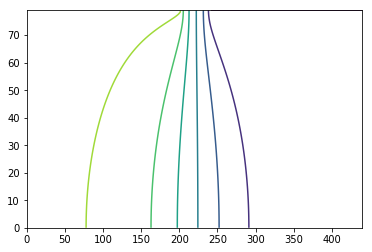

In [9]:
plt.contour(np.flipud(h))

In [19]:
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Convolution
from scipy.ndimage import convolve, generate_binary_structure

# Geometry
h = np.zeros([80, 440])
lhead = 105
rhead = 80

# Left head
h[0,0:200]= lhead
# Right head
h[0,241:439]= rhead

# Error and tolerance
tolerance = 1.E-10
error = 1.0
step = 0

# Residual
residual = np.zeros([80, 440])

(nrows, ncols) = h.shape

while error > tolerance:
#for k in range(70000):
    step = step + 1
    # Copy the FDM grid to residual
    residual = h.copy()
    
    # Finite Difference Method
        
    # h[i, j] = (h[i-1, j] + h[i, j-1] + h[i, j+1] + h[i+1, j]) / 4
    # Define a kernel function with active neighbours
    k = generate_binary_structure(2, 1)
    k[1, 1] = False
    
    # Use convolution instead of loop iteration
    # https://en.wikipedia.org/wiki/Convolution
    h = convolve(h, k, mode='constant', cval=0.0)
    h *= 0.25
    # h[1:(nrows-2),1:(ncols-2)] = B[1:(nrows-2),1:(ncols-2)].copy()
        
    # Apply boundary conditions
    # Top left side of dam boundary assign head
    # if i == 0 and j < 202:
    h[0,:200] = lhead
                
    # Top right side of dam boundary assign head
    # elif i == 0 and j > 240:
    h[0, 241:]= rhead
    
    # Top boundary beneath the dam
    for j in range(201, 240):
        h[0,j] = (h[0, j-1] + 2 * h[1, j] + h[0, j+1]) / 4;

    # Bottom boundary
    for j in range(1, (ncols-1)):
        h[(nrows -1), j] = (h[(nrows-1), j-1] +
                            2 * h[nrows-2, j] + 
                            h[(nrows-1), j+1]) / 4

    # Left boundary
    for i in range(1, (nrows-1)):
        h[i, 0] = (h[i-1, 0] + 2 * h[i, 1] + h[i+1, 0]) / 4
        
    # Right boundary
    for i in range(1, (nrows-1)):
        h[i, (ncols -1)] = (2 * h[i, (ncols-2)] + 
                                h[i-1, (ncols-1)] + 
                                h[i+1, (ncols-1)]) / 4
        
    # Left bottom corner (i == (nrows -1) and j == 0):
    # h[i,j]=(h[i-1,j]+h[i,j+1])/2
    h[(nrows-1), 0] = (h[nrows-2, 0] + h[(nrows-1), 1]) / 2
    
                
    # Right bottom corner (i == (nrows -1) and  j == (ncols -1))
    # h[i,j]=(h[i,j-1]+h[i-1,j])/2
    h[(nrows-1), (ncols-1)] = (h[(nrows-1), (ncols-2)] + 
                               h[(nrows-2), (ncols-1)]) / 2

                
    error = (np.square(np.subtract(h, residual))).max()
    print(step, error)

1 6400.0
2 269.1650390625
3 81.42242431640625
4 39.828201761702076
5 27.024566550109007
6 19.560177557450814
7 14.412609080060584
8 10.793443456910289
9 8.388989388904024
10 6.60326586748342
11 5.274912226833182
12 4.366469652919173
13 3.8231428567241266
14 3.3417585841308184
15 2.936026834823421
16 2.5982029165506897
17 2.3018444833361076
18 2.048419760177915
19 1.8288494136861972
20 1.639600497755667
21 1.4753270931298024
22 1.3302937618591297
23 1.2039765224449945
24 1.098181593295963
25 1.0219977361334025
26 0.9527597345853243
27 0.8887095504314446
28 0.8297688226782823
29 0.7755114625585173
30 0.7258941290263463
31 0.6801851726812009
32 0.6378240525497952
33 0.5987724873300224
34 0.5629304819979619
35 0.529668107515171
36 0.4989161681730386
37 0.470286869391572
38 0.4438735929572064
39 0.41938354740638933
40 0.3969873429325504
41 0.379760511547645
42 0.3634883619930481
43 0.34793363033778024
44 0.3332491122417806
45 0.3193741221467039
46 0.30612972572412034
47 0.29360562560285625


349 0.005299404172257153
350 0.005268648259829968
351 0.005238116714080088
352 0.00520780767529061
353 0.005177719296916931
354 0.005147849748321622
355 0.005118197215367599
356 0.005088759896450151
357 0.005059536007539943
358 0.005030523777935806
359 0.00500172145216971
360 0.004973127290683413
361 0.004944739566494169
362 0.0049165565692172696
363 0.004888576601775452
364 0.004860797982238023
365 0.004835181172747749
366 0.004809730282567454
367 0.00478444415217242
368 0.004759321630242617
369 0.004734361571183847
370 0.004709562836086559
371 0.004684924293596748
372 0.004660444817566913
373 0.004636123289820388
374 0.0046119585982463945
375 0.0045879496374347595
376 0.004564095309444795
377 0.004540394521927986
378 0.004516846190260196
379 0.004493449236105242
380 0.004470202587833093
381 0.004447105181157684
382 0.004424155957671664
383 0.004401353866456131
384 0.004378697863017973
385 0.004356186909543143
386 0.0043338199754206575
387 0.0043115960361120795
388 0.00428951407434150

698 0.0013245034807213244
699 0.0013207786966459025
700 0.0013170669117801305
701 0.0013133680755988916
702 0.0013096821386258052
703 0.0013060090509187082
704 0.0013023487630997635
705 0.00129870122582467
706 0.0012950663897973885
707 0.0012914442062887965
708 0.001287834626068531
709 0.001284237601036731
710 0.0012806530820142347
711 0.0012770810215459029
712 0.0012735213704848317
713 0.0012699740820399726
714 0.0012664391070773635
715 0.0012629163994866998
716 0.0012594059101293093
717 0.0012559075935931285
718 0.001252421400714231
719 0.001248947286799143
720 0.0012454852026387924
721 0.0012420351042754388
722 0.0012385969424341288
723 0.0012351706739133375
724 0.0012317562493511485
725 0.001228353626322042
726 0.0012249627553537284
727 0.001221583594819284
728 0.0012182160951108303
729 0.0012148602154224259
730 0.001211515905988061
731 0.0012081831268424784
732 0.0012048618280391741
733 0.0012015519704770378
734 0.0011982535040009651
735 0.0011949663903967611
736 0.001191690579277

1033 0.0006048479574936265
1034 0.0006036919982800383
1035 0.0006025389494984815
1036 0.0006013884761434658
1037 0.0006002408983443614
1038 0.0005990958820024557
1039 0.0005979537463606416
1040 0.0005968141583252804
1041 0.0005956774361544608
1042 0.0005945432478583855
1043 0.0005934119106094618
1044 0.00059228309362374
1045 0.0005911571128855731
1046 0.0005900336389203485
1047 0.000588912986420853
1048 0.0005877948273240141
1049 0.0005866794749277959
1050 0.0005855666026857195
1051 0.0005844565223948238
1052 0.0005833489091331057
1053 0.0005822440730870668
1054 0.0005811416910681566
1055 0.0005800420715433589
1056 0.0005789448931676348
1057 0.0005778504625780432
1058 0.000576758460384187
1059 0.0005756691912796764
1060 0.0005745823379429989
1061 0.0005734982030100803
1062 0.0005724164713428978
1063 0.0005713374434044139
1064 0.000570260806356756
1065 0.0005691868583719125
1066 0.0005681152890291697
1067 0.0005670463940925495
1068 0.0005659798656765223
1069 0.0005649159970174417
1070 0

1409 0.00032492723572612495
1410 0.00032447471978449654
1411 0.0003240214509963903
1412 0.0003235705100010978
1413 0.0003231187912652335
1414 0.00032266941933590734
1415 0.0003222192446178834
1416 0.00032177143589432925
1417 0.0003213227991801275
1418 0.0003208765478235347
1419 0.00032042944311945465
1420 0.0003199847433100363
1421 0.00031953916464212337
1422 0.0003190960105810895
1423 0.00031865195199634155
1424 0.00031821033790506816
1425 0.0003177677934695927
1426 0.0003173277135905698
1427 0.00031688667739205537
1428 0.00031644812598603355
1429 0.0003160085921314037
1430 0.00031557156348138005
1431 0.0003151335260979939
1432 0.000314698014507116
1433 0.00031426146774219733
1434 0.00031382746753319367
1435 0.0003133924055545223
1436 0.00031295991107014155
1437 0.0003125263280657339
1438 0.00031209533366968316
1439 0.00031166322384697215
1440 0.00031123372392309335
1441 0.0003108030815101195
1442 0.0003103750704625718
1443 0.0003099458897079135
1444 0.00030951936196035455
1445 0.0003

1789 0.00020148055798823524
1790 0.0002012557444451114
1791 0.00020103032470589782
1792 0.00020080614949810654
1793 0.00020058133535168855
1794 0.00020035779662145488
1795 0.00020013358604646251
1796 0.00019991068194167216
1797 0.00019968707292280645
1798 0.00019946480159698947
1799 0.0001992417921248045
1800 0.000199020151736919
1801 0.00019879773980740483
1802 0.00019857672852162189
1803 0.000198354912136791
1804 0.0001981345281232808
1805 0.00019791330529075077
1806 0.00019769354672486564
1807 0.00019747291545844315
1808 0.00019725378052050385
1809 0.00019703373883936902
1810 0.00019681522571624718
1811 0.00019659577164513804
1812 0.00019637787852864227
1813 0.00019615901009843723
1814 0.00019594173518569806
1815 0.00019572345043339772
1816 0.00019550679192665408
1817 0.0001952890888943707
1818 0.00019507304500234577
1819 0.00019485592173788474
1820 0.00019464049067358474
1821 0.0001944239452312219
1822 0.00019420912521351017
1823 0.00019399315565258628
1824 0.00019377894490616625
1

2149 0.00013926485012912603
2150 0.00013913361110690623
2151 0.00013900448962587644
2152 0.0001388735660425134
2153 0.00013874471752213247
2154 0.0001386141086907483
2155 0.0001384855322962959
2156 0.0001383552375314503
2157 0.00013822693243028972
2158 0.00013809695104780994
2159 0.00013796891640921664
2160 0.00013783924772702987
2161 0.00013771148272268726
2162 0.00013758212605964785
2163 0.00013745462986314148
2164 0.0001373255845405292
2165 0.00013719835632800808
2166 0.00013706962166735792
2167 0.0001369426606166967
2168 0.00013681423594246066
2169 0.00013668754123342172
2170 0.00013655942587096695
2171 0.0001364329966858605
2172 0.00013630518996196627
2173 0.000136179025485146
2174 0.00013605152672849797
2175 0.0001359256261460248
2176 0.00013579843468687923
2177 0.00013567279718734547
2178 0.00013554591235719456
2179 0.00013542053713122118
2180 0.00013529395826345218
2181 0.00013516884450368377
2182 0.00013504257093307869
2183 0.00013491771783417884
2184 0.00013479174889707672
21

2519 0.00010061956945829056
2520 0.00010053847117840497
2521 0.00010045242820531858
2522 0.0001003714651817611
2523 0.00010028561204248823
2524 0.00010020478385376168
2525 0.00010011912022696048
2526 0.0001000384264520243
2527 9.995295201776587e-05
2528 9.987239223731387e-05
2529 9.978710667565821e-05
2530 9.97066804715464e-05
2531 9.962158346311082e-05
2532 9.954129041807106e-05
2533 9.945638164431278e-05
2534 9.937622134223438e-05
2535 9.929166288956892e-05
2536 9.921147251151682e-05
2537 9.913120768327778e-05
2538 9.904880122479791e-05
2539 9.897105032910716e-05
2540 9.888882027945647e-05
2541 9.881119019119186e-05
2542 9.872913628289741e-05
2543 9.865162663469048e-05
2544 9.856974860056124e-05
2545 9.84923590259251e-05
2546 9.841065659947472e-05
2547 9.833338673322474e-05
2548 9.825185964782454e-05
2549 9.817470912551213e-05
2550 9.809335711537774e-05
2551 9.801632557342945e-05
2552 9.79351483727748e-05
2553 9.785823544891248e-05
2554 9.777723279237213e-05
2555 9.770043812476671e-0

2932 7.289560866007468e-05
2933 7.283853972417118e-05
2934 7.278722783820023e-05
2935 7.273027953207749e-05
2936 7.267902242584223e-05
2937 7.262219460611827e-05
2938 7.257099210076686e-05
2939 7.251428462447544e-05
2940 7.246313654185951e-05
2941 7.240654926596527e-05
2942 7.235545542839665e-05
2943 7.229898820967485e-05
2944 7.224794844004546e-05
2945 7.219160113568661e-05
2946 7.214061525758781e-05
2947 7.208438772459331e-05
2948 7.203345556207304e-05
2949 7.19773476574972e-05
2950 7.192646903517972e-05
2951 7.187048061625036e-05
2952 7.181965535933483e-05
2953 7.176378628333264e-05
2954 7.171301421747158e-05
2955 7.165726434173028e-05
2956 7.160654529350965e-05
2957 7.155091447517549e-05
2958 7.15002482715116e-05
2959 7.144473636814501e-05
2960 7.139412283628383e-05
2961 7.133872970537828e-05
2962 7.128816867361494e-05
2963 7.123289417259728e-05
2964 7.118238546943408e-05
2965 7.112722945590485e-05
2966 7.107677291053028e-05
2967 7.102173524226343e-05
2968 7.097133068431112e-05
296

3291 5.6120941665671306e-05
3292 5.60837705221433e-05
3293 5.604044212385521e-05
3294 5.600336435713063e-05
3295 5.5960733760149266e-05
3296 5.5923079449629546e-05
3297 5.588173329462339e-05
3298 5.5842915598211125e-05
3299 5.580284796330372e-05
3300 5.576287260099717e-05
3301 5.5724077587170396e-05
3302 5.568295025672296e-05
3303 5.564542198734257e-05
3304 5.560314836473573e-05
3305 5.556688098539628e-05
3306 5.552466447814329e-05
3307 5.5488454402622424e-05
3308 5.544633003403436e-05
3309 5.541014206129776e-05
3310 5.536810973409458e-05
3311 5.53319437836249e-05
3312 5.529000340072387e-05
3313 5.5253859392261314e-05
3314 5.521201085635418e-05
3315 5.517588871010721e-05
3316 5.5134131923872045e-05
3317 5.509803156009426e-05
3318 5.5056366426301224e-05
3319 5.5020287765818544e-05
3320 5.497871418732963e-05
3321 5.494265715122277e-05
3322 5.490117503035991e-05
3323 5.486513953996404e-05
3324 5.482374877956324e-05
3325 5.478773475678288e-05
3326 5.4746435259141155e-05
3327 5.471044262602

3657 4.3405000368657845e-05
3658 4.3372107887759345e-05
3659 4.3344858864093266e-05
3660 4.3312043120755706e-05
3661 4.328480132737292e-05
3662 4.3252062233695626e-05
3663 4.322482763803261e-05
3664 4.3192165106293555e-05
3665 4.3164937675853564e-05
3666 4.313235161804236e-05
3667 4.310513132067533e-05
3668 4.307262164905382e-05
3669 4.304540845276894e-05
3670 4.301297507940447e-05
3671 4.298576895227668e-05
3672 4.2953411789508634e-05
3673 4.292621270014404e-05
3674 4.289393165974533e-05
3675 4.286673957662857e-05
3676 4.283453457092376e-05
3677 4.280734946288327e-05
3678 4.2775220403631655e-05
3679 4.274804223974599e-05
3680 4.2715989038979384e-05
3681 4.2688817788483655e-05
3682 4.265684035832006e-05
3683 4.2629675990512794e-05
3684 4.259777424287811e-05
3685 4.257061672739941e-05
3686 4.253879057421345e-05
3687 4.2511639881044086e-05
3688 4.2479889233942886e-05
3689 4.2452745333218286e-05
3690 4.242107010411044e-05
3691 4.239393296593522e-05
3692 4.236233306690883e-05
3693 4.233520

4016 3.3860685401667365e-05
4017 3.383953436784661e-05
4018 3.381426572406472e-05
4019 3.379311392512364e-05
4020 3.376790924180379e-05
4021 3.3746756674604205e-05
4022 3.372161586913204e-05
4023 3.370046253096305e-05
4024 3.3675385520976056e-05
4025 3.365423140881073e-05
4026 3.362921811203293e-05
4027 3.360806322318838e-05
4028 3.358311355685367e-05
4029 3.356195788882553e-05
4030 3.353707177058462e-05
4031 3.351591532071736e-05
4032 3.349109266830772e-05
4033 3.346993543420619e-05
4034 3.344517616504102e-05
4035 3.34240181445698e-05
4036 3.339932217623188e-05
4037 3.337816336735029e-05
4038 3.335353061726331e-05
4039 3.333237101761499e-05
4040 3.330780140353648e-05
4041 3.328664101135217e-05
4042 3.326213445071678e-05
4043 3.324097326407529e-05
4044 3.321652967465124e-05
4045 3.3195367692052976e-05
4046 3.3170986991040766e-05
4047 3.3149824210752115e-05
4048 3.3125506316013433e-05
4049 3.3104342736557905e-05
4050 3.308008756563286e-05
4051 3.305892318570875e-05
4052 3.30347306561437

4349 2.6939830746127157e-05
4350 2.692281206737289e-05
4351 2.6902866741043013e-05
4352 2.688584405398087e-05
4353 2.6865953127501625e-05
4354 2.684892644355592e-05
4355 2.6829089837624004e-05
4356 2.6812059167765377e-05
4357 2.679227680316962e-05
4358 2.6775242158725273e-05
4359 2.6755513955978864e-05
4360 2.673847534819067e-05
4361 2.67188012281199e-05
4362 2.6701758668291436e-05
4363 2.6682138551521045e-05
4364 2.6665092051090854e-05
4365 2.664552585833823e-05
4366 2.6628475428806048e-05
4367 2.6608963081174333e-05
4368 2.6591908733880944e-05
4369 2.6572450152052267e-05
4370 2.6555391898765978e-05
4371 2.6535987003661648e-05
4372 2.651892485584511e-05
4373 2.649957356840572e-05
4374 2.648250753787501e-05
4375 2.6463209778987334e-05
4376 2.644613987732629e-05
4377 2.6426895568115923e-05
4378 2.6409821807114934e-05
4379 2.6390630868580683e-05
4380 2.6373553260017176e-05
4381 2.635441561325048e-05
4382 2.633733416918065e-05
4383 2.6318249735292492e-05
4384 2.6301164467540292e-05
4385 2

4764 2.0269889961956098e-05
4765 2.0256242739035124e-05
4766 2.024213445044983e-05
4767 2.0228529567136592e-05
4768 2.021441649241976e-05
4769 2.0200853879017606e-05
4770 2.0186736038385615e-05
4771 2.0173215625093076e-05
4772 2.015909303841332e-05
4773 2.0145614755771216e-05
4774 2.0131487443264386e-05
4775 2.011805122151743e-05
4776 2.0103919203183066e-05
4777 2.0090524973045354e-05
4778 2.0076388268789663e-05
4779 2.0063035960679615e-05
4780 2.0048894590761273e-05
4781 2.0035584135375063e-05
4782 2.002143811970453e-05
4783 2.0008169447697697e-05
4784 1.9994018806537262e-05
4785 1.9980791848588407e-05
4786 1.9966636601916067e-05
4787 1.9953451288853997e-05
4788 1.9939291456745006e-05
4789 1.992614771942154e-05
4790 1.991198332198464e-05
4791 1.9898881091274696e-05
4792 1.9884712148588626e-05
4793 1.9871651355453677e-05
4794 1.9857477887693854e-05
4795 1.9844458463181795e-05
4796 1.9830280490430116e-05
4797 1.9817302365548676e-05
4798 1.9803119907857023e-05
4799 1.9790183013763715e-05

5136 1.5708983353717915e-05
5137 1.5697051343185775e-05
5138 1.5687455693188276e-05
5139 1.56755194596605e-05
5140 1.566595727574515e-05
5141 1.5654016840792222e-05
5142 1.5644488062425938e-05
5143 1.5632543447359175e-05
5144 1.562304801414473e-05
5145 1.56110992404662e-05
5146 1.560163709186123e-05
5147 1.5589684181038748e-05
5148 1.5580255256749006e-05
5149 1.556829823032824e-05
5150 1.5558902469970654e-05
5151 1.5546941349294724e-05
5152 1.553757869273394e-05
5153 1.55256134991679e-05
5154 1.5516283886179835e-05
5155 1.5504336038851604e-05
5156 1.549501801166252e-05
5157 1.548310613646912e-05
5158 1.547378103041339e-05
5159 1.5461905064871935e-05
5160 1.5452572903988474e-05
5161 1.5440732785696842e-05
5162 1.5431393593820833e-05
5163 1.5419589260234465e-05
5164 1.541024306122111e-05
5165 1.539847445015546e-05
5166 1.5389121267824034e-05
5167 1.537738831689635e-05
5168 1.536802817519745e-05
5169 1.5356330822273018e-05
5170 1.5346963745121032e-05
5171 1.5335301928034293e-05
5172 1.532

5503 1.2212777923131715e-05
5504 1.2204107051115623e-05
5505 1.2196025492526414e-05
5506 1.2187383230958222e-05
5507 1.2179295889327847e-05
5508 1.2170682184949811e-05
5509 1.2162589082865114e-05
5510 1.2154003882193743e-05
5511 1.2145905042453725e-05
5512 1.2137348292275625e-05
5513 1.2129243737395745e-05
5514 1.2120715384569108e-05
5515 1.2112605137177748e-05
5516 1.2104105128681672e-05
5517 1.2095989211223167e-05
5518 1.2087517493959846e-05
5519 1.2079395929188934e-05
5520 1.2070952450082658e-05
5521 1.2062825260372487e-05
5522 1.2054409966665886e-05
5523 1.2046277174551588e-05
5524 1.2037890013262344e-05
5525 1.2029751641243417e-05
5526 1.2021392559657834e-05
5527 1.2013248630099607e-05
5528 1.2004917575574999e-05
5529 1.1996768110905863e-05
5530 1.198846503072283e-05
5531 1.1980310053384846e-05
5532 1.1972034894993489e-05
5533 1.1963874427245627e-05
5534 1.1955627138117806e-05
5535 1.1947461202429426e-05
5536 1.1939241730156956e-05
5537 1.193107034871621e-05
5538 1.192287864091257

5864 9.533060443105069e-06
5865 9.527089209968213e-06
5866 9.519978922438594e-06
5867 9.51402980409426e-06
5868 9.506915265079628e-06
5869 9.50098821755087e-06
5870 9.49386944686016e-06
5871 9.48796442627474e-06
5872 9.480841443553219e-06
5873 9.474958406055962e-06
5874 9.467831231354137e-06
5875 9.461970133063155e-06
5876 9.454838786048947e-06
5877 9.44899958323067e-06
5878 9.441864083583514e-06
5879 9.436046732695996e-06
5880 9.428907100063054e-06
5881 9.423111557406524e-06
5882 9.415967811533633e-06
5883 9.410194033556202e-06
5884 9.403046193982436e-06
5885 9.397294137192689e-06
5886 9.390142223599317e-06
5887 9.384411844566197e-06
5888 9.377256007370434e-06
5889 9.371547131867836e-06
5890 9.364417414855558e-06
5891 9.358699975316844e-06
5892 9.35159628814804e-06
5893 9.345870351160554e-06
5894 9.33879260364609e-06
5895 9.333058235761194e-06
5896 9.326006338036185e-06
5897 9.32026360542203e-06
5898 9.313237467945209e-06
5899 9.307486436430987e-06
5900 9.300485970114076e-06
5901 9.29

6197 7.5883714178748055e-06
6198 7.582894275622952e-06
6199 7.5779812907639515e-06
6200 7.5725231250843465e-06
6201 7.567605323641132e-06
6202 7.562166096683534e-06
6203 7.5572434975358355e-06
6204 7.551823171190111e-06
6205 7.5468957933435295e-06
6206 7.541494329669794e-06
6207 7.536562191904197e-06
6208 7.531179553093457e-06
6209 7.526242674392447e-06
6210 7.52087882272725e-06
6211 7.515937221732033e-06
6212 7.510592119313773e-06
6213 7.505645814986087e-06
6214 7.500319424124741e-06
6215 7.495368435123274e-06
6216 7.490060718259166e-06
6217 7.485105063368072e-06
6218 7.479815982916061e-06
6219 7.474855680772581e-06
6220 7.469585199161119e-06
6221 7.4646202684501174e-06
6222 7.459368348121287e-06
6223 7.454398807536264e-06
6224 7.449165411178537e-06
6225 7.444191279266394e-06
6226 7.438976369542705e-06
6227 7.433997664859145e-06
6228 7.428801204445782e-06
6229 7.4238179455939685e-06
6230 7.418639897219324e-06
6231 7.413652102578819e-06
6232 7.408492429139431e-06
6233 7.403500117176129

6564 5.902111381958298e-06
6565 5.898528712014706e-06
6566 5.894031473733641e-06
6567 5.890463020480598e-06
6568 5.885962592565222e-06
6569 5.882408325891777e-06
6570 5.877904723475895e-06
6571 5.8743646133484265e-06
6572 5.869857851609588e-06
6573 5.86633186810605e-06
6574 5.861831659205113e-06
6575 5.858310075231025e-06
6576 5.853825235783458e-06
6577 5.850299219841897e-06
6578 5.845829718613032e-06
6579 5.842299287212291e-06
6580 5.8378450928052445e-06
6581 5.8343102626674505e-06
6582 5.829871343660871e-06
6583 5.8263321312753876e-06
6584 5.82190845642943e-06
6585 5.818364878396257e-06
6586 5.813956416549255e-06
6587 5.810408489201832e-06
6588 5.806015209064785e-06
6589 5.802462949052737e-06
6590 5.7980848196202845e-06
6591 5.794528243326808e-06
6592 5.790165233397791e-06
6593 5.786604357213964e-06
6594 5.782256435938858e-06
6595 5.778691276160992e-06
6596 5.7743584124604e-06
6597 5.770788985563465e-06
6598 5.766471148470098e-06
6599 5.762897470731854e-06
6600 5.75859462949263e-06
6

6905 4.674926948283216e-06
6906 4.671655952251546e-06
6907 4.668546000884282e-06
6908 4.665271888162575e-06
6909 4.662173748439582e-06
6910 4.658896532456586e-06
6911 4.655810179269662e-06
6912 4.652529873340026e-06
6913 4.649455281524891e-06
6914 4.6461718990333e-06
6915 4.643109043431039e-06
6916 4.639822597678912e-06
6917 4.636771453350261e-06
6918 4.633481957586494e-06
6919 4.630442499474863e-06
6920 4.627149966926579e-06
6921 4.624122170133509e-06
6922 4.620826614006035e-06
6923 4.617810453577024e-06
6924 4.6145118871150085e-06
6925 4.611507338192308e-06
6926 4.608205774557514e-06
6927 4.605212812349428e-06
6928 4.601908264620938e-06
6929 4.598926864249335e-06
6930 4.5956193456675245e-06
6931 4.592649482442197e-06
6932 4.589339005981933e-06
6933 4.586380655126268e-06
6934 4.583067233954077e-06
6935 4.580120370848619e-06
6936 4.576804017926782e-06
6937 4.57386861801771e-06
6938 4.570549346378278e-06
6939 4.567625384995004e-06
6940 4.564303207587796e-06
6941 4.561390660216574e-06
69

7234 3.7345093897510807e-06
7235 3.731827501868125e-06
7236 3.729416729533909e-06
7237 3.726744669244446e-06
7238 3.7243310080329376e-06
7239 3.7216687543578086e-06
7240 3.719252215880578e-06
7241 3.7165997477884417e-06
7242 3.7141803435833413e-06
7243 3.711537640209935e-06
7244 3.7091153819328293e-06
7245 3.706482422197436e-06
7246 3.7040573213210356e-06
7247 3.701434084446736e-06
7248 3.6990061525343477e-06
7249 3.6963926176099536e-06
7250 3.6939618661240353e-06
7251 3.6913580124049255e-06
7252 3.688924452816491e-06
7253 3.6863302594513008e-06
7254 3.6838939032671813e-06
7255 3.6813093495162964e-06
7256 3.6788702081699427e-06
7257 3.676295273296243e-06
7258 3.6738533581479242e-06
7259 3.671288021498539e-06
7260 3.6688433439171738e-06
7261 3.6662875848960594e-06
7262 3.6638401562863504e-06
7263 3.6612939542453874e-06
7264 3.65884378591179e-06
7265 3.6563071203140663e-06
7266 3.653854223542528e-06
7267 3.6513270738805915e-06
7268 3.64887145996572e-06
7269 3.646353805680126e-06
7270 3.6

7588 2.934165948174907e-06
7589 2.9320211821074483e-06
7590 2.9301740380753876e-06
7591 2.9280371258209825e-06
7592 2.926187558264593e-06
7593 2.9240584828174986e-06
7594 2.9222065013784754e-06
7595 2.920085245781696e-06
7596 2.9182308600374422e-06
7597 2.916117407406913e-06
7598 2.9142606269434692e-06
7599 2.912154960298112e-06
7600 2.9102957947343866e-06
7601 2.9081978972630167e-06
7602 2.90633635610525e-06
7603 2.9042462109239564e-06
7604 2.9023823036871176e-06
7605 2.9002998940331358e-06
7606 2.8984336301924496e-06
7607 2.8963589392545492e-06
7608 2.894490328342323e-06
7609 2.892423339309314e-06
7610 2.8905523907697774e-06
7611 2.888493086999649e-06
7612 2.8866198102857268e-06
7613 2.8845681750638038e-06
7614 2.882692579516453e-06
7615 2.880648596200421e-06
7616 2.8787706912900422e-06
7617 2.8767343432374056e-06
7618 2.874854138346577e-06
7619 2.872825408890648e-06
7620 2.870942913362534e-06
7621 2.868921786029193e-06
7622 2.867037009215709e-06
7623 2.8650234673860943e-06
7624 2.86

7911 2.3555564876438765e-06
7912 2.3541281589035244e-06
7913 2.352359995732571e-06
7914 2.3509334594353437e-06
7915 2.3491717059419917e-06
7916 2.34774309704174e-06
7917 2.345987739247434e-06
7918 2.3445570658256047e-06
7919 2.3428080897937e-06
7920 2.341375359875104e-06
7921 2.3396327517542667e-06
7922 2.3381979733506666e-06
7923 2.3364617193094827e-06
7924 2.33502490041961e-06
7925 2.3332949864946113e-06
7926 2.331856135212732e-06
7927 2.330132547655883e-06
7928 2.328691671846138e-06
7929 2.3269743969075105e-06
7930 2.3255315045513324e-06
7931 2.3238205284357786e-06
7932 2.3223756275015966e-06
7933 2.3206709364338677e-06
7934 2.3192240348338407e-06
7935 2.3175256151667525e-06
7936 2.3160767207568815e-06
7937 2.314384558733161e-06
7938 2.312933679486377e-06
7939 2.311247761433434e-06
7940 2.3097949052448213e-06
7941 2.308115217531367e-06
7942 2.306660392196786e-06
7943 2.3049869212112037e-06
7944 2.303530134556979e-06
7945 2.3018628666857224e-06
7946 2.300404126546982e-06
7947 2.29874

8252 1.8694027889687738e-06
8253 1.8680190901989002e-06
8254 1.8668726227624943e-06
8255 1.8654940106699148e-06
8256 1.8643458836106193e-06
8257 1.8629723469592983e-06
8258 1.8618225667701865e-06
8259 1.8604540945342162e-06
8260 1.8593026677171612e-06
8261 1.8579392487121043e-06
8262 1.856786181758422e-06
8263 1.8554278048547584e-06
8264 1.854273104283912e-06
8265 1.852919758426231e-06
8266 1.8517634306890193e-06
8267 1.8504151047605268e-06
8268 1.8492571563552463e-06
8269 1.8479138393518239e-06
8270 1.8467542767082049e-06
8271 1.845415957583677e-06
8272 1.844254787120988e-06
8273 1.8429214548065728e-06
8274 1.8417586830107872e-06
8275 1.8404303265693994e-06
8276 1.8392659598002132e-06
8277 1.8379425682527397e-06
8278 1.8367766128787696e-06
8279 1.8354581753197389e-06
8280 1.834290637737706e-06
8281 1.8329771431619206e-06
8282 1.8318080297773497e-06
8283 1.830499467291709e-06
8284 1.8293287843843088e-06
8285 1.8280251431306827e-06
8286 1.8268528971044006e-06
8287 1.8255541662019019e-06

8587 1.490412445372003e-06
8588 1.4894695177831816e-06
8589 1.4884033344650948e-06
8590 1.48745910407323e-06
8591 1.4863969344483584e-06
8592 1.4854514065405412e-06
8593 1.4843932417118273e-06
8594 1.4834464214972598e-06
8595 1.4823922526151198e-06
8596 1.4814441453291056e-06
8597 1.4803939634702622e-06
8598 1.4794445743395697e-06
8599 1.4783983706800894e-06
8600 1.4774477048883881e-06
8601 1.4764054705652788e-06
8602 1.4754535333223176e-06
8603 1.4744152595026804e-06
8604 1.473462055992439e-06
8605 1.472427733856163e-06
8606 1.4714732692541522e-06
8607 1.4704428900283649e-06
8608 1.469487169501627e-06
8609 1.4684607243916914e-06
8610 1.4675037530299603e-06
8611 1.466481233322844e-06
8612 1.4655230162935747e-06
8613 1.4645044131856192e-06
8614 1.4635449556478116e-06
8615 1.4625302604512643e-06
8616 1.4615695674523583e-06
8617 1.4605587714405097e-06
8618 1.4595968481399175e-06
8619 1.458589942615854e-06
8620 1.4576267940615592e-06
8621 1.4566237703238275e-06
8622 1.4556594016241683e-06


8925 1.186763043507637e-06
8926 1.1859666224457748e-06
8927 1.1851677453821903e-06
8928 1.184370341896303e-06
8929 1.1835745940074723e-06
8930 1.1827762122369524e-06
8931 1.181983586520891e-06
8932 1.1811842305828944e-06
8933 1.1803947200477473e-06
8934 1.179594394068115e-06
8935 1.1788079916241357e-06
8936 1.178006699768242e-06
8937 1.1772233984439542e-06
8938 1.1764211447624018e-06
8939 1.1756409376426636e-06
8940 1.1748377262410385e-06
8941 1.1740606062974923e-06
8942 1.1732564413054425e-06
8943 1.1724824015969052e-06
8944 1.1716772870295867e-06
8945 1.170906320624954e-06
8946 1.1701002605832035e-06
8947 1.1693323605614084e-06
8948 1.168525359108578e-06
8949 1.1677605185278754e-06
8950 1.166952579705296e-06
8951 1.1661907916493877e-06
8952 1.1653819195224421e-06
8953 1.1646231771464174e-06
8954 1.1638133757277806e-06
8955 1.1630576721353285e-06
8956 1.162246945461739e-06
8957 1.1614942737818886e-06
8958 1.1606826258221979e-06
8959 1.1599329791939754e-06
8960 1.1591204140329405e-06
8

9311 9.157241509523158e-07
9312 9.150944113254592e-07
9313 9.144967184591111e-07
9314 9.138694085901141e-07
9315 9.132709330769841e-07
9316 9.126460475072496e-07
9317 9.120467925640924e-07
9318 9.114243258293614e-07
9319 9.108242946948358e-07
9320 9.102042413523258e-07
9321 9.096034372869151e-07
9322 9.089857918881632e-07
9323 9.083842181063833e-07
9324 9.077689752649904e-07
9325 9.071666349625717e-07
9326 9.065537892863808e-07
9327 9.0595068570795e-07
9328 9.053402317449744e-07
9329 9.047363680757846e-07
9330 9.04128300490083e-07
9331 9.035236799236867e-07
9332 9.029179933059754e-07
9333 9.023126190307191e-07
9334 9.017093080200567e-07
9335 9.01103183273033e-07
9336 9.005022425027299e-07
9337 8.998953704078558e-07
9338 8.99296794532495e-07
9339 8.98689178262501e-07
9340 8.980929619578701e-07
9341 8.974846046533629e-07
9342 8.968907425894965e-07
9343 8.962816474532279e-07
9344 8.956901343347656e-07
9345 8.95080304470089e-07
9346 8.944911349152537e-07
9347 8.938805735145481e-07
9348 8.9

9691 7.101702099165998e-07
9692 7.097010230256011e-07
9693 7.092234645246648e-07
9694 7.087536799814939e-07
9695 7.08277982487806e-07
9696 7.078076027812054e-07
9697 7.073337620870517e-07
9698 7.068627897375711e-07
9699 7.063908016532623e-07
9700 7.059192391773325e-07
9701 7.054490995192259e-07
9702 7.049769493814367e-07
9703 7.045086539719444e-07
9704 7.040359187163557e-07
9705 7.035694633839106e-07
9706 7.030961454431517e-07
9707 7.026315260341476e-07
9708 7.021576278964527e-07
9709 7.01694840275182e-07
9710 7.012203644247117e-07
9711 7.007594044019461e-07
9712 7.002843533188127e-07
9713 6.998252167946331e-07
9714 6.993495929073408e-07
9715 6.988922757402132e-07
9716 6.984160815327085e-07
9717 6.979605795870897e-07
9718 6.974838175036411e-07
9719 6.970301266737123e-07
9720 6.965527991783164e-07
9721 6.961009153641842e-07
9722 6.9562302484568e-07
9723 6.951729439533928e-07
9724 6.946944928915037e-07
9725 6.942462108211735e-07
9726 6.937672016441921e-07
9727 6.933207143018714e-07
9728 

10079 5.484515400909091e-07
10080 5.481100753393758e-07
10081 5.477224415927853e-07
10082 5.473823678650595e-07
10083 5.469952854605215e-07
10084 5.46655627265862e-07
10085 5.462699954131808e-07
10086 5.459298522944785e-07
10087 5.455456677059061e-07
10088 5.452050416420413e-07
10089 5.448223010975183e-07
10090 5.444811940641586e-07
10091 5.440998943167799e-07
10092 5.437583082444776e-07
10093 5.433784460834473e-07
10094 5.430363829101186e-07
10095 5.426579550978369e-07
10096 5.423154168001399e-07
10097 5.419384200932002e-07
10098 5.41595408634127e-07
10099 5.412198398356181e-07
10100 5.408763571227111e-07
10101 5.405022130403145e-07
10102 5.401582609989364e-07
10103 5.397855384240317e-07
10104 5.394411189973137e-07
10105 5.39069814736331e-07
10106 5.387249298538194e-07
10107 5.383550407177786e-07
10108 5.380096923058942e-07
10109 5.376412151208202e-07
10110 5.372954050611914e-07
10111 5.369283366576787e-07
10112 5.365820669017769e-07
10113 5.362164040733348e-07
10114 5.35869676507038e

10471 4.2300927912553463e-07
10472 4.2274288407123125e-07
10473 4.2245134413955824e-07
10474 4.221845864790894e-07
10475 4.2189414528849527e-07
10476 4.216270265210268e-07
10477 4.2133768161305915e-07
10478 4.2107020322611263e-07
10479 4.2078195213661665e-07
10480 4.2051411563374867e-07
10481 4.2022695592973297e-07
10482 4.1995876276600987e-07
10483 4.1967269195351496e-07
10484 4.1940414362770446e-07
10485 4.1911915928997535e-07
10486 4.18850257289207e-07
10487 4.1856635697614564e-07
10488 4.1829710273918903e-07
10489 4.180142840226026e-07
10490 4.1774467904103474e-07
10491 4.174629394778312e-07
10492 4.1719298520409314e-07
10493 4.16912322382223e-07
10494 4.166420203031056e-07
10495 4.163624317681059e-07
10496 4.160917833129909e-07
10497 4.158132666781004e-07
10498 4.155422733473556e-07
10499 4.152648261650883e-07
10500 4.149934893925543e-07
10501 4.147171092647269e-07
10502 4.1444543049108387e-07
10503 4.1417011503209027e-07
10504 4.138980957048309e-07
10505 4.1362384250505005e-07
10

10874 3.244040166747824e-07
10875 3.241965990697438e-07
10876 3.23978862246446e-07
10877 3.237711798699388e-07
10878 3.2355426490951356e-07
10879 3.233463188851082e-07
10880 3.2313022392245236e-07
10881 3.2292201534768594e-07
10882 3.2270673857688834e-07
10883 3.224982685636709e-07
10884 3.222838081087567e-07
10885 3.220750777914143e-07
10886 3.218614318355443e-07
10887 3.2165244228207594e-07
10888 3.214396090029425e-07
10889 3.212303613360298e-07
10890 3.210183388897557e-07
10891 3.2080883419001827e-07
10892 3.2059762077560964e-07
10893 3.2038786016215037e-07
10894 3.201774539329093e-07
10895 3.199674384908673e-07
10896 3.1975783765900777e-07
10897 3.195475684637367e-07
10898 3.193387711958211e-07
10899 3.191282493610985e-07
10900 3.1892025385039103e-07
10901 3.187094804560899e-07
10902 3.185022848823933e-07
10903 3.1829126102268894e-07
10904 3.180848636084868e-07
10905 3.178735903437253e-07
10906 3.176679892899953e-07
10907 3.1745646769484e-07
10908 3.1725166119712516e-07
10909 3.170

11266 2.5106331172220636e-07
11267 2.5089594733323204e-07
11268 2.50736685713783e-07
11269 2.5056913625210876e-07
11270 2.504104842672286e-07
11271 2.502427936508543e-07
11272 2.5008470681216563e-07
11273 2.499176348258311e-07
11274 2.4975935277889287e-07
11275 2.495928980641927e-07
11276 2.494344216551633e-07
11277 2.492685828130197e-07
11278 2.491099128512366e-07
11279 2.4894468852002854e-07
11280 2.4878582583480723e-07
11281 2.4862121464774205e-07
11282 2.484621600741508e-07
11283 2.4829816065928075e-07
11284 2.4813891500980804e-07
11285 2.47975526004209e-07
11286 2.478160900971223e-07
11287 2.476533101327245e-07
11288 2.474936847849835e-07
11289 2.4733151249565765e-07
11290 2.4717169852291614e-07
11291 2.4701013255859646e-07
11292 2.4685013077519927e-07
11293 2.4668916978772386e-07
11294 2.465289810067084e-07
11295 2.463686236286561e-07
11296 2.462082486688121e-07
11297 2.4604849354880524e-07
11298 2.458879332205578e-07
11299 2.4572877903026553e-07
11300 2.455680341075216e-07
11301

11661 1.945198823257539e-07
11662 1.9439804550532818e-07
11663 1.9427563833615958e-07
11664 1.941537173042442e-07
11665 1.9403169927434e-07
11666 1.9390969449207717e-07
11667 1.9378806477337277e-07
11668 1.9366597668240238e-07
11669 1.9354473444796165e-07
11670 1.9342256349547473e-07
11671 1.9330170791948678e-07
11672 1.9317945455820879e-07
11673 1.9305898480974076e-07
11674 1.9293664949791664e-07
11675 1.9281656475964861e-07
11676 1.9269439684379863e-07
11677 1.9257444736684666e-07
11678 1.9245266220868504e-07
11679 1.9233263227307116e-07
11680 1.92211229060635e-07
11681 1.9209111910173732e-07
11682 1.9197009701794045e-07
11683 1.9184990747667096e-07
11684 1.9172926572420834e-07
11685 1.916089970221082e-07
11686 1.9148873477365926e-07
11687 1.9136838735647831e-07
11688 1.91248503829362e-07
11689 1.911280781234868e-07
11690 1.9100857249880306e-07
11691 1.9088806893615724e-07
11692 1.9076894041475127e-07
11693 1.9064835943897798e-07
11694 1.9052960721657053e-07
11695 1.9040894923959277e

12050 1.524705756329794e-07
12051 1.5237587368584277e-07
12052 1.5228003303269256e-07
12053 1.5218560218811392e-07
12054 1.520897269978726e-07
12055 1.5199556670518512e-07
12056 1.5189965723618026e-07
12057 1.5180576692884124e-07
12058 1.517098234666626e-07
12059 1.516162025844244e-07
12060 1.5152022538652805e-07
12061 1.514268733754303e-07
12062 1.5133086271544103e-07
12063 1.512377790222627e-07
12064 1.5114173515677932e-07
12065 1.5104891923456607e-07
12066 1.5095284243081324e-07
12067 1.508602937057402e-07
12068 1.50764184230511e-07
12069 1.5067190216815317e-07
12070 1.5057576027676859e-07
12071 1.504837443213553e-07
12072 1.5038757028525747e-07
12073 1.5029581988727484e-07
12074 1.5019961396644173e-07
12075 1.5010812857711388e-07
12076 1.5001189103109903e-07
12077 1.4992067010238733e-07
12078 1.4982440118481963e-07
12079 1.497334441694236e-07
12080 1.4963714414451502e-07
12081 1.4954645050136367e-07
12082 1.4945011963838307e-07
12083 1.4935968881064882e-07
12084 1.4926332735097048e

12451 1.1868739145791023e-07
12452 1.1861699029449808e-07
12453 1.185391666115882e-07
12454 1.1846895978229668e-07
12455 1.1839112564543633e-07
12456 1.1832111275450388e-07
12457 1.1824326833457186e-07
12458 1.1817344898676525e-07
12459 1.1809580101951031e-07
12460 1.1802596826472991e-07
12461 1.1794852038640976e-07
12462 1.178786703449872e-07
12463 1.1780142216092758e-07
12464 1.1773155501367028e-07
12465 1.1765450611996599e-07
12466 1.1758462204250763e-07
12467 1.1750777205040806e-07
12468 1.1743787120834831e-07
12469 1.1736121971500866e-07
12470 1.172913022785458e-07
12471 1.1721484890112346e-07
12472 1.1714491504503529e-07
12473 1.1706865938173442e-07
12474 1.1699870928537079e-07
12475 1.1692265093493219e-07
12476 1.1685268476277061e-07
12477 1.1677682334390068e-07
12478 1.1670684125529112e-07
12479 1.1663117637263582e-07
12480 1.165611785509294e-07
12481 1.1648570980965737e-07
12482 1.1641569642334912e-07
12483 1.1634042342430873e-07
12484 1.1627039464646289e-07
12485 1.1619531700

12843 9.2919330272564e-08
12844 9.286385947284908e-08
12845 9.2803411122498e-08
12846 9.274793460809176e-08
12847 9.268763559306514e-08
12848 9.263215347952183e-08
12849 9.257200350753623e-08
12850 9.251651591453695e-08
12851 9.245651469801424e-08
12852 9.240102173207486e-08
12853 9.234116898381554e-08
12854 9.228567075990833e-08
12855 9.222596618877266e-08
12856 9.217046282167512e-08
12857 9.211090613259486e-08
12858 9.205539774982607e-08
12859 9.199598864812238e-08
12860 9.194047535112643e-08
12861 9.188121355974815e-08
12862 9.182569546271799e-08
12863 9.176658068344436e-08
12864 9.171105790468524e-08
12865 9.165208984830037e-08
12866 9.159656249731267e-08
12867 9.153774087928401e-08
12868 9.148220907397914e-08
12869 9.14235336144423e-08
12870 9.136799745963992e-08
12871 9.130946786191942e-08
12872 9.125392747514605e-08
12873 9.119554345583966e-08
12874 9.113999895012825e-08
12875 9.108176022191638e-08
12876 9.102621170581987e-08
12877 9.096811798605094e-08
12878 9.091256558079248e-

13246 7.22480554863871e-08
13247 7.220018513983165e-08
13248 7.215788074239595e-08
13249 7.211001735721576e-08
13250 7.206781778938177e-08
13251 7.20199614406415e-08
13252 7.197786648906194e-08
13253 7.193001724025574e-08
13254 7.188802670330356e-08
13255 7.18401846254285e-08
13256 7.179829830173904e-08
13257 7.175046345043434e-08
13258 7.1708681135104e-08
13259 7.166085359254155e-08
13260 7.161917508093346e-08
13261 7.157135489871547e-08
13262 7.152977999406943e-08
13263 7.148196724650427e-08
13264 7.144049573332043e-08
13265 7.139269049458214e-08
13266 7.135132217283718e-08
13267 7.130352450178182e-08
13268 7.12622591679229e-08
13269 7.121446913467926e-08
13270 7.117330658921335e-08
13271 7.112552425998969e-08
13272 7.108446429610733e-08
13273 7.103668972941737e-08
13274 7.099573215573461e-08
13275 7.094796542134001e-08
13276 7.090711003157965e-08
13277 7.085935119911458e-08
13278 7.08185977910569e-08
13279 7.077084691868541e-08
13280 7.073019529793998e-08
13281 7.068245244749835e-08

13651 5.6095791983440904e-08
13652 5.605814250779171e-08
13653 5.6025698194662006e-08
13654 5.598813217307573e-08
13655 5.5955691418490953e-08
13656 5.5918208694353325e-08
13657 5.588577155037825e-08
13658 5.584837196056149e-08
13659 5.581593847245374e-08
13660 5.577862187083134e-08
13661 5.574619209047642e-08
13662 5.5708958317685794e-08
13663 5.567653229016971e-08
13664 5.563938119376455e-08
13665 5.5606958970794965e-08
13666 5.5569890388474044e-08
13667 5.553747201831766e-08
13668 5.550048580473712e-08
13669 5.5468071332224265e-08
13670 5.543116732214756e-08
13671 5.539875680206671e-08
13672 5.536193484719847e-08
13673 5.532952832086446e-08
13674 5.5292788273099406e-08
13675 5.526038579177525e-08
13676 5.522372748983659e-08
13677 5.5191329101355344e-08
13678 5.51547523941955e-08
13679 5.5122358142966804e-08
13680 5.508586287973395e-08
13681 5.5053472816756484e-08
13682 5.501705883679231e-08
13683 5.4984673009641436e-08
13684 5.494834017249097e-08
13685 5.491595862532223e-08
13686 5.

14050 4.370681192270944e-08
14051 4.367747265059533e-08
14052 4.3652138795809765e-08
14053 4.3622862614954756e-08
14054 4.3597533632090546e-08
14055 4.356832041882409e-08
14056 4.354299634148326e-08
14057 4.3513845981194544e-08
14058 4.34885268399524e-08
14059 4.3459439218178346e-08
14060 4.34341250435535e-08
14061 4.3405100043017934e-08
14062 4.3379790868433044e-08
14063 4.33508283749716e-08
14064 4.3325524233786335e-08
14065 4.329662412746701e-08
14066 4.327132505297989e-08
14067 4.3242487219940116e-08
14068 4.321719324538683e-08
14069 4.3188417574863295e-08
14070 4.316312872751112e-08
14071 4.313441510002752e-08
14072 4.310913141889785e-08
14073 4.308047972103381e-08
14074 4.3055201230329075e-08
14075 4.302661134586493e-08
14076 4.300133808447948e-08
14077 4.2972809900291413e-08
14078 4.294754189820926e-08
14079 4.2919075298375604e-08
14080 4.289381257963933e-08
14081 4.286540745427735e-08
14082 4.28401500605336e-08
14083 4.281180629401531e-08
14084 4.278655424919323e-08
14085 4.275

14449 3.404458777583157e-08
14450 3.402108846966703e-08
14451 3.400195503354344e-08
14452 3.397850425573659e-08
14453 3.395937534926588e-08
14454 3.393597300909495e-08
14455 3.3916848652523666e-08
14456 3.3893494667235894e-08
14457 3.38743748912332e-08
14458 3.3851069170331154e-08
14459 3.383195399243714e-08
14460 3.380869644554433e-08
14461 3.378958588849213e-08
14462 3.3766376433185103e-08
14463 3.3747270519662976e-08
14464 3.3724109068400395e-08
14465 3.370500781844427e-08
14466 3.3681894275974494e-08
14467 3.366279771479954e-08
14468 3.3639732004245305e-08
14469 3.3620640154409135e-08
14470 3.35976221807492e-08
14471 3.357853505956036e-08
14472 3.355556474352427e-08
14473 3.353648237606451e-08
14474 3.351355962546841e-08
14475 3.349448203417144e-08
14476 3.3471606769955004e-08
14477 3.345253396941179e-08
14478 3.342970609962093e-08
14479 3.3410638117385536e-08
14480 3.338785755797807e-08
14481 3.336879441376191e-08
14482 3.334606108080285e-08
14483 3.3327002799467936e-08
14484 3.33

14851 2.6459549136459763e-08
14852 2.6444218765311402e-08
14853 2.6426364578437127e-08
14854 2.6411067739685202e-08
14855 2.6393221390251645e-08
14856 2.6377958024854798e-08
14857 2.6360119526290274e-08
14858 2.6344889568360755e-08
14859 2.6327058934063955e-08
14860 2.6311862327022814e-08
14861 2.629403956114231e-08
14862 2.627887623926669e-08
14863 2.6261061357456515e-08
14864 2.624593125971548e-08
14865 2.6228124272990538e-08
14866 2.621302733613104e-08
14867 2.6195228257781127e-08
14868 2.61801644209324e-08
14869 2.6162373261917727e-08
14870 2.6147342459691708e-08
14871 2.6129559228651073e-08
14872 2.6114561402638175e-08
14873 2.609678611278027e-08
14874 2.6081821202348588e-08
14875 2.6064053855379955e-08
14876 2.6049121802272086e-08
14877 2.603136241823565e-08
14878 2.6016463155096148e-08
14879 2.5998711742534195e-08
14880 2.5983845208973457e-08
14881 2.596610177869763e-08
14882 2.5951267916693358e-08
14883 2.5933532481777384e-08
14884 2.591873122422822e-08
14885 2.5901003790856272

15244 2.0676484473365803e-08
15245 2.0663544979545004e-08
15246 2.065052682900467e-08
15247 2.0637613975630305e-08
15248 2.062460158702688e-08
15249 2.0611715325402657e-08
15250 2.0598708708930182e-08
15251 2.0585848988383507e-08
15252 2.057284815217507e-08
15253 2.0560014924138692e-08
15254 2.0547019876308604e-08
15255 2.053421309635117e-08
15256 2.052122384702944e-08
15257 2.0508443460597577e-08
15258 2.0495460013789554e-08
15259 2.0482705976576705e-08
15260 2.0469728344409436e-08
15261 2.045700061419433e-08
15262 2.044402879657387e-08
15263 2.0431327318999627e-08
15264 2.0418361332078242e-08
15265 2.0405686060981637e-08
15266 2.0392725908698303e-08
15267 2.0380076800004403e-08
15268 2.0367122490343312e-08
15269 2.0354499489893703e-08
15270 2.0341551030822408e-08
15271 2.0328954096691714e-08
15272 2.031601149818282e-08
15273 2.030344057836973e-08
15274 2.029050384632562e-08
15275 2.0277958899019003e-08
15276 2.0265028039326088e-08
15277 2.0252509016697453e-08
15278 2.0239584039271572

15623 1.6295412728420998e-08
15624 1.6284136143467392e-08
15625 1.627493593877338e-08
15626 1.626368114188905e-08
15627 1.6254484741498545e-08
15628 1.62432516934989e-08
15629 1.6234059099925672e-08
15630 1.6222847763488493e-08
15631 1.6213658984668772e-08
15632 1.620246932070933e-08
15633 1.619328436275365e-08
15634 1.6182116334045958e-08
15635 1.6172935204858205e-08
15636 1.6161788772415947e-08
15637 1.615261147627053e-08
15638 1.6141486602964375e-08
15639 1.6132313147735707e-08
15640 1.6121209792873832e-08
15641 1.611204018281194e-08
15642 1.610095831116757e-08
15643 1.6091792554117472e-08
15644 1.608073213230798e-08
15645 1.6071570234294394e-08
15646 1.6060531218170117e-08
15647 1.6051373185206046e-08
15648 1.6040355541478882e-08
15649 1.603120137776325e-08
15650 1.602020506598952e-08
15651 1.6011054781106954e-08
15652 1.6000079762693843e-08
15653 1.5990933364410914e-08
15654 1.5979979604408312e-08
15655 1.5970837095085764e-08
15656 1.5959904554996618e-08
15657 1.5950765940579388e-

16002 1.2838888599127694e-08
16003 1.28304969093935e-08
16004 1.2822740308940152e-08
16005 1.2814353257249718e-08
16006 1.2806612217223299e-08
16007 1.2798229810745715e-08
16008 1.2790504303416222e-08
16009 1.2782126544482187e-08
16010 1.2774416543761517e-08
16011 1.2766043434693461e-08
16012 1.2758348909710228e-08
16013 1.2749980452823913e-08
16014 1.2742301379166006e-08
16015 1.2733937573561187e-08
16016 1.2726273920433512e-08
16017 1.2717914773223458e-08
16018 1.2710266513076334e-08
16019 1.2701912029754367e-08
16020 1.2694279136673822e-08
16021 1.2685929313114385e-08
16022 1.2678311761220384e-08
16023 1.2669966604501047e-08
16024 1.2662364363146763e-08
16025 1.2654023870736365e-08
16026 1.2646436915711262e-08
16027 1.263810109626361e-08
16028 1.2630529398592352e-08
16029 1.2622198251160561e-08
16030 1.2614641781907638e-08
16031 1.2606315311927074e-08
16032 1.2598774045385016e-08
16033 1.259045224870848e-08
16034 1.2582926160797612e-08
16035 1.2574609044438303e-08
16036 1.2567098103

16339 1.0383541560077023e-08
16340 1.037774639587869e-08
16341 1.0370471367893574e-08
16342 1.0364679033789804e-08
16343 1.035741754064302e-08
16344 1.0351628039729823e-08
16345 1.0344380062953297e-08
16346 1.0338593392537752e-08
16347 1.033135890790642e-08
16348 1.032557507540885e-08
16349 1.0318354060171317e-08
16350 1.0312573065779089e-08
16351 1.0305365492885507e-08
16352 1.0299587342554415e-08
16353 1.029239319364225e-08
16354 1.0286617890430088e-08
16355 1.0279437137069829e-08
16356 1.027366468546852e-08
16357 1.0266497306470846e-08
16358 1.0260727705202927e-08
16359 1.0253573680844065e-08
16360 1.0247806932948528e-08
16361 1.024066623777417e-08
16362 1.0234902346282948e-08
16363 1.0227774960622165e-08
16364 1.0222013928558528e-08
16365 1.0214899824144499e-08
16366 1.0209141655961365e-08
16367 1.0202040813180005e-08
16368 1.0196285510448605e-08
16369 1.0189197906839104e-08
16370 1.0183445471125961e-08
16371 1.017637108282255e-08
16372 1.0170621518556216e-08
16373 1.01635603217239

16715 8.193048944423075e-09
16716 8.187823592921971e-09
16717 8.182723539919112e-09
16718 8.177501359274769e-09
16719 8.172411083421189e-09
16720 8.16719207943903e-09
16721 8.16211155889661e-09
16722 8.156895729667795e-09
16723 8.151824947763868e-09
16724 8.146612296512086e-09
16725 8.1415512378765e-09
16726 8.136341763970066e-09
16727 8.13129041196984e-09
16728 8.126084114776157e-09
16729 8.121042452799735e-09
16730 8.115839334245745e-09
16731 8.110807343142514e-09
16732 8.105607405149412e-09
16733 8.100585070911063e-09
16734 8.095388312835431e-09
16735 8.090375617634734e-09
16736 8.085182041388286e-09
16737 8.080178967421359e-09
16738 8.074988573632668e-09
16739 8.069995103119358e-09
16740 8.064807893689892e-09
16741 8.059824011424953e-09
16742 8.054639985698459e-09
16743 8.049665673945103e-09
16744 8.044484835088623e-09
16745 8.039520077407125e-09
16746 8.034342420935661e-09
16747 8.029387203455477e-09
16748 8.02421273507465e-09
16749 8.019267037575923e-09
16750 8.01409575534456e-09

17097 6.438409037170166e-09
17098 6.433798214723192e-09
17099 6.430285364224424e-09
17100 6.425677766477545e-09
17101 6.422171894195108e-09
17102 6.417567517793222e-09
17103 6.4140686129161655e-09
17104 6.409467457921461e-09
17105 6.405975506239054e-09
17106 6.4013775727114135e-09
17107 6.39789256230608e-09
17108 6.393297849165997e-09
17109 6.389819769271284e-09
17110 6.385228277709402e-09
17111 6.381757113029935e-09
17112 6.377168841962779e-09
17113 6.373704580629278e-09
17114 6.369119531241071e-09
17115 6.365662162532564e-09
17116 6.361080329201033e-09
17117 6.357629843543515e-09
17118 6.353051230849468e-09
17119 6.3496076107508875e-09
17120 6.345032215340035e-09
17121 6.3415954512579605e-09
17122 6.337023274304816e-09
17123 6.333593354444437e-09
17124 6.329024395987336e-09
17125 6.32560130743833e-09
17126 6.321035566383106e-09
17127 6.317619296252612e-09
17128 6.313056772634104e-09
17129 6.309647310304032e-09
17130 6.30508800189679e-09
17131 6.301685333377586e-09
17132 6.29713111895

17456 5.132037398945825e-09
17457 5.1289512239687495e-09
17458 5.125557050950239e-09
17459 5.122472845717567e-09
17460 5.119084848754417e-09
17461 5.1160026110039995e-09
17462 5.1126207806121875e-09
17463 5.109540513164083e-09
17464 5.106164837838871e-09
17465 5.103086539445106e-09
17466 5.099717009727492e-09
17467 5.0966406801555646e-09
17468 5.093277283555191e-09
17469 5.090202925613881e-09
17470 5.086845652697997e-09
17471 5.08377326412191e-09
17472 5.080422106482526e-09
17473 5.077351688046948e-09
17474 5.074006634247856e-09
17475 5.070938186725183e-09
17476 5.067599225345505e-09
17477 5.064532749505251e-09
17478 5.061199870150421e-09
17479 5.058135365748232e-09
17480 5.0548085580370645e-09
17481 5.051746025837675e-09
17482 5.048425279402026e-09
17483 5.045364719157586e-09
17484 5.04205002566082e-09
17485 5.0389914361131465e-09
17486 5.035682784202499e-09
17487 5.032626168127513e-09
17488 5.029323547472604e-09
17489 5.026268903608646e-09
17490 5.022972302885578e-09
17491 5.01991963

17797 4.136847002353428e-09
17798 4.134365168586326e-09
17799 4.131616667337102e-09
17800 4.1291394532042734e-09
17801 4.126392918021016e-09
17802 4.123920315942813e-09
17803 4.121175741798094e-09
17804 4.118707744205607e-09
17805 4.1159651351984036e-09
17806 4.113501732707844e-09
17807 4.110761086548796e-09
17808 4.108302271611993e-09
17809 4.105563586925513e-09
17810 4.1031093538244726e-09
17811 4.100372631965487e-09
17812 4.097922969528753e-09
17813 4.095188210029689e-09
17814 4.092743111648782e-09
17815 4.090010314040917e-09
17816 4.08756977311467e-09
17817 4.084838935111627e-09
17818 4.0824029441387355e-09
17819 4.079674067088075e-09
17820 4.077242616761163e-09
17821 4.0745157010990554e-09
17822 4.0720887830305785e-09
17823 4.0693638273775715e-09
17824 4.066941435004043e-09
17825 4.06421843888753e-09
17826 4.061800563841353e-09
17827 4.059079528598975e-09
17828 4.05666616342837e-09
17829 4.0539470876784515e-09
17830 4.051538224036604e-09
17831 4.0488211063989696e-09
17832 4.046416

18179 3.2484299182392445e-09
18180 3.2466849163273456e-09
18181 3.244320750424955e-09
18182 3.242576851080098e-09
18183 3.2402167564275242e-09
18184 3.2384739613857705e-09
18185 3.236117932976606e-09
18186 3.2343762415443916e-09
18187 3.2320242719534283e-09
18188 3.230283685861108e-09
18189 3.227935766865244e-09
18190 3.2261962846103237e-09
18191 3.2238524112264536e-09
18192 3.222114033728392e-09
18193 3.2197741985586006e-09
18194 3.21803692673423e-09
18195 3.2157011231962193e-09
18196 3.213964955542616e-09
18197 3.2116331778682394e-09
18198 3.2098981153000575e-09
18199 3.2075703561175917e-09
18200 3.205836399546868e-09
18201 3.203512650689993e-09
18202 3.2017798002222585e-09
18203 3.199460057555584e-09
18204 3.1977283116874323e-09
18205 3.19541256866895e-09
18206 3.193681929111754e-09
18207 3.19137017840425e-09
18208 3.189640644457279e-09
18209 3.1873328795361126e-09
18210 3.1856044529055335e-09
18211 3.183300665650069e-09
18212 3.1815733448316507e-09
18213 3.179273530338731e-09
18214

18538 2.588017304126176e-09
18539 2.58628494156932e-09
18540 2.584739529943648e-09
18541 2.583010197675025e-09
18542 2.581465889813248e-09
18543 2.579739583972896e-09
18544 2.5781963783801517e-09
18545 2.576473093669614e-09
18546 2.574930991737873e-09
18547 2.5732107228651125e-09
18548 2.5716697238204156e-09
18549 2.5699524662209446e-09
18550 2.5684125692899154e-09
18551 2.5666983176848052e-09
18552 2.5651595228146088e-09
18553 2.5634482719318102e-09
18554 2.5619105790688254e-09
18555 2.560202325081257e-09
18556 2.5586657341706467e-09
18557 2.5569604718176968e-09
18558 2.555424982803842e-09
18559 2.553722705395487e-09
18560 2.55218831822242e-09
18561 2.5504890219494245e-09
18562 2.548955735842499e-09
18563 2.547259416899506e-09
18564 2.54572723251847e-09
18565 2.5440338849531996e-09
18566 2.5425028008059894e-09
18567 2.540812419391394e-09
18568 2.539282436136637e-09
18569 2.537595015652255e-09
18570 2.5360661332305765e-09
18571 2.534381669178178e-09
18572 2.532853887529216e-09
18573 2.

18905 2.0508448734427843e-09
18906 2.0494971499889186e-09
18907 2.0482456421993106e-09
18908 2.0468989693016104e-09
18909 2.0456496923311396e-09
18910 2.0443040698460474e-09
18911 2.0430570200880957e-09
18912 2.0417124478712775e-09
18913 2.040467620439734e-09
18914 2.0391240970630753e-09
18915 2.037881489645487e-09
18916 2.036539015606464e-09
18917 2.0352986226861378e-09
18918 2.033957196557952e-09
18919 2.0327190164714127e-09
18920 2.0313786393907015e-09
18921 2.030142667272682e-09
18922 2.0288033378125187e-09
18923 2.0275695707249893e-09
18924 2.026231288739691e-09
18925 2.0249997211895886e-09
18926 2.0236624858940596e-09
18927 2.022433116231573e-09
18928 2.021096928118488e-09
18929 2.0198697515003165e-09
18930 2.0185346091451784e-09
18931 2.0173096226503643e-09
18932 2.0159755259066757e-09
18933 2.0147527247035632e-09
18934 2.0134196746997977e-09
18935 2.0121990571507876e-09
18936 2.010867051187656e-09
18937 2.009648612470712e-09
18938 2.0083176504016756e-09
18939 2.0071013876118403

19253 1.6445872929642101e-09
19254 1.6434159158716858e-09
19255 1.6425011447716536e-09
19256 1.6413307401295542e-09
19257 1.6404176311220118e-09
19258 1.6392481993228095e-09
19259 1.6383367506696283e-09
19260 1.637168289803474e-09
19261 1.6362584991933025e-09
19262 1.6350910096519635e-09
19263 1.634182874775681e-09
19264 1.6330163563745366e-09
19265 1.6321098732030827e-09
19266 1.6309443251834049e-09
19267 1.630039490267768e-09
19268 1.6288749124452608e-09
19269 1.6279717240614578e-09
19270 1.626808115104451e-09
19271 1.6259065709569272e-09
19272 1.624743930681154e-09
19273 1.6238440267587695e-09
19274 1.622682355552212e-09
19275 1.6217840901389527e-09
19276 1.620623386098936e-09
19277 1.619726755764603e-09
19278 1.6185670192788235e-09
19279 1.6176720217410528e-09
19280 1.616513252052381e-09
19281 1.6156198844601299e-09
19282 1.6144620802411252e-09
19283 1.6135703397472758e-09
19284 1.612413501955016e-09
19285 1.6115233851452623e-09
19286 1.6103675130230233e-09
19287 1.6094790181984086

19613 1.308546238838217e-09
19614 1.30761418694561e-09
19615 1.306884922103359e-09
19616 1.3059544266158014e-09
19617 1.3052257064465278e-09
19618 1.3042967647396417e-09
19619 1.3035685893611033e-09
19620 1.3026411988138064e-09
19621 1.3019135688557816e-09
19622 1.3009877268501023e-09
19623 1.3002606414032213e-09
19624 1.2993363453248433e-09
19625 1.2986098050175585e-09
19626 1.2976870522552697e-09
19627 1.296961056690621e-09
19628 1.296039845659871e-09
19629 1.2953143939295429e-09
19630 1.2943947215132914e-09
19631 1.2936698137328774e-09
19632 1.292751677329466e-09
19633 1.292027314124634e-09
19634 1.2911107111354962e-09
19635 1.2903868921091051e-09
19636 1.2894718209597278e-09
19637 1.28874854520458e-09
19638 1.2878350027918423e-09
19639 1.2871122709318863e-09
19640 1.2862002546665575e-09
19641 1.28547806681439e-09
19642 1.2845675736011703e-09
19643 1.2838459293596194e-09
19644 1.2829369581438216e-09
19645 1.282215856097948e-09
19646 1.2813084037904986e-09
19647 1.280587846087898e-09

19987 1.0317433332298294e-09
19988 1.0310627073813315e-09
19989 1.030432311225012e-09
19990 1.0297528367083097e-09
19991 1.0291229501269062e-09
19992 1.0284446234764436e-09
19993 1.02781524607893e-09
19994 1.027138067023217e-09
19995 1.0265091979631153e-09
19996 1.0258331634987113e-09
19997 1.0252048042063137e-09
19998 1.0245299126987076e-09
19999 1.0239020618721943e-09
20000 1.0232283121436267e-09
20001 1.0226009684833236e-09
20002 1.0219283575400448e-09
20003 1.0213015233821607e-09
20004 1.0206300505044363e-09
20005 1.0200037227328288e-09
20006 1.0193333858405316e-09
20007 1.0187075667883476e-09
20008 1.0180383628964954e-09
20009 1.0174130508120019e-09
20010 1.0167449792066352e-09
20011 1.0161201741530813e-09
20012 1.0154532327613927e-09
20013 1.0148289343487282e-09
20014 1.014163122458459e-09
20015 1.013539330296626e-09
20016 1.012874644029464e-09
20017 1.0122513586336345e-09
20018 1.0115877972817639e-09
20019 1.0109650182614117e-09
20020 1.0103025802134616e-09
20021 1.0096803067267

20333 8.279495195342005e-10
20334 8.274425467201235e-10
20335 8.268966471592876e-10
20336 8.263905426283545e-10
20337 8.258451091013702e-10
20338 8.253398715472975e-10
20339 8.247949040918138e-10
20340 8.242905313937548e-10
20341 8.237460300470551e-10
20342 8.232425213106277e-10
20343 8.226984852940134e-10
20344 8.221958384031717e-10
20345 8.216522673467524e-10
20346 8.211504822249222e-10
20347 8.206073753515936e-10
20348 8.201064502933222e-10
20349 8.195638080477906e-10
20350 8.190637413498318e-10
20351 8.185215637688237e-10
20352 8.180223529173683e-10
20353 8.174806400373819e-10
20354 8.169822849598702e-10
20355 8.164410351921572e-10
20356 8.159435341915356e-10
20357 8.154027479794627e-10
20358 8.149061001722171e-10
20359 8.143657775519396e-10
20360 8.138699804334284e-10
20361 8.133301202250398e-10
20362 8.128351729157246e-10
20363 8.122957755613609e-10
20364 8.118016771821011e-10
20365 8.112627423127009e-10
20366 8.107694903664401e-10
20367 8.102310184226349e-10
20368 8.097386120338

20700 6.55523987096362e-10
20701 6.55058875110458e-10
20702 6.546899014708802e-10
20703 6.542252054841433e-10
20704 6.53856873728098e-10
20705 6.533925937638675e-10
20706 6.53024902135112e-10
20707 6.525610378534161e-10
20708 6.521939860502579e-10
20709 6.517305371111412e-10
20710 6.513641237435217e-10
20711 6.509010894448738e-10
20712 6.505353134873724e-10
20713 6.5007269421516e-10
20714 6.497075542812091e-10
20715 6.492453493338696e-10
20716 6.488808447630689e-10
20717 6.484190545256039e-10
20718 6.480551842960721e-10
20719 6.475938077055736e-10
20720 6.472305707969118e-10
20721 6.467696075151965e-10
20722 6.464070029082836e-10
20723 6.459464529586172e-10
20724 6.455844796355072e-10
20725 6.451243434015555e-10
20726 6.447629992628417e-10
20727 6.443032760451469e-10
20728 6.439425611588579e-10
20729 6.434832502586675e-10
20730 6.431231639710645e-10
20731 6.426642646905884e-10
20732 6.423048052680477e-10
20733 6.418463179909255e-10
20734 6.414874844223228e-10
20735 6.410294088112375e-1

21060 5.212200280898293e-10
21061 5.208348883957538e-10
21062 5.205563347434332e-10
21063 5.201718137564697e-10
21064 5.19893484481101e-10
21065 5.195095805984091e-10
21066 5.192314755279063e-10
21067 5.188481874730116e-10
21068 5.185703064355185e-10
21069 5.181876335808567e-10
21070 5.179099767279795e-10
21071 5.175279177997437e-10
21072 5.172504852826142e-10
21073 5.168690396549616e-10
21074 5.165918303320897e-10
21075 5.162109973799829e-10
21076 5.159340120487751e-10
21077 5.155537905019288e-10
21078 5.152770286675816e-10
21079 5.148974175802119e-10
21080 5.146208793935225e-10
21081 5.14241877498649e-10
21082 5.139655624655991e-10
21083 5.135871691423809e-10
21084 5.133110780575772e-10
21085 5.129332920415659e-10
21086 5.126574237671718e-10
21087 5.122802444394719e-10
21088 5.12004599447595e-10
21089 5.116280258680787e-10
21090 5.113526036655134e-10
21091 5.109766348953465e-10
21092 5.107014359531723e-10
21093 5.103260704124011e-10
21094 5.10051094237787e-10
21095 5.096763319533336e

21371 4.2748328738523e-10
21372 4.272382501986522e-10
21373 4.2693871799036084e-10
21374 4.266938886162493e-10
21375 4.263948407698984e-10
21376 4.261502184566354e-10
21377 4.2585165389076456e-10
21378 4.2560723906094735e-10
21379 4.253091569886435e-10
21380 4.250649497707393e-10
21381 4.247673488202366e-10
21382 4.2452334846398354e-10
21383 4.242262287295498e-10
21384 4.2398243536370827e-10
21385 4.2368579606100435e-10
21386 4.234422098138376e-10
21387 4.2314604957478777e-10
21388 4.2290267028198986e-10
21389 4.226069889094081e-10
21390 4.2236381611459746e-10
21391 4.2206861253523385e-10
21392 4.2182564607477037e-10
21393 4.2153092009234526e-10
21394 4.2128816009424914e-10
21395 4.2099391063733104e-10
21396 4.207513569377148e-10
21397 4.204575826451472e-10
21398 4.202152353717484e-10
21399 4.1992193604943445e-10
21400 4.196797947470786e-10
21401 4.193869699096898e-10
21402 4.1914503441484494e-10
21403 4.18852682995726e-10
21404 4.186109534358445e-10
21405 4.1831907436990186e-10
21406 

21698 3.470465700313586e-10
21699 3.4681666950788926e-10
21700 3.466041048201163e-10
21701 3.463745786403477e-10
21702 3.4616220211119824e-10
21703 3.459330498917244e-10
21704 3.457208613681096e-10
21705 3.454920824616578e-10
21706 3.4528008152657166e-10
21707 3.450516755508002e-10
21708 3.4483986205178053e-10
21709 3.4461182809701077e-10
21710 3.444002024092714e-10
21711 3.4417253930347117e-10
21712 3.439611012742471e-10
21713 3.437338086378436e-10
21714 3.4352255837782256e-10
21715 3.432956360947314e-10
21716 3.4308457292433597e-10
21717 3.428580206151953e-10
21718 3.4264714438218795e-10
21719 3.424209608790099e-10
21720 3.4221027169434513e-10
21721 3.4198445688229336e-10
21722 3.417739545936062e-10
21723 3.4154850756963325e-10
21724 3.413381922873349e-10
21725 3.41113112412221e-10
21726 3.409029834591353e-10
21727 3.406782703569905e-10
21728 3.404683281060332e-10
21729 3.4024398140106534e-10
21730 3.400342251758572e-10
21731 3.3981024396879384e-10
21732 3.396006746656332e-10
21733 3

22054 2.765242715144906e-10
22055 2.7635247935034834e-10
22056 2.761714843637567e-10
22057 2.759999744176818e-10
22058 2.7581914590046297e-10
22059 2.756479178826674e-10
22060 2.7546725569648443e-10
22061 2.7529630884581537e-10
22062 2.751158128525476e-10
22063 2.749451471160213e-10
22064 2.7476481741309247e-10
22065 2.745944320308772e-10
22066 2.744142684799898e-10
22067 2.742441631641832e-10
22068 2.740641656271019e-10
22069 2.7389433961963766e-10
22070 2.737145077232348e-10
22071 2.7354496097248216e-10
22072 2.733652950490188e-10
22073 2.731960270331138e-10
22074 2.7301652623989114e-10
22075 2.7284753690739063e-10
22076 2.726682013419116e-10
22077 2.7249948970263885e-10
22078 2.7232031946217267e-10
22079 2.721518852309614e-10
22080 2.71972880177953e-10
22081 2.71804722835556e-10
22082 2.7162588306679954e-10
22083 2.7145800232876194e-10
22084 2.712793274724665e-10
22085 2.711117228206237e-10
22086 2.7093321297348527e-10
22087 2.707658834226481e-10
22088 2.7058753821360653e-10
22089 2

22404 2.211457924422089e-10
22405 2.2101714167498166e-10
22406 2.2086347914297972e-10
22407 2.207350416447885e-10
22408 2.20581525136899e-10
22409 2.204533004771691e-10
22410 2.2029992986998828e-10
22411 2.2017191846222331e-10
22412 2.2001869299981553e-10
22413 2.198908939920941e-10
22414 2.1973781460547687e-10
22415 2.196102275683144e-10
22416 2.1945729350208438e-10
22417 2.19329918427723e-10
22418 2.1917712955905152e-10
22419 2.1904996601877685e-10
22420 2.1889732243521858e-10
22421 2.187703695804956e-10
22422 2.1861787136940693e-10
22423 2.1849112940347364e-10
22424 2.183387760216954e-10
22425 2.182122445173741e-10
22426 2.180600360523787e-10
22427 2.1793371479284057e-10
22428 2.1778165112196732e-10
22429 2.1765553947123147e-10
22430 2.17503620472024e-10
22431 2.173777182142338e-10
22432 2.172259439737416e-10
22433 2.1710025068374944e-10
22434 2.1694862087005035e-10
22435 2.1682313633264133e-10
22436 2.1667165040516487e-10
22437 2.1654637461452158e-10
22438 2.1639503328791132e-10
22

22744 1.7796704475849534e-10
22745 1.7787018141924227e-10
22746 1.777397190271588e-10
22747 1.7764301777604503e-10
22748 1.7751268303948533e-10
22749 1.7741614389839347e-10
22750 1.7728593595076543e-10
22751 1.7718955875232764e-10
22752 1.770594778633911e-10
22753 1.7696326244025875e-10
22754 1.768333083120405e-10
22755 1.7673725411919317e-10
22756 1.7660742664319734e-10
22757 1.765115340805737e-10
22758 1.7638183314814945e-10
22759 1.762861012938003e-10
22760 1.761565267966274e-10
22761 1.760609556731817e-10
22762 1.7593150750292372e-10
22763 1.7583609675583813e-10
22764 1.7570677499265222e-10
22765 1.7561152426786577e-10
22766 1.7548232899160108e-10
22767 1.7538723793553494e-10
22768 1.7525816866134142e-10
22769 1.7516323710913079e-10
22770 1.7503429372909222e-10
22771 1.7493952189191147e-10
22772 1.7481070467380663e-10
22773 1.7471609144715085e-10
22774 1.74587399907218e-10
22775 1.7449294550289484e-10
22776 1.7436437972109613e-10
22777 1.7427008416256103e-10
22778 1.741416436558224

23078 1.4375510130154172e-10
23079 1.4367831316225912e-10
23080 1.4357143382896783e-10
23081 1.4349471400185214e-10
23082 1.4338800066703758e-10
23083 1.4331134875598773e-10
23084 1.4320480108131525e-10
23085 1.4312821737109556e-10
23086 1.4302183484866236e-10
23087 1.4294531945350358e-10
23088 1.428391019159237e-10
23089 1.4276265427052466e-10
23090 1.4265660189018564e-10
23091 1.4258022227872854e-10
23092 1.4247433420948619e-10
23093 1.423980225764582e-10
23094 1.4229229899093655e-10
23095 1.4221605528075736e-10
23096 1.421104955038834e-10
23097 1.4203431966113234e-10
23098 1.4192892369631224e-10
23099 1.418528160040548e-10
23100 1.4174758351591628e-10
23101 1.416715434108172e-10
23102 1.4156647440284766e-10
23103 1.4149050216784822e-10
23104 1.4138559630518953e-10
23105 1.4130969154684154e-10
23106 1.4120494832639797e-10
23107 1.4112911132739312e-10
23108 1.4102453092187037e-10
23109 1.4094876112052512e-10
23110 1.408443430275554e-10
23111 1.4076864070643723e-10
23112 1.406643847615

23429 1.1486373669966824e-10
23430 1.147823436543187e-10
23431 1.1471687446384383e-10
23432 1.1463560848935769e-10
23433 1.1457019957064197e-10
23434 1.1448906038587706e-10
23435 1.1442371199278284e-10
23436 1.1434269931692655e-10
23437 1.1427741109505228e-10
23438 1.1419652464783647e-10
23439 1.1413129669896982e-10
23440 1.1405053650403674e-10
23441 1.1398536892960978e-10
23442 1.1390473440362603e-10
23443 1.1383962700164183e-10
23444 1.137591184718728e-10
23445 1.1369407119208806e-10
23446 1.136136882274908e-10
23447 1.1354870086834179e-10
23448 1.1346844319008247e-10
23449 1.1340351585307104e-10
23450 1.1332338363653496e-10
23451 1.1325851627152887e-10
23452 1.1317850863322515e-10
23453 1.1311370164374957e-10
23454 1.1303381891052343e-10
23455 1.1296907164169691e-10
23456 1.128893133847198e-10
23457 1.1282462578688758e-10
23458 1.1274499218167844e-10
23459 1.1268036465767043e-10
23460 1.1260085512501038e-10
23461 1.1253628732304471e-10
23462 1.1245690188773907e-10
23463 1.1239239360

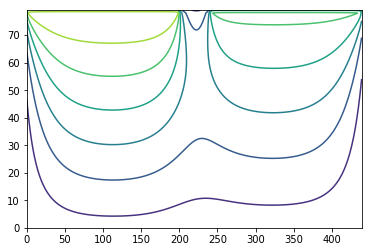

In [18]:
plt.contour(np.flipud(h))